#TCC II - Trabalho de conclusão de curso II

---
##Modelo preditor de morte súbita cardíaca em pacientes com insuficiência cardíaca crônica baseado em aprendizado de máquina
* 265707 - Aline da Silva Souza Alves


## Descrição da área do problema
A insuficiência cardíaca (IC) é uma síndrome clínica de natureza complexa, caracterizada pela incapacidade do coração de bombear sangue de maneira eficaz para suprir as necessidades metabólicas dos tecidos, por outro lado, o termo “insuficiência cardíaca crônica” (ICC) indica o caráter progressivo e persistente da doença (Rohde et al., 2018).

No Brasil, de acordo com os dados do Ministério da Saúde, entre os anos de 2015 e 2025, a insuficiência cardíaca foi responsável por mais de 2 milhões de internações hospitalares e cerca de 233 mil óbitos. Além dos altos índices de internações e mortalidade associadas à IC, a morte súbita cardíaca (MSC) representa um desafio significativo para a saúde.

A identificação precoce do risco de MSC em pacientes com IC é de extrema importância para a adoção de medidas preventivas eficazes e para a redução no número de óbitos. Atualmente, os métodos existentes enfrentam limitações significativas na predição da MSC, uma vez que muitos episódios deste evento ocorrem em pacientes assintomáticos ou considerados de baixo risco, reforçando a complexidade e imprevisibilidade de MSC (Goldemberg; Moss, 2017).


##Base de dados
A base de dados escolhida foi a MUSIC (Sudden Cardiac Death in Chronic Heart Failure), disponível no PhysioNet. Essa base possui registros clínicos e eletrocardiogramas (ECGs) de 992 pacientes com ICC, acompanhados por um período de 44 meses.

Para este trabalho, serão utilizados exclusivamente os dados clínicos coletados, que estão armazenados no arquivo `subject-info.csv`, com o suporte dos arquivos `subject-info_codes.csv`, que contém a codificação das variáveis categóricas, e `subject-info_definitions.csv`, que apresenta a definição dos nomes das colunas.




In [ ]:
import pandas as pd
base_df = pd.read_csv("subject-info-vf.csv", index_col = 0)

In [ ]:
base_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, P0001 to P1083
Data columns (total 102 columns):
 #    Column                                                     Dtype  
---   ------                                                     -----  
 0    Período de acompanhamento desde a inclusão (dias)          int64  
 1    Dias (equivalente a 4 anos)                                int64  
 2    Saída do estudo                                            float64
 3    Causa da morte                                             int64  
 4    Idade                                                      object 
 5    Gênero (masculino=1)                                       int64  
 6    Peso (kg)                                                  int64  
 7    Altura (cm)                                                int64  
 8    Índice de Massa Corporal (Kg/m²)                           object 
 9    Classe NYHA                                                int64  
 10   Pressão art

In [ ]:
base_df.head()

Período de acompanhamento desde a inclusão (dias)  \
ID do paciente                                                      
P0001                                                        2065   
P0002                                                        2045   
P0003                                                        2044   
P0004                                                        2044   
P0005                                                        2043   

                Dias (equivalente a 4 anos)  Saída do estudo  Causa da morte  \
ID do paciente                                                                 
P0001                                  1460              NaN               0   
P0002                                  1460              NaN               0   
P0003                                  1460              NaN               0   
P0004                                  1460              NaN               0   
P0005                                  1460              NaN               0   

               Idade  Gênero (masculino=1)  Peso (kg)  Altura (cm)  \
ID do paciente                                                       
P0001             58                     1         83          163   
P0002             58                     1         74          160   
P0003             69                     1         83          174   
P0004             56                     0         84          165   
P0005             70                     1         97          183   

               Índice de Massa Corporal (Kg/m²)  Classe NYHA  ...  \
ID do paciente                                                ...   
P0001                                      31,2            3  ...   
P0002                                      28,9            2  ...   
P0003                                      27,4            2  ...   
P0004                                      30,9            2  ...   
P0005                                        29            2  ...   

                Bloqueador do receptor da angiotensina II (sim=1)  \
ID do paciente                                                      
P0001                                                           0   
P0002                                                           1   
P0003                                                           1   
P0004                                                           1   
P0005                                                           0   

                Anticoagulantes/antitrombóticos (sim=1)  \
ID do paciente                                            
P0001                                                 1   
P0002                                                 1   
P0003                                                 1   
P0004                                                 1   
P0005                                                 1   

                Betabloqueadores (sim=1)  Digoxina (sim=1)  \
ID do paciente                                               
P0001                                  1                 1   
P0002                                  1                 0   
P0003                                  1                 1   
P0004                                  1                 0   
P0005                                  1                 0   

                Diuréticos de alça (sim=1)  Espironolactona (sim=1)  \
ID do paciente                                                        
P0001                                    1                        0   
P0002                                    0                        0   
P0003                                    1                        0   
P0004                                    1                        1   
P0005                                    1                        0   

                Estatinas (sim=1)  Hidralazina (sim=1)  \
ID do paciente                                           
P0001                           0                

####Saída do Estudo
O atributo Saída do estudo foi utilizado exclusivamente para identificar e remover os pacientes que deixaram o acompanhamento devido a transplante cardíaco ou por motivos não relacionados à mortalidade. Dessa forma, foram mantidos apenas os pacientes que faleceram ou que permaneceram vivos até o término do período de coleta dos dados.



In [ ]:
base_df = base_df[~base_df['Saída do estudo'].isin([1, 2])]
base_df = base_df.drop(columns=['Saída do estudo'])
base_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, P0001 to P1083
Data columns (total 101 columns):
 #    Column                                                     Non-Null Count  Dtype  
---   ------                                                     --------------  -----  
 0    Período de acompanhamento desde a inclusão (dias)          961 non-null    int64  
 1    Dias (equivalente a 4 anos)                                961 non-null    int64  
 2    Causa da morte                                             961 non-null    int64  
 3    Idade                                                      961 non-null    object 
 4    Gênero (masculino=1)                                       961 non-null    int64  
 5    Peso (kg)                                                  961 non-null    int64  
 6    Altura (cm)                                                961 non-null    int64  
 7    Índice de Massa Corporal (Kg/m²)                           961 non-null    object 
 8 

###Situação da base
O arquivo `subject-info.csv` contém mais de 100 variáveis, incluindo dados clínicos, laboratoriais e demográficos. Entretanto, devido ao forte desbalanceamento da base e ao número reduzido de instâncias, foram previamente excluídas as *features* que apresentavam menos de 900 valores não nulos. Além disso, também foram excluídas as variáveis que não se referem diretamente ao paciente, mas sim ao próprio estudo, como, por exemplo, o número de dias em que cada indivíduo foi acompanhado.

In [ ]:
keep_cols = [
  'RR máximo (ms)',
  'Taquicardia ventricular',
  'Taquiarritmia supraventricular paroxística',
  'Extrassístole ventricular',
  'Diâmetro diastólico final do ventrículo esquerdo (mm)',
  'Diâmetro sistólico final do ventrículo esquerdo (mm)'
]

non_null_counts = base_df.count()
col = non_null_counts[non_null_counts < 900].index.tolist()
col = [c for c in col if c not in keep_cols]
print(col)

df = base_df.drop(columns=col);
df.info(verbose=True, show_counts=True)

['Troponina normalizada', 'Pro-BNP (ng/L)', 'T3 (pg/dL)', 'T4 (ng/L)', 'Troponina (ng/mL)', 'Diâmetro diastólico final do ventrículo direito (mm)', 'Início do Holter (hh:mm:ss)', 'Duplas de extrassístoles', 'Maior pausa RR (ms)', 'Bradicardia', 'SDNN (ms)', 'SDANN (ms)', 'RMSSD (ms)', 'pNN50 (%)']
<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, P0001 to P1083
Data columns (total 87 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Período de acompanhamento desde a inclusão (dias)          961 non-null    int64  
 1   Dias (equivalente a 4 anos)                                961 non-null    int64  
 2   Causa da morte                                             961 non-null    int64  
 3   Idade                                                      961 non-null    object 
 4   Gênero (masculino=1)                                       961

In [ ]:
col = [
 "Período de acompanhamento desde a inclusão (dias)",
 "Dias (equivalente a 4 anos)",
 "ECG de alta resolução disponível",
 "Holter disponível",
];

df = df.drop(columns=col).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, P0001 to P1083
Data columns (total 83 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             961 non-null    int64  
 1   Idade                                                      961 non-null    object 
 2   Gênero (masculino=1)                                       961 non-null    int64  
 3   Peso (kg)                                                  961 non-null    int64  
 4   Altura (cm)                                                961 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           961 non-null    object 
 6   Classe NYHA                                                961 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         961 non-null    int64  
 8   Pressão a

###Pré-processamento

####Causa da morte
Para os fins desse trabalho, apenas as mortes cardíacas serão consideradas.

In [ ]:
df = df[df['Causa da morte'] != 1]
base_df = base_df[base_df['Causa da morte'] != 1]

df.loc[df['Causa da morte'] == 3, 'Causa da morte'] = 1
df.loc[df['Causa da morte'].isin([6, 7]), 'Causa da morte'] = 2

df['Causa da morte'].value_counts()

Causa da morte
0    695
2    111
1     94
Name: count, dtype: int64

####Idade
O atributo Idade está descrito como "object" ao invés de ser um valor numérico

In [ ]:
df.Idade.info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Idade
Non-Null Count  Dtype 
--------------  ----- 
900 non-null    object
dtypes: object(1)
memory usage: 46.4+ KB


In [ ]:
# df["Idade"] = df['Idade'].astype("int64")
# df.describe()

In [ ]:
base_df['Idade'] = base_df['Idade'].replace('>89', '89')
base_df['Idade'] = base_df['Idade'].astype("int64")
base_df['Idade'].describe()

count    900.000000
mean      64.542222
std       11.315743
min       28.000000
25%       57.000000
50%       67.000000
75%       73.000000
max       89.000000
Name: Idade, dtype: float64

In [ ]:
df['Idade'] = df['Idade'].replace('>89', '89')
df['Idade'] = df['Idade'].astype("int64")
df['Idade'].describe()

count    900.000000
mean      64.542222
std       11.315743
min       28.000000
25%       57.000000
50%       67.000000
75%       73.000000
max       89.000000
Name: Idade, dtype: float64

In [ ]:
df['Idade'].isna().sum()

np.int64(0)

####Valores Binários
Será realizada uma verificação básica para assegurar que os valores estão no intervalo [0,1] e para identificar a presença de valores nulos.

In [ ]:
b_values = [
  "Gênero (masculino=1)",
  "Diabetes (sim=1)",
  "Histórico de dislipidemia (sim=1)",
  "Doença vascular periférica (sim=1)",
  "Histórico de hipertensão (sim=1)",
  "Infarto do miocárdio prévio (sim=1)",
  "Sinais de hipertensão venosa pulmonar (sim=1)",
  "Contractilidade do ventrículo direito (alterada=1)",
  "Ondas Q (necrose - sim=1)",
  "Hipertrofia ventricular esquerda (sim=1)",
  "Bloqueador dos canais de cálcio (sim=1)",
  "Medicamento para diabetes (sim=1)",
  "Amiodarona (sim=1)",
  "Bloqueador do receptor da angiotensina II (sim=1)",
  "Anticoagulantes/antitrombóticos (sim=1)",
  "Betabloqueadores (sim=1)",
  "Digoxina (sim=1)",
  "Diuréticos de alça (sim=1)",
  "Espironolactona (sim=1)",
  "Estatinas (sim=1)",
  "Hidralazina (sim=1)",
  "Inibidor da ECA (sim=1)",
  "Nitrovasodilatador (sim=1)",
  "QRS > 120 ms – QRS > 120 ms",
  "Taquicardia ventricular não sustentada (CH>10)",
]
df[b_values].info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, P0001 to P1083
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Gênero (masculino=1)                                900 non-null    int64  
 1   Diabetes (sim=1)                                    900 non-null    int64  
 2   Histórico de dislipidemia (sim=1)                   900 non-null    int64  
 3   Doença vascular periférica (sim=1)                  900 non-null    int64  
 4   Histórico de hipertensão (sim=1)                    900 non-null    int64  
 5   Infarto do miocárdio prévio (sim=1)                 900 non-null    int64  
 6   Sinais de hipertensão venosa pulmonar (sim=1)       900 non-null    int64  
 7   Contractilidade do ventrículo direito (alterada=1)  891 non-null    float64
 8   Ondas Q (necrose - sim=1)                           900 non-null    int64  
 9 

In [ ]:
b_df = df[b_values].apply(lambda col: col.value_counts())
b_df = b_df.T
b_df['Total'] = b_df[0] + b_df[1]
b_df

0.0  1.0  Total
Gênero (masculino=1)                                253  647    900
Diabetes (sim=1)                                    574  326    900
Histórico de dislipidemia (sim=1)                   440  460    900
Doença vascular periférica (sim=1)                  755  145    900
Histórico de hipertensão (sim=1)                    382  518    900
Infarto do miocárdio prévio (sim=1)                 519  381    900
Sinais de hipertensão venosa pulmonar (sim=1)       755  145    900
Contractilidade do ventrículo direito (alterada=1)  688  203    891
Ondas Q (necrose - sim=1)                           619  281    900
Hipertrofia ventricular esquerda (sim=1)            674  226    900
Bloqueador dos canais de cálcio (sim=1)             773  127    900
Medicamento para diabetes (sim=1)                   638  262    900
Amiodarona (sim=1)                                  808   92    900
Bloqueador do receptor da angiotensina II (sim=1)   750  150    900
Anticoagulantes/antitrombóticos (sim=1)             147  753    900
Betabloqueadores (sim=1)                            277  623    900
Digoxina (sim=1)                                    641  259    900
Diuréticos de alça (sim=1)                          252  648    900
Espironolactona (sim=1)                             567  333    900
Estatinas (sim=1)                                   445  455    900
Hidralazina (sim=1)                                 876   24    900
Inibidor da ECA (sim=1)                             233  667    900
Nitrovasodilatador (sim=1)                          647  253    900
QRS > 120 ms – QRS > 120 ms                         490  410    900
Taquicardia ventricular não sustentada (CH>10)      652  247    899

Os atributos *Contractilidade do ventrículo direito* e *Taquicardia ventricular não sustentada (CH>10)* foram os únicos identificados com valores ausentes na base de dados. Para tratar essas lacunas, será aplicado o método KNN (k-nearest neighbors) a fim de imputar os valores nulos de forma consistente com os demais registros.

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

numeric_complete_cols = df.select_dtypes(exclude='object').columns[df.select_dtypes(exclude='object').notnull().all()]
df_knn = pd.concat([df[numeric_complete_cols], df['Contractilidade do ventrículo direito (alterada=1)']], axis=1)

imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = imputer.fit_transform(df_knn)

df['Contractilidade do ventrículo direito (alterada=1)'] = np.round(df_knn_imputed[:, -1]).astype(int)

In [ ]:
df_knn = pd.concat([df[numeric_complete_cols], df['Taquicardia ventricular não sustentada (CH>10)']], axis=1)

imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = imputer.fit_transform(df_knn)

df['Taquicardia ventricular não sustentada (CH>10)'] = np.round(df_knn_imputed[:, -1]).astype(int)


In [ ]:
b_df = df[b_values].apply(lambda col: col.value_counts())
b_df = b_df.T
b_df['Total'] = b_df[0] + b_df[1]
b_df

0    1  Total
Gênero (masculino=1)                                253  647    900
Diabetes (sim=1)                                    574  326    900
Histórico de dislipidemia (sim=1)                   440  460    900
Doença vascular periférica (sim=1)                  755  145    900
Histórico de hipertensão (sim=1)                    382  518    900
Infarto do miocárdio prévio (sim=1)                 519  381    900
Sinais de hipertensão venosa pulmonar (sim=1)       755  145    900
Contractilidade do ventrículo direito (alterada=1)  695  205    900
Ondas Q (necrose - sim=1)                           619  281    900
Hipertrofia ventricular esquerda (sim=1)            674  226    900
Bloqueador dos canais de cálcio (sim=1)             773  127    900
Medicamento para diabetes (sim=1)                   638  262    900
Amiodarona (sim=1)                                  808   92    900
Bloqueador do receptor da angiotensina II (sim=1)   750  150    900
Anticoagulantes/antitrombóticos (sim=1)             147  753    900
Betabloqueadores (sim=1)                            277  623    900
Digoxina (sim=1)                                    641  259    900
Diuréticos de alça (sim=1)                          252  648    900
Espironolactona (sim=1)                             567  333    900
Estatinas (sim=1)                                   445  455    900
Hidralazina (sim=1)                                 876   24    900
Inibidor da ECA (sim=1)                             233  667    900
Nitrovasodilatador (sim=1)                          647  253    900
QRS > 120 ms – QRS > 120 ms                         490  410    900
Taquicardia ventricular não sustentada (CH>10)      653  247    900

####Peso

In [ ]:
df['Peso (kg)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Peso (kg)
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 46.4+ KB


In [ ]:
df['Peso (kg)'].describe()

count    900.000000
mean      77.608889
std       13.900742
min       43.000000
25%       68.000000
50%       77.000000
75%       86.000000
max      130.000000
Name: Peso (kg), dtype: float64

####Altura

In [ ]:
df['Altura (cm)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Altura (cm)
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 46.4+ KB


In [ ]:
df['Altura (cm)'].describe()

count    900.000000
mean     164.635556
std        8.905415
min      136.000000
25%      159.000000
50%      165.000000
75%      170.250000
max      190.000000
Name: Altura (cm), dtype: float64

####Índice de Massa Corporal

In [ ]:
df['Índice de Massa Corporal (Kg/m²)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Índice de Massa Corporal (Kg/m²)
Non-Null Count  Dtype 
--------------  ----- 
900 non-null    object
dtypes: object(1)
memory usage: 46.4+ KB


In [ ]:
# df['Índice de Massa Corporal (Kg/m²)'] = df['Índice de Massa Corporal (Kg/m²)'].astype('float64')
# df.describe()

In [ ]:
base_df.replace({'Índice de Massa Corporal (Kg/m²)': {',': '.'}}, regex=True, inplace=True)
base_df['Índice de Massa Corporal (Kg/m²)'] = base_df['Índice de Massa Corporal (Kg/m²)'].astype("float64")
base_df['Índice de Massa Corporal (Kg/m²)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Índice de Massa Corporal (Kg/m²)
Non-Null Count  Dtype  
--------------  -----  
900 non-null    float64
dtypes: float64(1)
memory usage: 14.1+ KB


In [ ]:
df.replace({'Índice de Massa Corporal (Kg/m²)': {',': '.'}}, regex=True, inplace=True)
df['Índice de Massa Corporal (Kg/m²)'] = df['Índice de Massa Corporal (Kg/m²)'].astype("float64")
df['Índice de Massa Corporal (Kg/m²)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Índice de Massa Corporal (Kg/m²)
Non-Null Count  Dtype  
--------------  -----  
900 non-null    float64
dtypes: float64(1)
memory usage: 46.4+ KB


In [ ]:
df['Índice de Massa Corporal (Kg/m²)'].describe()

count    900.000000
mean      28.612889
std        4.411534
min       17.400000
25%       25.400000
50%       28.400000
75%       31.200000
max       45.000000
Name: Índice de Massa Corporal (Kg/m²), dtype: float64

####Classe NYHA
A classe NYHA (New York Heart Association), embora seja um atributo categórico, apresenta uma ordem natural entre seus valores. Nesse contexto, o valor 2 é interpretado como superior ao valor 1, refletindo uma progressão clínica. Portanto, os valores serão mantidos na forma original, a fim de preservar tanto a ordenação quanto a relação clínica existente entre as diferentes classes.

In [ ]:
df['Classe NYHA'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Classe NYHA
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 46.4+ KB


In [ ]:
df['Classe NYHA'].value_counts()

Classe NYHA
2    715
3    185
Name: count, dtype: int64

####Pressão arterial diastólica

In [ ]:
df['Pressão arterial diastólica (mmHg)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Pressão arterial diastólica (mmHg)
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 46.4+ KB


Ainda que preocupante, valores entre 40mmHg e 110mmHg são possíveis de acontecer em alguns casos.

In [ ]:
df['Pressão arterial diastólica (mmHg)'].describe()

count    900.000000
mean      74.307778
std       11.809564
min       40.000000
25%       70.000000
50%       75.000000
75%       80.000000
max      110.000000
Name: Pressão arterial diastólica (mmHg), dtype: float64

In [ ]:
df[df['Pressão arterial diastólica (mmHg)'] > 100]['Pressão arterial diastólica (mmHg)'].value_counts()

Pressão arterial diastólica (mmHg)
110    9
105    1
102    1
101    1
Name: count, dtype: int64

In [ ]:
#verificando se eram index seguidos
df[df['Pressão arterial diastólica (mmHg)'] > 100].index

Index(['P0165', 'P0170', 'P0366', 'P0384', 'P0652', 'P0663', 'P0697', 'P0712',
       'P0858', 'P0860', 'P0962', 'P1033'],
      dtype='object', name='ID do paciente')

In [ ]:
df[df['Pressão arterial diastólica (mmHg)'] < 50]['Pressão arterial diastólica (mmHg)'].value_counts()

Pressão arterial diastólica (mmHg)
40    4
45    1
49    1
Name: count, dtype: int64

In [ ]:
#verificando se eram index seguidos
df[df['Pressão arterial diastólica (mmHg)'] < 50].index

Index(['P0449', 'P0450', 'P0580', 'P0804', 'P0840', 'P0970'], dtype='object', name='ID do paciente')

####Pressão arterial sistólica

In [ ]:
df['Pressão arterial sistólica (mmHg)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Pressão arterial sistólica (mmHg)
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 46.4+ KB


Valores acima de 180mmHg são de extrema gravidade, até mesmo para pacientes com ICC, neste caso, passarei esses valores para 180mmHg.

In [ ]:
df['Pressão arterial sistólica (mmHg)'].describe()

count    900.000000
mean     127.081111
std       21.434824
min       80.000000
25%      110.000000
50%      125.000000
75%      140.000000
max      213.000000
Name: Pressão arterial sistólica (mmHg), dtype: float64

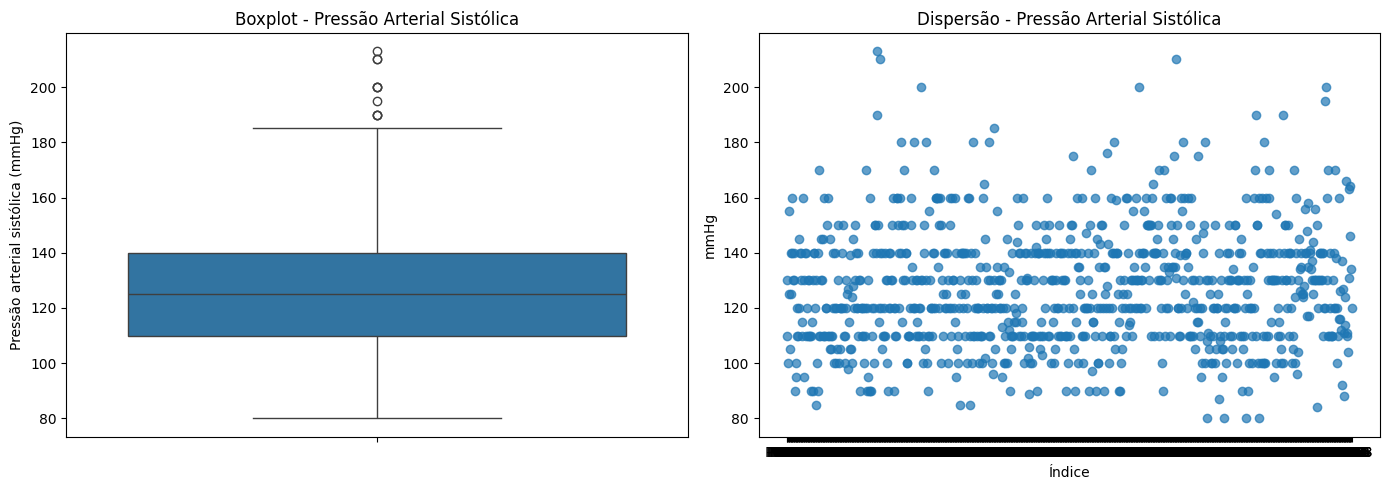

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Pressão arterial sistólica (mmHg)'], ax=axes[0])
axes[0].set_title('Boxplot - Pressão Arterial Sistólica')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Pressão arterial sistólica (mmHg)'], alpha=0.7)
axes[1].set_title('Dispersão - Pressão Arterial Sistólica')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('mmHg')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
sist = df[df['Pressão arterial sistólica (mmHg)']>180]
sist['Pressão arterial sistólica (mmHg)'].value_counts()

Pressão arterial sistólica (mmHg)
190    3
200    3
210    2
213    1
185    1
195    1
Name: count, dtype: int64

In [ ]:
df.loc[df['Pressão arterial sistólica (mmHg)'] > 180, 'Pressão arterial sistólica (mmHg)'] = 180
df['Pressão arterial sistólica (mmHg)'].describe()

count    900.000000
mean     126.855556
std       20.744680
min       80.000000
25%      110.000000
50%      125.000000
75%      140.000000
max      180.000000
Name: Pressão arterial sistólica (mmHg), dtype: float64

####Amplitude do RR

In [ ]:
df['Amplitude do RR (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 900 entries, P0001 to P1083
Series name: Amplitude do RR (ms)
Non-Null Count  Dtype  
--------------  -----  
899 non-null    float64
dtypes: float64(1)
memory usage: 46.4+ KB


A Amplitude do intevalo RR é dado por
$$AmplitudeRR = RR_{máximo} - RR_{mínimo}$$
É possível observar a existencia de valores negativos, isso pode ocorrer por alguns motivos:

*   RR máximo nulo
*   RR mínimo > RR máximo
*   Erro de digitação


Pós análise, os valores serão convertidos em valores positivos.

In [ ]:
df['Amplitude do RR (ms)'].describe()

count     899.000000
mean      724.334816
std       399.000745
min      -645.000000
25%       509.500000
50%       697.000000
75%       905.500000
max      2742.000000
Name: Amplitude do RR (ms), dtype: float64

In [ ]:
mask = df['RR máximo (ms)'] < df['RR mínimo (ms)']
df[mask].head()

Empty DataFrame
Columns: [Causa da morte, Idade, Gênero (masculino=1), Peso (kg), Altura (cm), Índice de Massa Corporal (Kg/m²), Classe NYHA, Pressão arterial diastólica (mmHg), Pressão arterial sistólica (mmHg), Etiologia da IC - Diagnóstico, Diabetes (sim=1), Histórico de dislipidemia (sim=1), Doença vascular periférica (sim=1), Histórico de hipertensão (sim=1), Infarto do miocárdio prévio (sim=1), Dispositivo implantável prévio, Revascularização prévia, Síncope, Tabagismo diário (cigarros/dia), Tempo sem fumar (anos), Cigarros/ano, Consumo de álcool (unidades padrão), Albumina (g/L), ALT ou TGP (UI/L), AST ou TGO (UI/L), Colesterol total (mmol/L), Creatinina (µmol/L), Gama-glutamil transpeptidase (UI/L), Glicose (mmol/L), Hemoglobina (g/L), HDL (mmol/L), Potássio (mEq/L), LDL (mmol/L), Sódio (mEq/L), Proteína (g/L), TSH (mIU/L), Ureia (mg/dL), Sinais de hipertensão venosa pulmonar (sim=1), Índice cardiotorácico, Tamanho do átrio esquerdo (mm), Contractilidade do ventrículo direito (alterada=1), FEVE (%), Insuficiência da valva mitral, Padrão de fluxo mitral, Espessura da parede posterior do ventrículo esquerdo (mm), Espessura do septo (mm), Diâmetro diastólico final do ventrículo esquerdo (mm), Diâmetro sistólico final do ventrículo esquerdo (mm), Ritmo do ECG, Ondas Q (necrose - sim=1), Intervalo PR (ms), Duração do QRS (ms), QRS > 120 ms – QRS > 120 ms, Intervalo QT (ms), QT corrigido, RR médio (ms), Hipertrofia ventricular esquerda (sim=1), Distúrbio de condução intraventricular, Ritmo do Holter, RR mínimo (ms), RR médio (ms).1, RR máximo (ms), Amplitude do RR (ms), Número de batimentos ventriculares prematuros em 24h, Extrassístole ventricular, Taquicardia ventricular, Número de contrações ventriculares prematuras por hora, Taquicardia ventricular não sustentada (CH>10), Número de batimentos supraventriculares prematuros em 24h, Taquiarritmia supraventricular paroxística, Bloqueador dos canais de cálcio (sim=1), Medicamento para diabetes (sim=1), Amiodarona (sim=1), Bloqueador do receptor da angiotensina II (sim=1), Anticoagulantes/antitrombóticos (sim=1), Betabloqueadores (sim=1), Digoxina (sim=1), Diuréticos de alça (sim=1), Espironolactona (sim=1), Estatinas (sim=1), Hidralazina (sim=1), Inibidor da ECA (sim=1), Nitrovasodilatador (sim=1)]
Index: []

[0 rows x 83 columns]

In [ ]:
df[df['Amplitude do RR (ms)'] < 0]['Amplitude do RR (ms)'].value_counts()

Amplitude do RR (ms)
-556.0    1
-645.0    1
-545.0    1
-632.0    1
Name: count, dtype: int64

In [ ]:
df.loc[df['Amplitude do RR (ms)'] < 0, 'Amplitude do RR (ms)'] = df['Amplitude do RR (ms)'].abs()
df['Amplitude do RR (ms)'].describe()

count     899.000000
mean      729.625139
std       389.231438
min         0.000000
25%       515.500000
50%       697.000000
75%       905.500000
max      2742.000000
Name: Amplitude do RR (ms), dtype: float64

Os valores iguais a 0 ms, na maioria dos casos, indicam que os campos **RR máximo** e **RR mínimo** estão nulos. Além disso, essas instâncias também apresentam, em sua maioria, valores nulos nos atributos **Duplas de extrassístoles, Taquicardia ventricular e Taquiarritmia supraventricular paroxística**.
Neste caso, a melhor opção foi remover essas instâncias para evitar o uso de dados artificiais que poderiam comprometer a análise.

In [ ]:
arr = df[df['Amplitude do RR (ms)'] == 0]
arr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, P0225 to P1033
Data columns (total 83 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             62 non-null     int64  
 1   Idade                                                      62 non-null     int64  
 2   Gênero (masculino=1)                                       62 non-null     int64  
 3   Peso (kg)                                                  62 non-null     int64  
 4   Altura (cm)                                                62 non-null     int64  
 5   Índice de Massa Corporal (Kg/m²)                           62 non-null     float64
 6   Classe NYHA                                                62 non-null     int64  
 7   Pressão arterial diastólica (mmHg)                         62 non-null     int64  
 8   Pressão ar

In [ ]:
print('NaN Amplitude do RR: ', (df['Amplitude do RR (ms)'] == 0).sum())
print('NaN RR máximo: ', arr['RR máximo (ms)'].isna().sum())
print('NaN RR mínimo: ', arr['RR mínimo (ms)'].isna().sum())
print('NaN Extrassístole ventricular: ', arr['Extrassístole ventricular'].isna().sum())
print('NaN Taquicardia ventricular: ', arr['Taquicardia ventricular'].isna().sum())
print('NaN Taquiarritmia supraventricular paroxística: ', arr['Taquiarritmia supraventricular paroxística'].isna().sum())

NaN Amplitude do RR:  62
NaN RR máximo:  54
NaN RR mínimo:  54
NaN Extrassístole ventricular:  54
NaN Taquicardia ventricular:  54
NaN Taquiarritmia supraventricular paroxística:  54


In [ ]:
arr['Causa da morte'].value_counts()

Causa da morte
0    51
1     6
2     5
Name: count, dtype: int64

In [ ]:
df = df[df['Amplitude do RR (ms)'] != 0]
base_df = base_df[base_df['Amplitude do RR (ms)'] != 0]
df['Amplitude do RR (ms)'].describe()

count     837.000000
mean      783.671446
std       346.888498
min       134.000000
25%       545.000000
50%       720.000000
75%       923.000000
max      2742.000000
Name: Amplitude do RR (ms), dtype: float64

Para os valores nulos, será utilizado a fórmula para preencher os campos. Caso não exista a possibilidade, as instancias serão retiradas.

In [ ]:
df[df['Amplitude do RR (ms)'].isnull()]['RR máximo (ms)']

ID do paciente
P1083   NaN
Name: RR máximo (ms), dtype: float64

In [ ]:
df[df['Amplitude do RR (ms)'].isnull()]['RR mínimo (ms)']

ID do paciente
P1083   NaN
Name: RR mínimo (ms), dtype: float64

In [ ]:
df = df[~df['Amplitude do RR (ms)'].isnull()]
df['Amplitude do RR (ms)'].isnull().sum()

np.int64(0)

####RR médio

In [ ]:
df['RR médio (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: RR médio (ms)
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 13.1+ KB


In [ ]:
df['RR médio (ms)'].describe()

count     837.000000
mean      882.268817
std       179.124147
min       462.000000
25%       759.000000
50%       870.000000
75%      1000.000000
max      1500.000000
Name: RR médio (ms), dtype: float64

####RR mínimo

In [ ]:
df['RR mínimo (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: RR mínimo (ms)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


A Amplitude do intevalo RR é dado por
$$AmplitudeRR = RR_{máximo} - RR_{mínimo}$$
Esta forma será utilizada para determinar **RR mínimo**, em caso de **RR máximo** ser nulo, o **RR médio** será utilizado.

In [ ]:
df['RR mínimo (ms)'].describe()

count     836.000000
mean      515.383971
std       107.812655
min       250.000000
25%       448.000000
50%       515.000000
75%       584.250000
max      1000.000000
Name: RR mínimo (ms), dtype: float64

In [ ]:
null_rr_min = df[df['RR mínimo (ms)'].isna()]
null_rr_min[['RR máximo (ms)', 'Amplitude do RR (ms)', 'RR médio (ms)']]

RR máximo (ms)  Amplitude do RR (ms)  RR médio (ms)
ID do paciente                                                     
P0212                   1429.0                1429.0           1034

In [ ]:
# Identificando onde RR máximo e Amplitude são iguais
mask = (df['RR mínimo (ms)'].isna()) & (df['RR máximo (ms)'] == df['Amplitude do RR (ms)'])
df.loc[mask, 'RR mínimo (ms)'] = df.loc[mask, 'RR médio (ms)']
df.loc[mask, 'Amplitude do RR (ms)'] = df.loc[mask, 'RR máximo (ms)'] - df.loc[mask, 'RR mínimo (ms)']

# # RR máximo não nulo -> RR mínimo = RR máximo - Amplitude
# mask = df['RR mínimo (ms)'].isna() & df['RR máximo (ms)'].notna()
# df.loc[mask, 'RR mínimo (ms)'] = df.loc[mask, 'RR máximo (ms)'] - df.loc[mask, 'Amplitude do RR (ms)']

# # RR máximo nulo -> RR máximo = média, depois RR mínimo = RR máximo - Amplitude
# mask = df['RR mínimo (ms)'].isna() & df['RR máximo (ms)'].isna()
# df.loc[mask, 'RR máximo (ms)'] = df.loc[mask, 'RR médio (ms)']
# df.loc[mask, 'RR mínimo (ms)'] = df.loc[mask, 'RR máximo (ms)'] - df.loc[mask, 'Amplitude do RR (ms)']

df['RR mínimo (ms)'].isna().sum()

np.int64(0)

####RR máximo

In [ ]:
df['RR máximo (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: RR máximo (ms)
Non-Null Count  Dtype  
--------------  -----  
833 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


A Amplitude do intevalo RR é dado por
$$AmplitudeRR = RR_{máximo} - RR_{mínimo}$$
Esta forma será utilizada para determinar **RR máximo**.

In [ ]:
df['RR máximo (ms)'].describe()

count     833.000000
mean     1298.965186
std       316.054842
min       667.000000
25%      1091.000000
50%      1250.000000
75%      1463.000000
max      3000.000000
Name: RR máximo (ms), dtype: float64

In [ ]:
mask = df['RR máximo (ms)'].isna()
df.loc[mask, 'RR máximo (ms)'] = df.loc[mask, 'RR mínimo (ms)'] + df.loc[mask, 'Amplitude do RR (ms)']
df['RR máximo (ms)'].isna().sum()

np.int64(0)

Valores acima de 2000ms representam uma pausa sinusal/bloqueio.

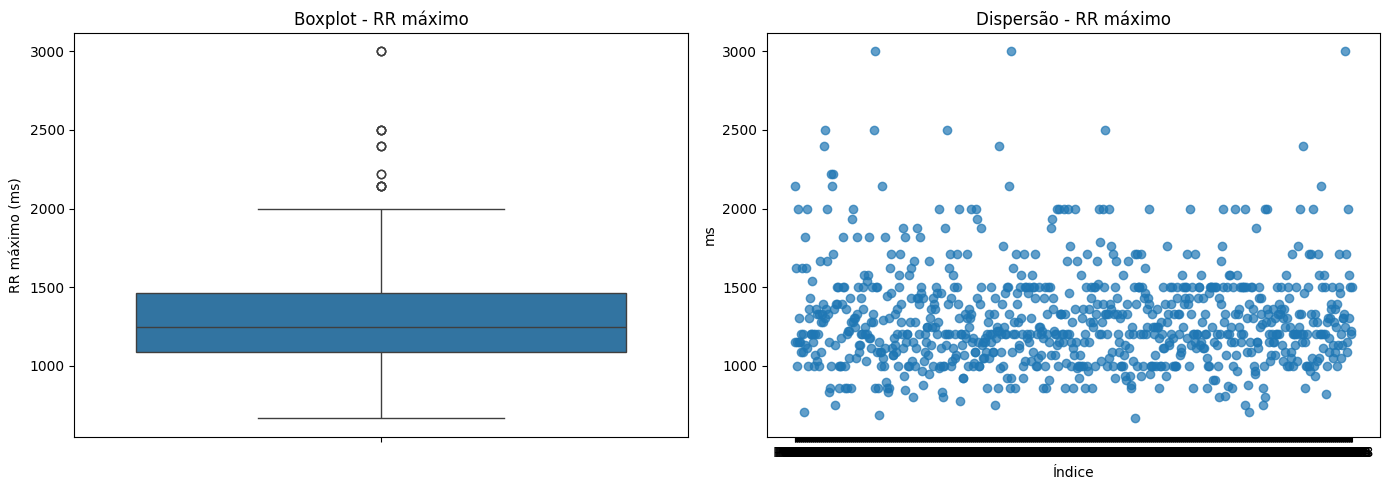

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['RR máximo (ms)'], ax=axes[0])
axes[0].set_title('Boxplot - RR máximo')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['RR máximo (ms)'], alpha=0.7)
axes[1].set_title('Dispersão - RR máximo')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('ms')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df[df['RR máximo (ms)'] >= 2500][['RR máximo (ms)', 'Causa da morte', 'Infarto do miocárdio prévio (sim=1)', 'Insuficiência da valva mitral',]]

RR máximo (ms)  Causa da morte  \
ID do paciente                                   
P0049                   2500.0               1   
P0134                   2500.0               2   
P0137                   3000.0               0   
P0271                   2500.0               1   
P0387                   3000.0               0   
P0571                   2500.0               0   
P1027                   3000.0               0   

                Infarto do miocárdio prévio (sim=1)  \
ID do paciente                                        
P0049                                             1   
P0134                                             0   
P0137                                             0   
P0271                                             1   
P0387                                             0   
P0571                                             0   
P1027                                             0   

                Insuficiência da valva mitral  
ID do paciente                                 
P0049                                       3  
P0134                                       0  
P0137                                       0  
P0271                                       3  
P0387                                       3  
P0571                                       1  
P1027                                       3

####FEVE (Fração de ejeção do ventriculo esquerdo)

In [ ]:
df['FEVE (%)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: FEVE (%)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['FEVE (%)'].describe()

count    837.000000
mean      37.138590
std       14.101644
min       10.000000
25%       26.000000
50%       35.000000
75%       45.000000
max       70.000000
Name: FEVE (%), dtype: float64

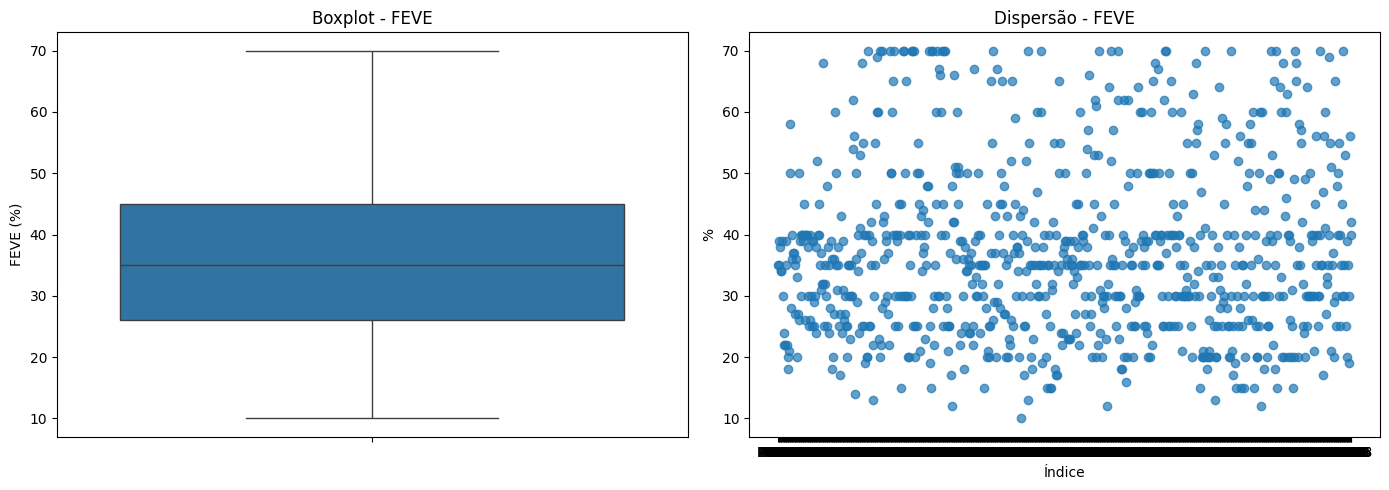

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['FEVE (%)'], ax=axes[0])
axes[0].set_title('Boxplot - FEVE')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['FEVE (%)'], alpha=0.7)
axes[1].set_title('Dispersão - FEVE')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('%')

# Layout ajustado
plt.tight_layout()
plt.show()

####Diâmetro diastólico final do ventrículo esquerdo

In [ ]:
df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Diâmetro diastólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
834 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


Um diâmetro diastólico final do ventrículo esquerdo maior que 80mm pode ser comum em pacientes com ICC com fração de ejeção reduzida (menor que 30%-35%).
A dilatação do ventrículo esquerdo pode apresentar uma insuficiência da valva mitral. Neste caso é possível identificar que 19 de 22 valores apresentam algum tipo de insuficiência da valva mitral. Destes 22 valores, 2 apresentam FEVE > 35% e possuem insuficiência da valva mitral. Sendo assim, usarei a média destes valores para corrigir os 2 campos.


In [ ]:
df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].describe()

count    834.000000
mean      60.907674
std       10.051123
min       31.000000
25%       55.000000
50%       61.000000
75%       67.000000
max       95.000000
Name: Diâmetro diastólico final do ventrículo esquerdo (mm), dtype: float64

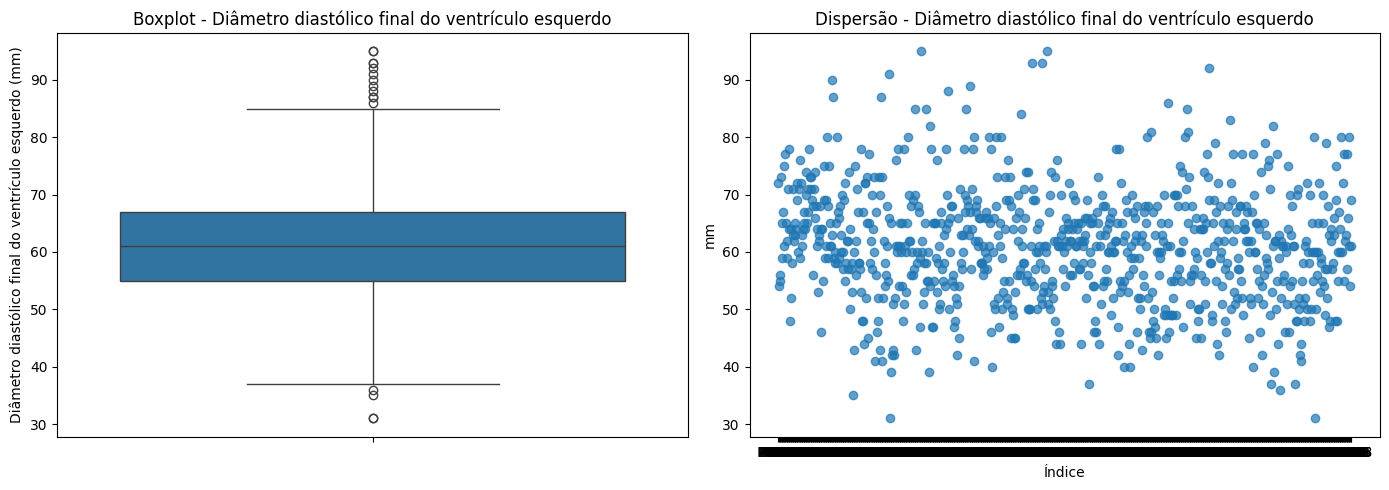

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Diâmetro diastólico final do ventrículo esquerdo (mm)'], ax=axes[0])
axes[0].set_title('Boxplot - Diâmetro diastólico final do ventrículo esquerdo')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Diâmetro diastólico final do ventrículo esquerdo (mm)'], alpha=0.7)
axes[1].set_title('Dispersão - Diâmetro diastólico final do ventrículo esquerdo')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('mm')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
#Valores maior que 80
df.loc[(df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] > 80), 'Diâmetro diastólico final do ventrículo esquerdo (mm)'].info()


<class 'pandas.core.series.Series'>
Index: 22 entries, P0089 to P0872
Series name: Diâmetro diastólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
22 non-null     float64
dtypes: float64(1)
memory usage: 352.0+ bytes


In [ ]:
# Valores maior que 80 com insuficiencia da valva mitral
mask = (df['Insuficiência da valva mitral'].isin([1,2,3,4])) & (df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] > 80)
df.loc[mask, 'Diâmetro diastólico final do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 19 entries, P0089 to P0872
Series name: Diâmetro diastólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 304.0+ bytes


In [ ]:
# Valores maior que 80 e FEVE maior que 35
mask = (df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] > 80)  & (df['FEVE (%)'] > 35)
df.loc[mask, 'Diâmetro diastólico final do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 2 entries, P0243 to P0725
Series name: Diâmetro diastólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes


In [ ]:
# Valores maior que 80 com insuficiencia da valva mitral e FEVE > 35
mask = (df['Insuficiência da valva mitral'].isin([1,2,3,4])) & (df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] > 80)  & (df['FEVE (%)'] > 35)
df.loc[mask, 'Diâmetro diastólico final do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 2 entries, P0243 to P0725
Series name: Diâmetro diastólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes


In [ ]:
mask = (df['Insuficiência da valva mitral'].isin([1,2,3,4])) & (df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] < 80)
mean = df.loc[mask]['Diâmetro diastólico final do ventrículo esquerdo (mm)'].mean()

mask = (df['Diâmetro diastólico final do ventrículo esquerdo (mm)'] > 80) & (df['FEVE (%)'] > 35)
df.loc[mask, 'Diâmetro diastólico final do ventrículo esquerdo (mm)'] = mean
df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].describe()


count    834.000000
mean      60.841954
std        9.956960
min       31.000000
25%       55.000000
50%       61.000000
75%       67.000000
max       95.000000
Name: Diâmetro diastólico final do ventrículo esquerdo (mm), dtype: float64

Para os valores nulos, como são poucos os casos, estarei preenchendo com a média.

In [ ]:
mean = df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].mean()
df.loc[(df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].isna()), 'Diâmetro diastólico final do ventrículo esquerdo (mm)'] = mean

df['Diâmetro diastólico final do ventrículo esquerdo (mm)'].isna().sum()

np.int64(0)

####Diâmetro sistólico final do ventrículo esquerdo
O ventrículo esquerdo é um fator relevante na estratificação de risco de mortalidade em pacientes com ICC. Entretanto, aproximadamente 100 registros apresentam valores nulos para esse atributo, representando mais de 10% da base de dados e podendo comprometer sua integridade. A exclusão desses registros resultaria em uma redução significativa da amostra; portanto, optou-se por remover a coluna.

In [ ]:
df['Diâmetro sistólico final do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Diâmetro sistólico final do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
741 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
base_df = base_df.drop(columns=['Diâmetro sistólico final do ventrículo esquerdo (mm)'])
df = df.drop(columns=['Diâmetro sistólico final do ventrículo esquerdo (mm)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Espessura da parede posterior do ventrículo esquerdo

In [ ]:
df['Espessura da parede posterior do ventrículo esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Espessura da parede posterior do ventrículo esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
826 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


Valores acima de 17mm é considerado uma hipertrofia grave, entretanto, valores superiores a este é extremamente raro. Nesse caso, passarei os valores para 17.5mm

In [ ]:
df['Espessura da parede posterior do ventrículo esquerdo (mm)'].describe()

count    826.000000
mean      10.680387
std        2.281845
min        6.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       20.000000
Name: Espessura da parede posterior do ventrículo esquerdo (mm), dtype: float64

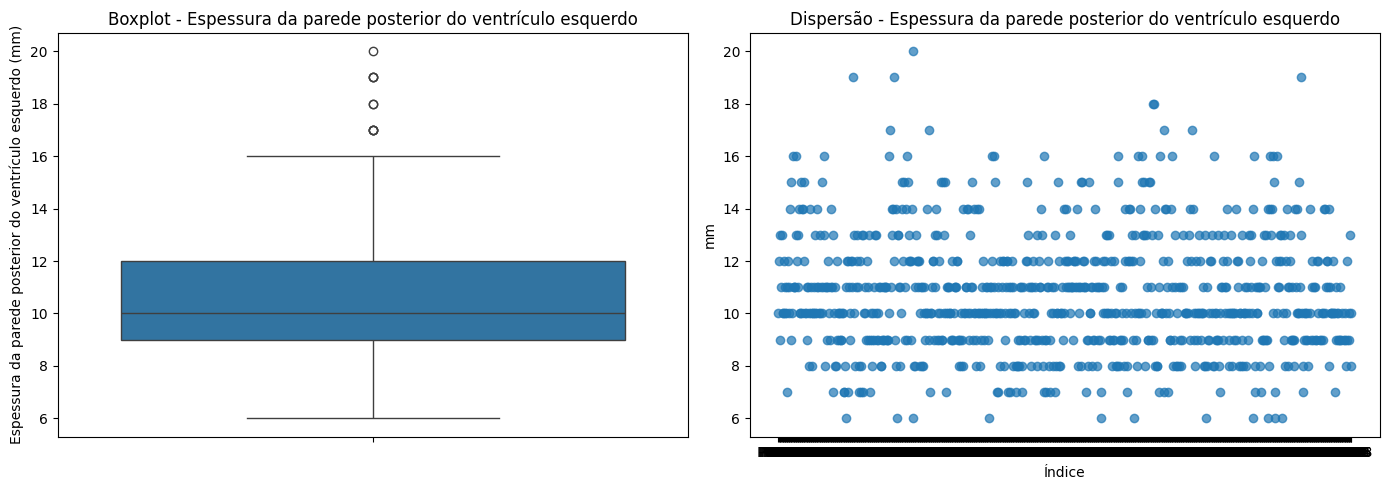

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Espessura da parede posterior do ventrículo esquerdo (mm)'], ax=axes[0])
axes[0].set_title('Boxplot - Espessura da parede posterior do ventrículo esquerdo')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Espessura da parede posterior do ventrículo esquerdo (mm)'], alpha=0.7)
axes[1].set_title('Dispersão - Espessura da parede posterior do ventrículo esquerdo')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('mm')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
ppve = df[df['Espessura da parede posterior do ventrículo esquerdo (mm)']>17.5]
ppve['Espessura da parede posterior do ventrículo esquerdo (mm)'].value_counts()

Espessura da parede posterior do ventrículo esquerdo (mm)
19.0    3
18.0    2
20.0    1
Name: count, dtype: int64

In [ ]:
df.loc[df['Espessura da parede posterior do ventrículo esquerdo (mm)'] > 17.5, 'Espessura da parede posterior do ventrículo esquerdo (mm)'] = 17.5
df['Espessura da parede posterior do ventrículo esquerdo (mm)'].describe()

count    826.000000
mean      10.670702
std        2.249022
min        6.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       17.500000
Name: Espessura da parede posterior do ventrículo esquerdo (mm), dtype: float64

Como são poucos casos, para os valores nulos estarei utilizando a média de cada gênero.

In [ ]:
mean = df.loc[df['Gênero (masculino=1)'] == 1, 'Espessura da parede posterior do ventrículo esquerdo (mm)'].median()
df.loc[
    (df['Espessura da parede posterior do ventrículo esquerdo (mm)'].isna()) &
    (df['Gênero (masculino=1)'] == 1),
    'Espessura da parede posterior do ventrículo esquerdo (mm)'
] = mean

mean = df.loc[df['Gênero (masculino=1)'] == 0, 'Espessura da parede posterior do ventrículo esquerdo (mm)'].median()
df.loc[
    (df['Espessura da parede posterior do ventrículo esquerdo (mm)'].isna()) &
    (df['Gênero (masculino=1)'] == 0),
    'Espessura da parede posterior do ventrículo esquerdo (mm)'
] = mean

df['Espessura da parede posterior do ventrículo esquerdo (mm)'].isna().sum()

np.int64(0)

####Espessura do septo

In [ ]:
df['Espessura do septo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Espessura do septo (mm)
Non-Null Count  Dtype  
--------------  -----  
826 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


Valores acima de 17mm é considerado uma hipertrofia grave, onde acima de 20mm é considerado altamente sugestivo de cardiomiopatia hipertrófica, entretanto, valores superiores a estes são raros. Nesse caso, passarei os valores para 17mm.

In [ ]:
df['Espessura do septo (mm)'].describe()

count    826.000000
mean      11.582324
std        2.731389
min        6.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       26.000000
Name: Espessura do septo (mm), dtype: float64

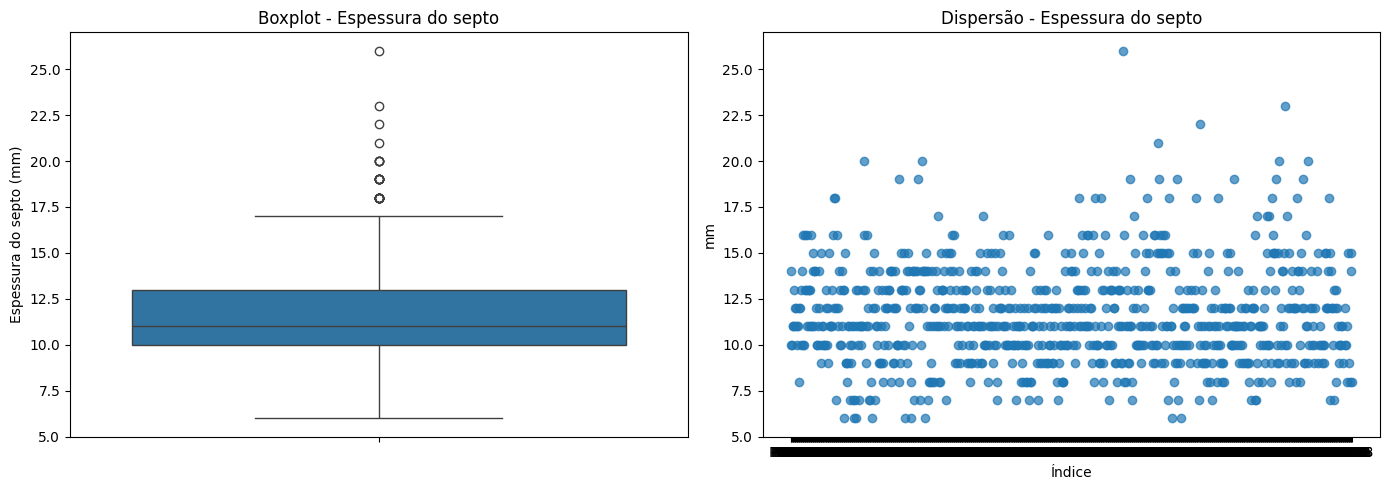

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Espessura do septo (mm)'], ax=axes[0])
axes[0].set_title('Boxplot - Espessura do septo')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Espessura do septo (mm)'], alpha=0.7)
axes[1].set_title('Dispersão - Espessura do septo')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('mm')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
ppve = df[df['Espessura do septo (mm)']>17.5]
ppve['Espessura do septo (mm)'].value_counts()

Espessura do septo (mm)
18.0    12
19.0     8
20.0     4
26.0     1
21.0     1
22.0     1
23.0     1
Name: count, dtype: int64

In [ ]:
ppve['Causa da morte'].value_counts()

Causa da morte
0    21
2     4
1     3
Name: count, dtype: int64

In [ ]:
df.loc[df['Espessura do septo (mm)'] > 17.5, 'Espessura do septo (mm)'] = 17.5
df['Espessura do septo (mm)'].describe()

count    826.000000
mean      11.521792
std        2.553455
min        6.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       17.500000
Name: Espessura do septo (mm), dtype: float64

Como são poucos casos, para os valores nulos estarei utilizando a média de cada gênero.

In [ ]:
mean = df.loc[df['Gênero (masculino=1)'] == 1, 'Espessura do septo (mm)'].mean()
df.loc[
    (df['Espessura do septo (mm)'].isna()) &
    (df['Gênero (masculino=1)'] == 1),
    'Espessura do septo (mm)'
] = mean

mean = df.loc[df['Gênero (masculino=1)'] == 0, 'Espessura do septo (mm)'].mean()
df.loc[
    (df['Espessura do septo (mm)'].isna()) &
    (df['Gênero (masculino=1)'] == 0),
    'Espessura do septo (mm)'
] = mean

df['Espessura do septo (mm)'].isna().sum()

np.int64(0)

####Intervalo QT

In [ ]:
df['QT corrigido'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: QT corrigido
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


Valores acima de 500ms é considerado um prolongamento grave. Neste caso passarei estes valores para o valor mais alto próximo.  

In [ ]:
df['QT corrigido'].describe()

count    837.000000
mean     443.199522
std       44.314876
min      315.000000
25%      411.000000
50%      440.000000
75%      474.000000
max      625.000000
Name: QT corrigido, dtype: float64

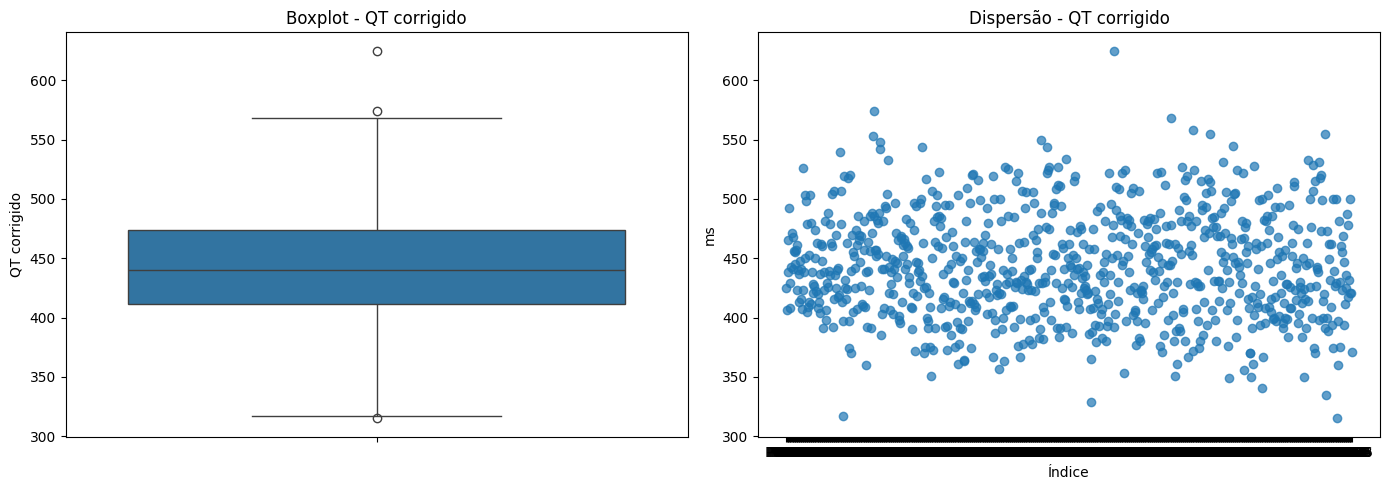

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['QT corrigido'], ax=axes[0])
axes[0].set_title('Boxplot - QT corrigido')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['QT corrigido'], alpha=0.7)
axes[1].set_title('Dispersão - QT corrigido')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('ms')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df[df['QT corrigido'] > 550]['QT corrigido'].value_counts()

QT corrigido
555    2
553    1
574    1
625    1
568    1
558    1
Name: count, dtype: int64

In [ ]:
df.loc[df['QT corrigido'] > 570, 'QT corrigido'] = 568
df['QT corrigido'].describe()

count    837.000000
mean     443.124253
std       44.057502
min      315.000000
25%      411.000000
50%      440.000000
75%      474.000000
max      568.000000
Name: QT corrigido, dtype: float64

####Tamanho do átrio esquerdo

In [ ]:
df['Tamanho do átrio esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Tamanho do átrio esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
832 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Tamanho do átrio esquerdo (mm)'].describe()

count    832.000000
mean      45.765625
std        8.126652
min       26.000000
25%       40.000000
50%       45.000000
75%       50.000000
max       80.000000
Name: Tamanho do átrio esquerdo (mm), dtype: float64

In [ ]:
df[df['Tamanho do átrio esquerdo (mm)'].isna()]['Causa da morte'].value_counts()

Causa da morte
2    3
1    2
Name: count, dtype: int64

In [ ]:
m = df.loc[df['Causa da morte'].isin([1, 2]), 'Tamanho do átrio esquerdo (mm)'].mean()
df['Tamanho do átrio esquerdo (mm)'] = df['Tamanho do átrio esquerdo (mm)'].fillna(m)
df['Tamanho do átrio esquerdo (mm)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Tamanho do átrio esquerdo (mm)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####Intervalo PR

In [ ]:
df['Intervalo PR (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Intervalo PR (ms)
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Intervalo PR (ms)'].describe()

count    837.000000
mean     397.023895
std      365.128518
min       86.000000
25%      163.000000
50%      189.000000
75%      999.000000
max      999.000000
Name: Intervalo PR (ms), dtype: float64

Foi observado que mais de 200 instâncias apresentam o valor 999 para este atributo, indicando registros inconsistentes ou placeholders. Diante disso, optou-se por remover a coluna da base de dados.

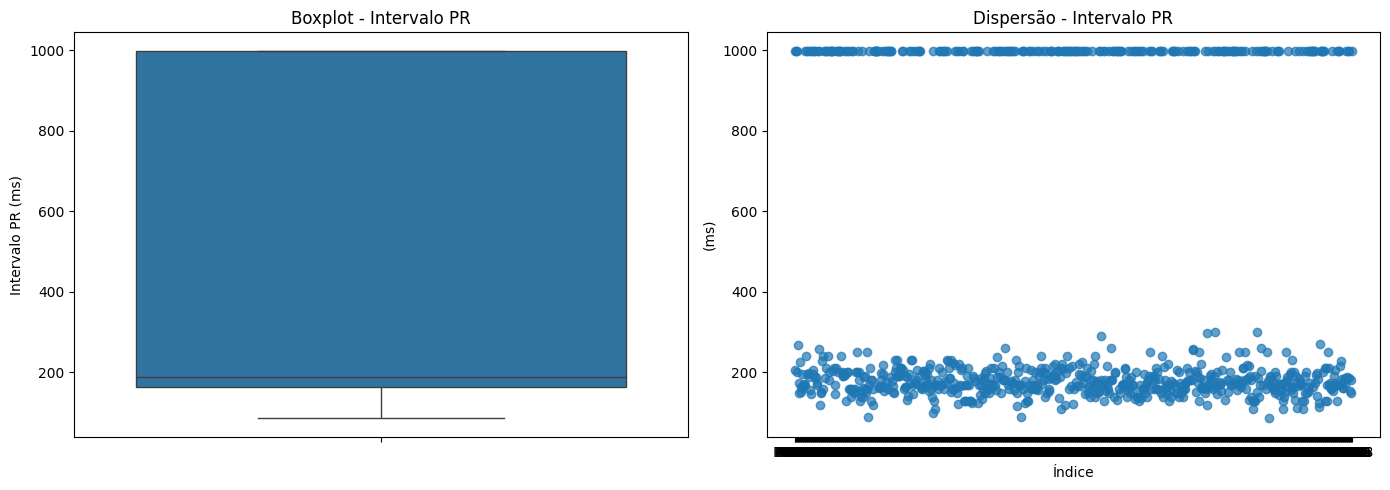

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Intervalo PR (ms)'], ax=axes[0])
axes[0].set_title('Boxplot - Intervalo PR')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Intervalo PR (ms)'], alpha=0.7)
axes[1].set_title('Dispersão - Intervalo PR')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(ms)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
len(df[df['Intervalo PR (ms)'] > 400])

224

In [ ]:
df = df.drop(columns=['Intervalo PR (ms)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 81 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####QT corrigido

In [ ]:
df['QT corrigido'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: QT corrigido
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['QT corrigido'].describe()

count    837.000000
mean     443.124253
std       44.057502
min      315.000000
25%      411.000000
50%      440.000000
75%      474.000000
max      568.000000
Name: QT corrigido, dtype: float64

####Duração do QRS

In [ ]:
df['Duração do QRS (ms)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Duração do QRS (ms)
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


Ainda que 238ms seja um valor prolongado do complexo QRS, pode ocorrer em alguns casos.

In [ ]:
df['Duração do QRS (ms)'].describe()

count    837.000000
mean     124.583035
std       34.178561
min       70.000000
25%       96.000000
50%      119.000000
75%      150.000000
max      238.000000
Name: Duração do QRS (ms), dtype: float64

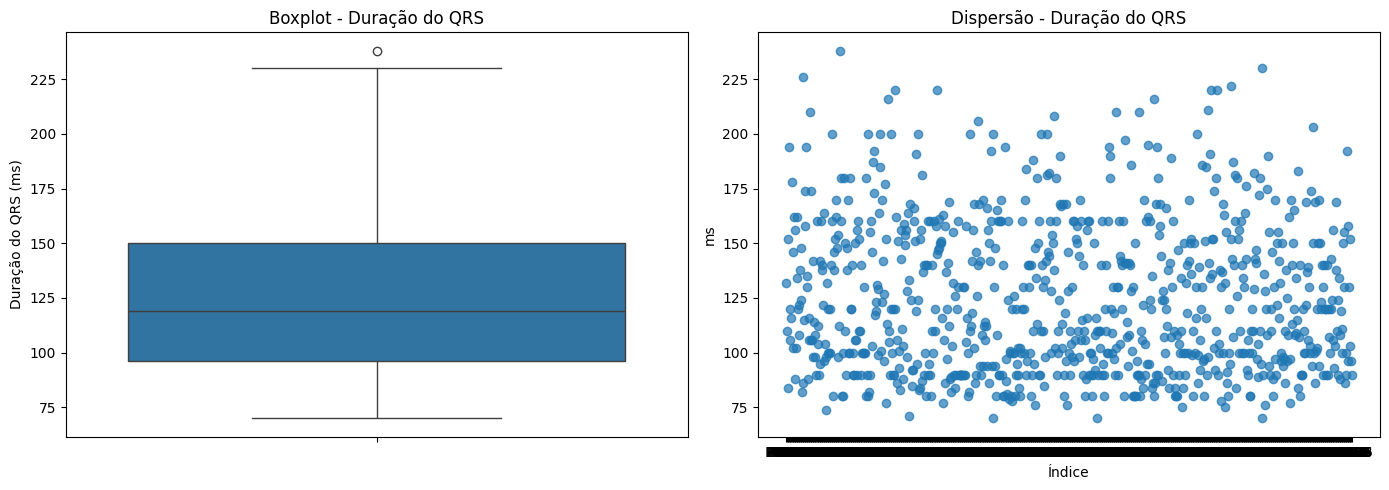

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Duração do QRS (ms)'], ax=axes[0])
axes[0].set_title('Boxplot - Duração do QRS')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Duração do QRS (ms)'], alpha=0.7)
axes[1].set_title('Dispersão - Duração do QRS')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('ms')

# Layout ajustado
plt.tight_layout()
plt.show()


####Número de batimentos ventriculares prematuros em 24h

In [ ]:
df['Número de batimentos ventriculares prematuros em 24h'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Número de batimentos ventriculares prematuros em 24h
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Número de batimentos ventriculares prematuros em 24h'].describe()

count      837.000000
mean      1906.399044
std       4147.900895
min          0.000000
25%         37.000000
50%        255.000000
75%       1620.000000
max      44500.000000
Name: Número de batimentos ventriculares prematuros em 24h, dtype: float64

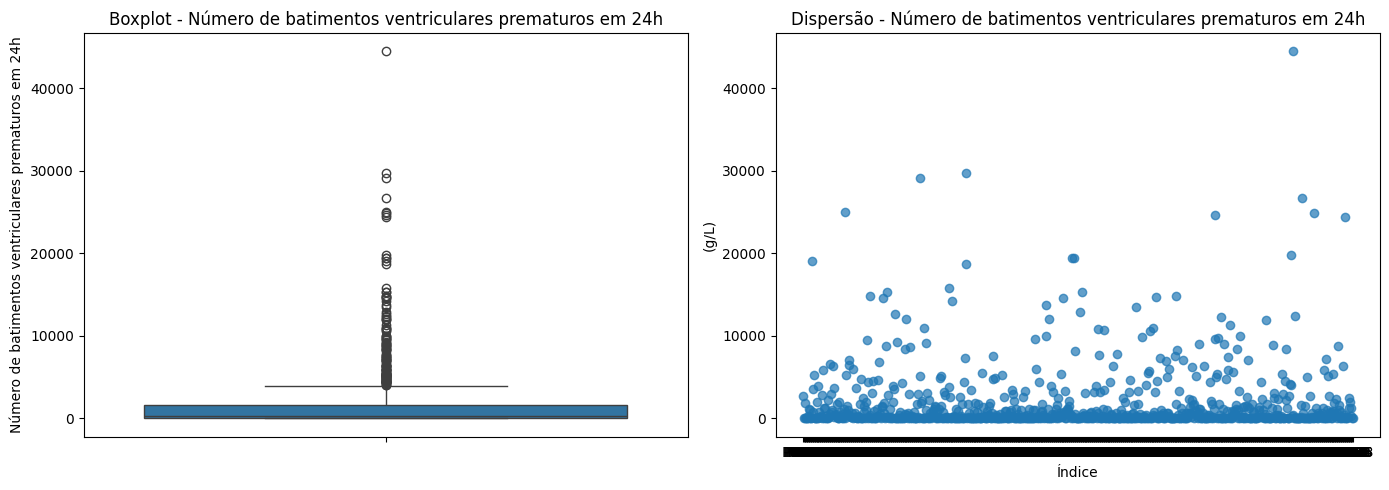

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Número de batimentos ventriculares prematuros em 24h'], ax=axes[0])
axes[0].set_title('Boxplot - Número de batimentos ventriculares prematuros em 24h')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Número de batimentos ventriculares prematuros em 24h'], alpha=0.7)
axes[1].set_title('Dispersão - Número de batimentos ventriculares prematuros em 24h')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(g/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


Devido à natureza pouco clara do atributo, optou-se por removê-lo da base de dados, a fim de não comprometer a integridade da análise.
O mesmo vale para "Número de contrações ventriculares prematuras por hora" e "Número de batimentos supraventriculares prematuros em 24h"

In [ ]:
df = df.drop(columns=['Número de batimentos ventriculares prematuros em 24h', "Número de contrações ventriculares prematuras por hora", "Número de batimentos supraventriculares prematuros em 24h"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 78 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Tabagismo diário (cigarros/dia)

In [ ]:
df['Tabagismo diário (cigarros/dia)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Tabagismo diário (cigarros/dia)
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


O consumo diário de mais de 60 cigarros é considerado um evento raro na base de dados. Diante disso, esse valor será adotado como limiar, de modo a tratar registros que ultrapassem esse ponto como casos atípicos.

In [ ]:
df['Tabagismo diário (cigarros/dia)'].describe()

count    837.000000
mean      17.057348
std       17.963654
min        0.000000
25%        0.000000
50%       20.000000
75%       30.000000
max      100.000000
Name: Tabagismo diário (cigarros/dia), dtype: float64

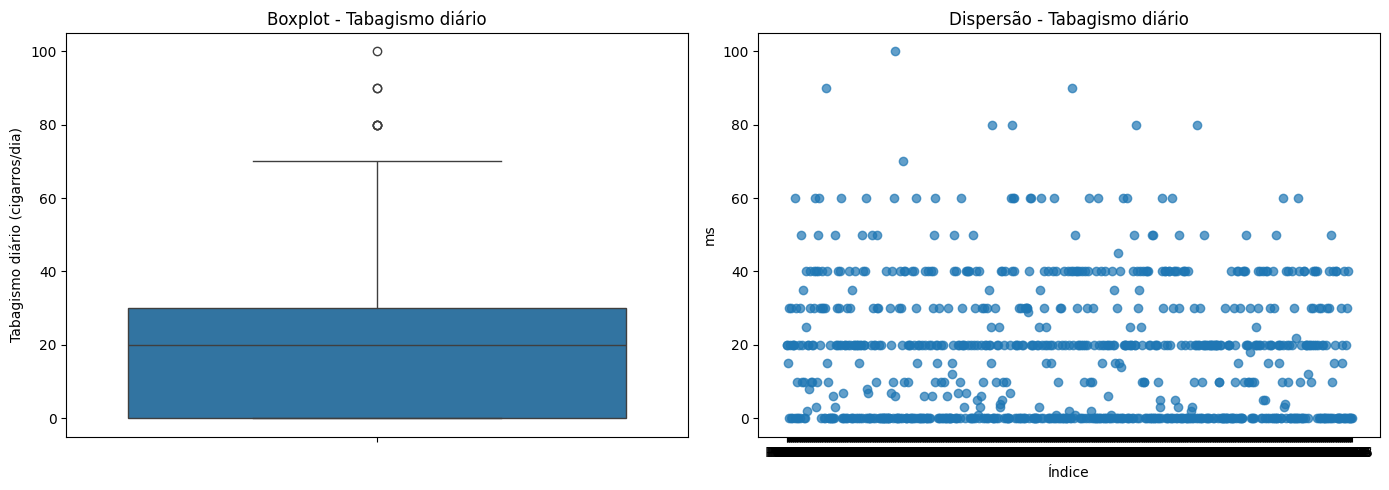

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Tabagismo diário (cigarros/dia)'], ax=axes[0])
axes[0].set_title('Boxplot - Tabagismo diário')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Tabagismo diário (cigarros/dia)'], alpha=0.7)
axes[1].set_title('Dispersão - Tabagismo diário')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('ms')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Tabagismo diário (cigarros/dia)'] > 60, 'Tabagismo diário (cigarros/dia)'] = 60
df['Tabagismo diário (cigarros/dia)'].describe()

count    837.000000
mean      16.830346
std       17.234309
min        0.000000
25%        0.000000
50%       20.000000
75%       30.000000
max       60.000000
Name: Tabagismo diário (cigarros/dia), dtype: float64

####Tempo sem fumar (anos)
O campo Tempo sem fumar (anos) apresenta caráter relativo, uma vez que seu valor depende diretamente da data de referência da coleta. Por esse motivo, optou-se por remover essa variável da base de dados.

In [ ]:
df = df.drop(columns=['Tempo sem fumar (anos)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 77 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Cigarros/ano

O campo Cigarro/ano também possui caráter relativo, pois seu cálculo está vinculado ao tempo de exposição e não representa uma medida absoluta e independente. Dessa forma, optou-se por remover essa variável da base de dados.

In [ ]:
df = df.drop(columns=['Cigarros/ano'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 76 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Consumo de álcool

O campo Consumo de álcool (unidades padrão) apresenta indefinição conceitual, uma vez que não está especificado o que se considera como “unidade padrão”. Essa falta de clareza compromete a interpretação dos dados e dificulta a análise. Por esse motivo, optou-se por remover essa variável da base de dados.

In [ ]:
df = df.drop(columns=['Consumo de álcool (unidades padrão)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 75 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Albumina

In [ ]:
df['Albumina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Albumina (g/L)
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Albumina (g/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Albumina (g/L)'] = base_df['Albumina (g/L)'].astype("float64")
base_df['Albumina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Albumina (g/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


O intervalo de referência considerado normal para a albumina sérica situa-se, aproximadamente, entre 35 e 50. Com base nisso, foram definidos limites de 30 e 55 como valores de corte, de modo a identificar e tratar possíveis registros atípicos.

In [ ]:
df.replace({'Albumina (g/L)': {',': '.'}}, regex=True, inplace=True)
df['Albumina (g/L)'] = df['Albumina (g/L)'].astype("float64")
df['Albumina (g/L)'].describe()

count    836.000000
mean      41.901782
std        3.763255
min       21.000000
25%       39.975000
50%       42.000000
75%       44.100000
max       54.400000
Name: Albumina (g/L), dtype: float64

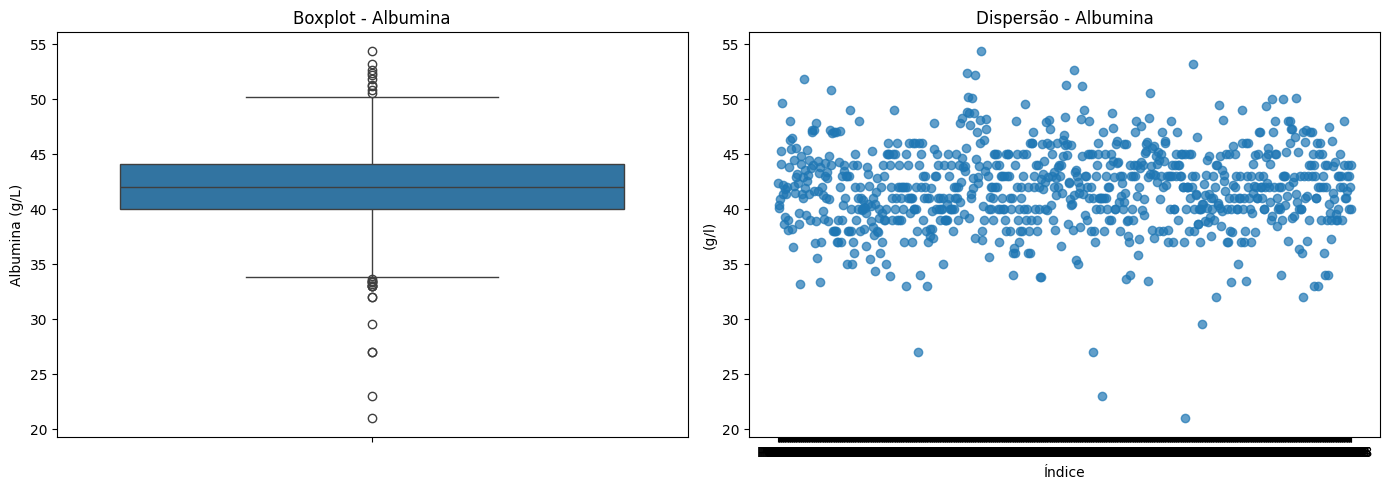

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Albumina (g/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Albumina')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Albumina (g/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Albumina')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(g/l)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Albumina (g/L)'] < 30, 'Albumina (g/L)'] = 30
df['Albumina (g/L)'].describe()

count    836.000000
mean      41.928577
std        3.653131
min       30.000000
25%       39.975000
50%       42.000000
75%       44.100000
max       54.400000
Name: Albumina (g/L), dtype: float64

In [ ]:
df[df['Albumina (g/L)'].isna()]['Causa da morte'].value_counts()

Causa da morte
0    1
Name: count, dtype: int64

In [ ]:
m = df[df['Causa da morte'].isin([1])]['Albumina (g/L)'].mean()
df['Albumina (g/L)'] = df['Albumina (g/L)'].fillna(m)

In [ ]:
df['Albumina (g/L)'].isna().sum()

np.int64(0)

####ALT ou TGP

In [ ]:
df['ALT ou TGP (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: ALT ou TGP (UI/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['ALT ou TGP (UI/L)'].describe()

count    837.000000
mean      26.000000
std       20.421632
min        6.000000
25%       15.000000
50%       21.000000
75%       30.000000
max      191.000000
Name: ALT ou TGP (UI/L), dtype: float64

Embora valores elevados de ALT (TGP, UI/L) possam ocorrer em contextos hospitalares, a elevada dispersão observada na base de dados torna necessária a definição de um limite para análise. Nesse sentido, foi estabelecido um limiar de 80, a fim de identificar e tratar registros atípicos de maneira consistente.

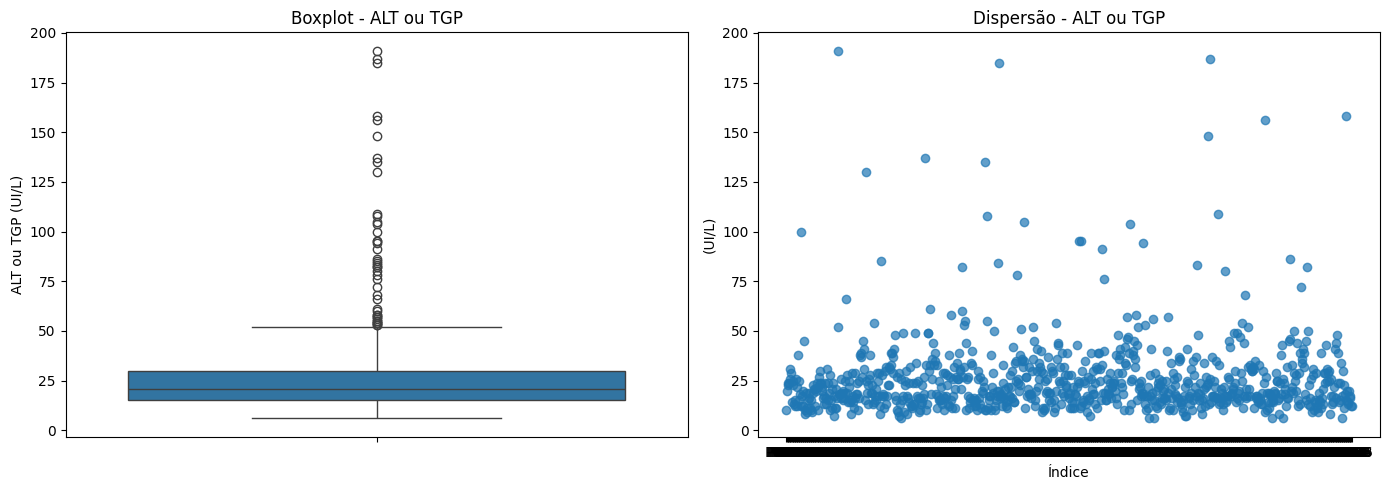

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['ALT ou TGP (UI/L)'], ax=axes[0])
axes[0].set_title('Boxplot - ALT ou TGP')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['ALT ou TGP (UI/L)'], alpha=0.7)
axes[1].set_title('Dispersão - ALT ou TGP')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(UI/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['ALT ou TGP (UI/L)'] > 80, 'ALT ou TGP (UI/L)'] = 80
df['ALT ou TGP (UI/L)'].describe()

count    837.000000
mean      24.912784
std       14.885473
min        6.000000
25%       15.000000
50%       21.000000
75%       30.000000
max       80.000000
Name: ALT ou TGP (UI/L), dtype: float64

####AST ou TGO

In [ ]:
df['AST ou TGO (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: AST ou TGO (UI/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['AST ou TGO (UI/L)'].describe()

count    837.000000
mean      22.885305
std       14.250535
min        7.000000
25%       16.000000
50%       20.000000
75%       25.000000
max      154.000000
Name: AST ou TGO (UI/L), dtype: float64

Embora valores elevados de AST ou TGO (UI/L) possam ocorrer em contextos hospitalares, a elevada dispersão observada na base de dados torna necessária a definição de um limite para análise. Nesse sentido, foi estabelecido um limiar de 60, a fim de identificar e tratar registros atípicos de maneira consistente.

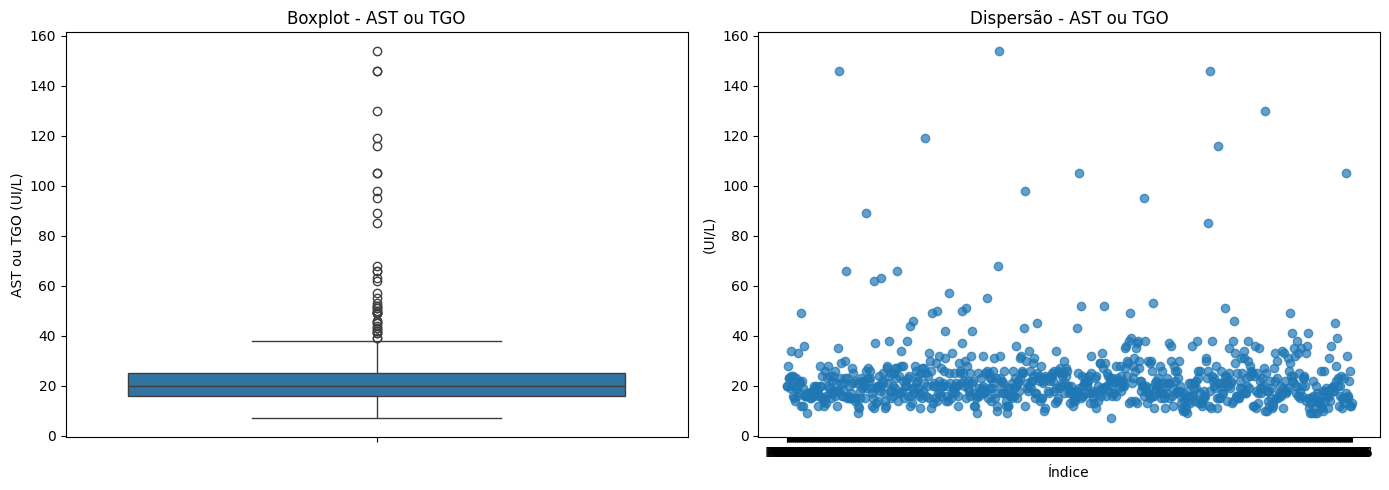

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['AST ou TGO (UI/L)'], ax=axes[0])
axes[0].set_title('Boxplot - AST ou TGO')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['AST ou TGO (UI/L)'], alpha=0.7)
axes[1].set_title('Dispersão - AST ou TGO')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(UI/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['AST ou TGO (UI/L)'] > 60, 'AST ou TGO (UI/L)'] = 60
df['AST ou TGO (UI/L)'].describe()

count    837.000000
mean      22.057348
std        9.426069
min        7.000000
25%       16.000000
50%       20.000000
75%       25.000000
max       60.000000
Name: AST ou TGO (UI/L), dtype: float64

####Colesterol total

In [ ]:
df['Colesterol total (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Colesterol total (mmol/L)
Non-Null Count  Dtype 
--------------  ----- 
837 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Colesterol total (mmol/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Colesterol total (mmol/L)'] = base_df['Colesterol total (mmol/L)'].astype("float64")
base_df['Colesterol total (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Colesterol total (mmol/L)
Non-Null Count  Dtype  
--------------  -----  
838 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Colesterol total (mmol/L)': {',': '.'}}, regex=True, inplace=True)
df['Colesterol total (mmol/L)'] = df['Colesterol total (mmol/L)'].astype("float64")
df['Colesterol total (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Colesterol total (mmol/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Colesterol total (mmol/L)'].describe()

count    837.000000
mean       4.838925
std        1.050669
min        2.140000
25%        4.060000
50%        4.730000
75%        5.510000
max        9.460000
Name: Colesterol total (mmol/L), dtype: float64

####Creatinina

In [ ]:
df['Creatinina (µmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Creatinina (µmol/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Creatinina (µmol/L)'].describe()

count    837.000000
mean     108.731183
std       33.954101
min       53.000000
25%       88.000000
50%      100.000000
75%      123.000000
max      285.000000
Name: Creatinina (µmol/L), dtype: float64

A elevada dispersão observada na base de dados torna necessária a definição de um limite para análise. Nesse sentido, foi estabelecido um limiar de 200, a fim de identificar e tratar registros atípicos de maneira consistente.

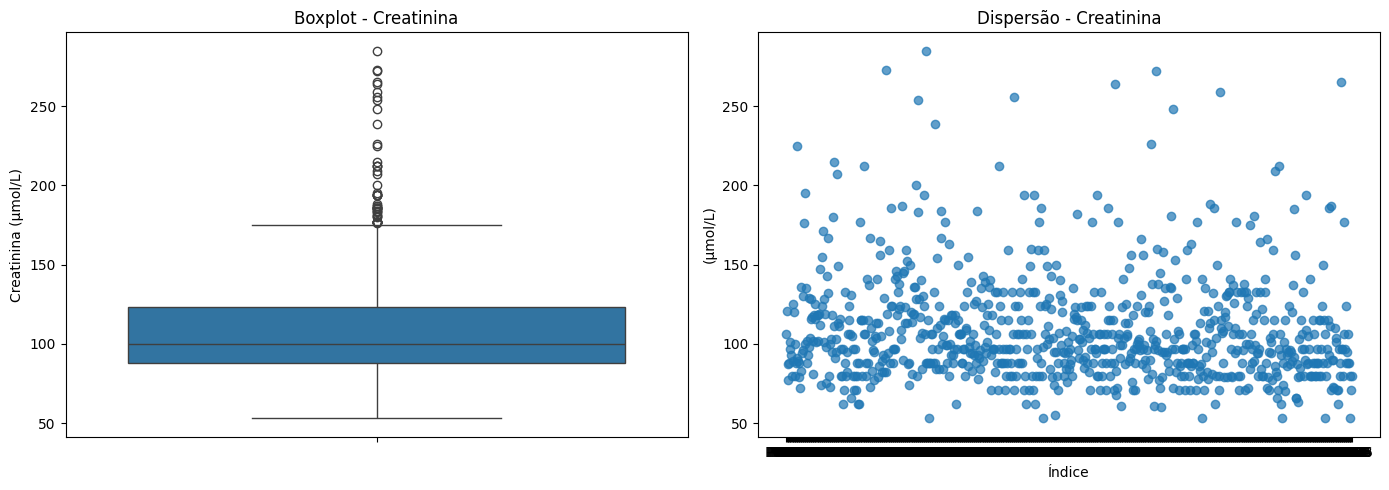

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Creatinina (µmol/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Creatinina')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Creatinina (µmol/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Creatinina')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(µmol/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Creatinina (µmol/L)'] > 200, 'Creatinina (µmol/L)'] = 200
df['Creatinina (µmol/L)'].describe()

count    837.000000
mean     107.855436
std       30.698829
min       53.000000
25%       88.000000
50%      100.000000
75%      123.000000
max      200.000000
Name: Creatinina (µmol/L), dtype: float64

####Gama-glutamil transpeptidase

In [ ]:
df['Gama-glutamil transpeptidase (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Gama-glutamil transpeptidase (UI/L)
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Gama-glutamil transpeptidase (UI/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Gama-glutamil transpeptidase (UI/L)'] = base_df['Gama-glutamil transpeptidase (UI/L)'].astype("float64")
base_df['Gama-glutamil transpeptidase (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Gama-glutamil transpeptidase (UI/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Gama-glutamil transpeptidase (UI/L)': {',': '.'}}, regex=True, inplace=True)
df['Gama-glutamil transpeptidase (UI/L)'] = df['Gama-glutamil transpeptidase (UI/L)'].astype("float64")
df['Gama-glutamil transpeptidase (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Gama-glutamil transpeptidase (UI/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Gama-glutamil transpeptidase (UI/L)'].describe()

count    836.000000
mean      48.188038
std       66.912010
min        6.000000
25%       18.750000
50%       28.000000
75%       50.000000
max      821.000000
Name: Gama-glutamil transpeptidase (UI/L), dtype: float64

Considerando a alta dispersão dos dados, foi definido um limiar de 100 UI/L, com o objetivo de identificar e tratar esses registros atípicos de forma consistente.

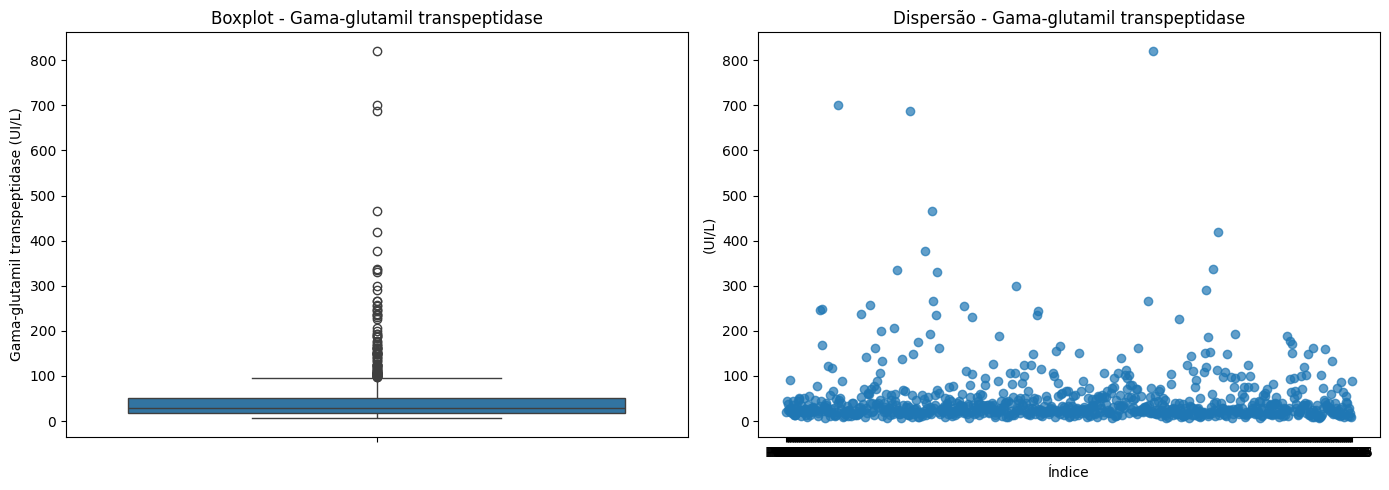

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Gama-glutamil transpeptidase (UI/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Gama-glutamil transpeptidase')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Gama-glutamil transpeptidase (UI/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Gama-glutamil transpeptidase')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(UI/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Gama-glutamil transpeptidase (UI/L)'] > 100, 'Gama-glutamil transpeptidase (UI/L)'] = 100
df['Gama-glutamil transpeptidase (UI/L)'].describe()

count    836.000000
mean      38.551675
std       27.815935
min        6.000000
25%       18.750000
50%       28.000000
75%       50.000000
max      100.000000
Name: Gama-glutamil transpeptidase (UI/L), dtype: float64

In [ ]:
m = df['Gama-glutamil transpeptidase (UI/L)'].mean()
df['Gama-glutamil transpeptidase (UI/L)'] = df['Gama-glutamil transpeptidase (UI/L)'].fillna(m)
df['Gama-glutamil transpeptidase (UI/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Gama-glutamil transpeptidase (UI/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####Glicose

In [ ]:
df['Glicose (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Glicose (mmol/L)
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Glicose (mmol/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Glicose (mmol/L)'] = base_df['Glicose (mmol/L)'].astype("float64")
base_df['Glicose (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Glicose (mmol/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Glicose (mmol/L)': {',': '.'}}, regex=True, inplace=True)
df['Glicose (mmol/L)'] = df['Glicose (mmol/L)'].astype("float64")
df['Glicose (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Glicose (mmol/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Glicose (mmol/L)'].describe()

count    836.000000
mean       6.815000
std        2.742749
min        3.100000
25%        5.090000
50%        5.800000
75%        7.600000
max       19.700000
Name: Glicose (mmol/L), dtype: float64

Considerando a alta dispersão dos dados, foi definido um limiar de 15 mmol/L, com o objetivo de identificar e tratar esses registros atípicos de forma consistente.

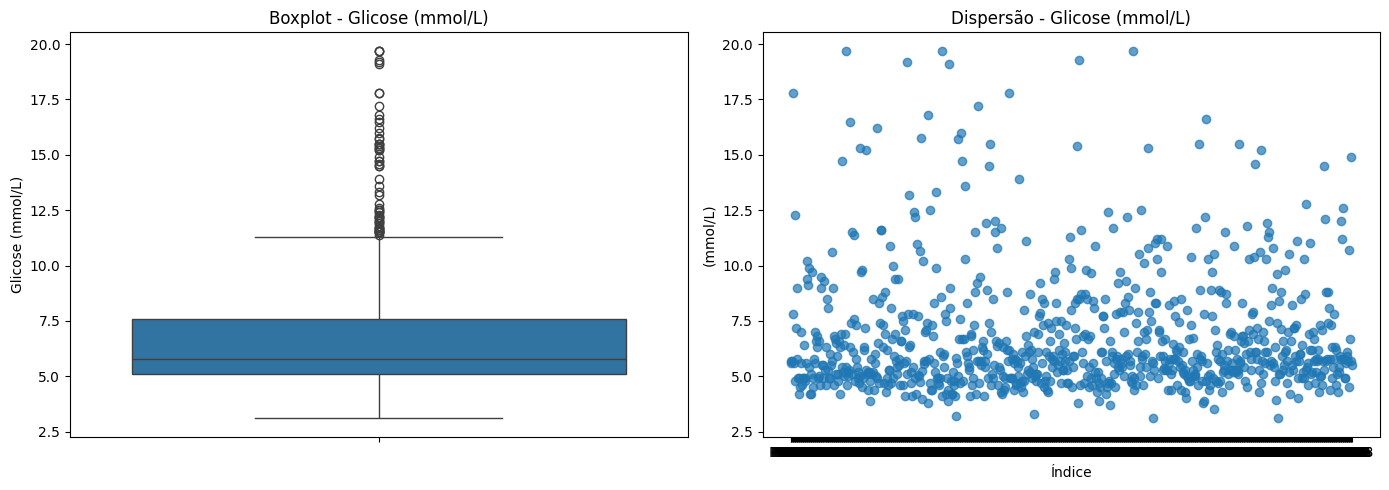

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Glicose (mmol/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Glicose (mmol/L)')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Glicose (mmol/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Glicose (mmol/L)')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(mmol/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Glicose (mmol/L)'] > 15, 'Glicose (mmol/L)'] = 15
df['Glicose (mmol/L)'].describe()

count    836.000000
mean       6.760000
std        2.536847
min        3.100000
25%        5.090000
50%        5.800000
75%        7.600000
max       15.000000
Name: Glicose (mmol/L), dtype: float64

In [ ]:
m = df['Glicose (mmol/L)'].mean()
df['Glicose (mmol/L)'] = df['Glicose (mmol/L)'].fillna(m)
df['Glicose (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Glicose (mmol/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####Hemoglobina

In [ ]:
df['Hemoglobina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Hemoglobina (g/L)
Non-Null Count  Dtype 
--------------  ----- 
834 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Hemoglobina (g/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Hemoglobina (g/L)'] = base_df['Hemoglobina (g/L)'].astype("float64")
base_df['Hemoglobina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Hemoglobina (g/L)
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Hemoglobina (g/L)': {',': '.'}}, regex=True, inplace=True)
df['Hemoglobina (g/L)'] = df['Hemoglobina (g/L)'].astype("float64")
df['Hemoglobina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Hemoglobina (g/L)
Non-Null Count  Dtype  
--------------  -----  
834 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Hemoglobina (g/L)'].describe()

count    834.000000
mean     137.628297
std       15.980509
min       80.000000
25%      127.000000
50%      137.500000
75%      149.000000
max      179.000000
Name: Hemoglobina (g/L), dtype: float64

Considerando a alta dispersão dos dados, foi definido um limiar de 90 g/L, com o objetivo de identificar e tratar esses registros atípicos de forma consistente.

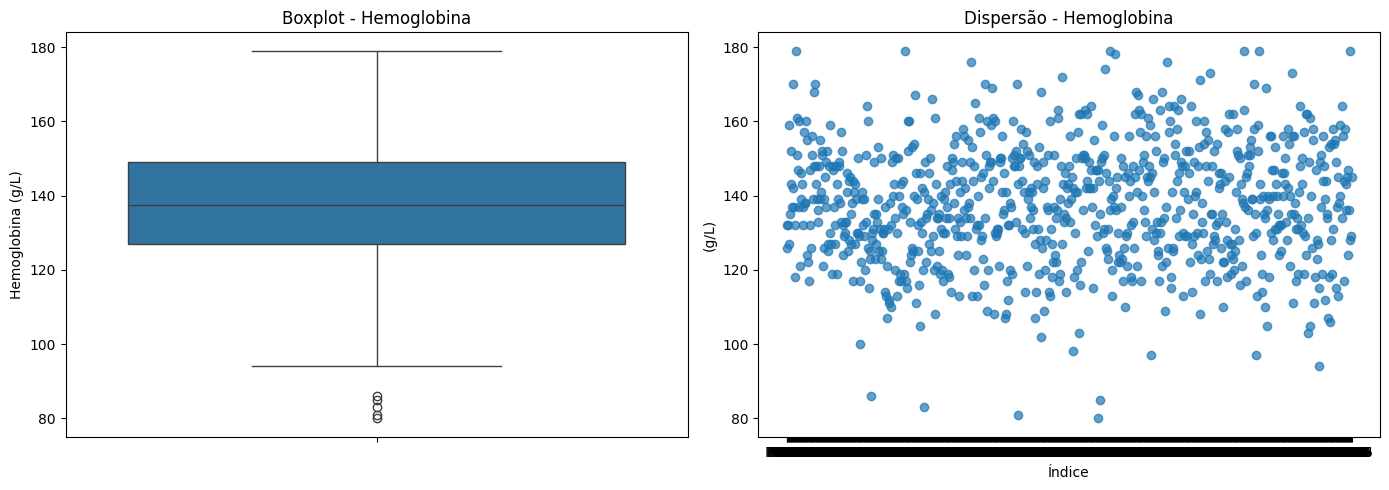

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Hemoglobina (g/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Hemoglobina')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Hemoglobina (g/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Hemoglobina')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(g/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Hemoglobina (g/L)'] < 90, 'Hemoglobina (g/L)'] = 90
df['Hemoglobina (g/L)'].describe()

count    834.000000
mean     137.670264
std       15.844469
min       90.000000
25%      127.000000
50%      137.500000
75%      149.000000
max      179.000000
Name: Hemoglobina (g/L), dtype: float64

In [ ]:
df[df['Hemoglobina (g/L)'].isna()]['Causa da morte'].value_counts()

Causa da morte
1    2
2    1
Name: count, dtype: int64

In [ ]:
df.loc[df['Causa da morte'].isin([1,2]), 'Hemoglobina (g/L)'].mean()

np.float64(134.91623036649216)

In [ ]:
m = df.loc[df['Causa da morte'].isin([1,2]), 'Hemoglobina (g/L)'].mean()
df['Hemoglobina (g/L)'] = df['Hemoglobina (g/L)'].fillna(m)
df['Hemoglobina (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Hemoglobina (g/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####HDL

O atributo HDL (mmol/L) apresenta um grande número de valores ausentes, o que compromete a integridade da análise. Dessa forma, optou-se por remover essa coluna da base de dados.

In [ ]:
df['HDL (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: HDL (mmol/L)
Non-Null Count  Dtype 
--------------  ----- 
809 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
df = df.drop(columns=['HDL (mmol/L)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 74 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Potássio

In [ ]:
df['Potássio (mEq/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Potássio (mEq/L)
Non-Null Count  Dtype 
--------------  ----- 
835 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Potássio (mEq/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Potássio (mEq/L)'] = base_df['Potássio (mEq/L)'].astype("float64")
base_df['Potássio (mEq/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Potássio (mEq/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Potássio (mEq/L)': {',': '.'}}, regex=True, inplace=True)
df['Potássio (mEq/L)'] = df['Potássio (mEq/L)'].astype("float64")
df['Potássio (mEq/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Potássio (mEq/L)
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Potássio (mEq/L)'].describe()

count    835.000000
mean       4.463617
std        0.492401
min        2.920000
25%        4.115000
50%        4.490000
75%        4.700000
max        6.300000
Name: Potássio (mEq/L), dtype: float64

In [ ]:
df[df['Potássio (mEq/L)'].isna()]['Causa da morte'].value_counts()

Causa da morte
1    1
0    1
Name: count, dtype: int64

In [ ]:
m = df['Potássio (mEq/L)'].mean()
df['Potássio (mEq/L)'] = df['Potássio (mEq/L)'].fillna(m)
df['Potássio (mEq/L)'].isna().sum()

np.int64(0)

####LDL

O atributo LDL (mmol/L) apresenta um grande número de valores ausentes, o que compromete a integridade da análise. Dessa forma, optou-se por remover essa coluna da base de dados.

In [ ]:
df['LDL (mmol/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: LDL (mmol/L)
Non-Null Count  Dtype 
--------------  ----- 
809 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
df = df.drop(columns=['LDL (mmol/L)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Causa da morte                                             837 non-null    int64  
 1   Idade                                                      837 non-null    int64  
 2   Gênero (masculino=1)                                       837 non-null    int64  
 3   Peso (kg)                                                  837 non-null    int64  
 4   Altura (cm)                                                837 non-null    int64  
 5   Índice de Massa Corporal (Kg/m²)                           837 non-null    float64
 6   Classe NYHA                                                837 non-null    int64  
 7   Pressão arterial diastólica (mmHg)                         837 non-null    int64  
 8   Pressão a

####Sódio

In [ ]:
df['Sódio (mEq/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Sódio (mEq/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Sódio (mEq/L)'].describe()

count    836.000000
mean     139.267943
std        3.128004
min      127.000000
25%      137.000000
50%      139.500000
75%      141.000000
max      153.000000
Name: Sódio (mEq/L), dtype: float64

Foi estabelecido um limiar de 130-148 mEq/L, com o objetivo de identificar e tratar registros atípicos de maneira consistente.

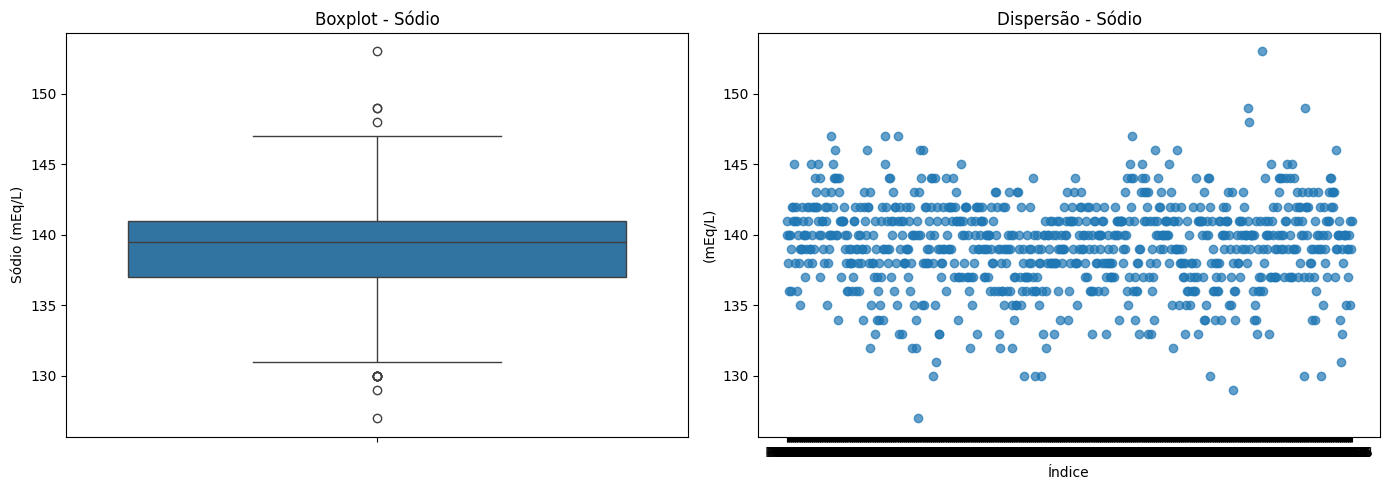

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['Sódio (mEq/L)'], ax=axes[0])
axes[0].set_title('Boxplot - Sódio')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['Sódio (mEq/L)'], alpha=0.7)
axes[1].set_title('Dispersão - Sódio')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(mEq/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['Sódio (mEq/L)'] < 130, 'Sódio (mEq/L)'] = 130
df.loc[df['Sódio (mEq/L)'] > 148, 'Sódio (mEq/L)'] = 148
df['Sódio (mEq/L)'].describe()

count    836.000000
mean     139.264354
std        3.082999
min      130.000000
25%      137.000000
50%      139.500000
75%      141.000000
max      148.000000
Name: Sódio (mEq/L), dtype: float64

In [ ]:
df[df['Sódio (mEq/L)'].isna()]['Causa da morte'].value_counts()

Causa da morte
1    1
Name: count, dtype: int64

In [ ]:
m = df[df['Causa da morte'].isin([1, 2])]['Sódio (mEq/L)'].mean()
df['Sódio (mEq/L)'] = df['Sódio (mEq/L)'].fillna(m)
df['Sódio (mEq/L)'].isna().sum()

np.int64(0)

####Proteína

In [ ]:
df['Proteína (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Proteína (g/L)
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Proteína (g/L)': {',': '.'}}, regex=True, inplace=True)
base_df['Proteína (g/L)'] = base_df['Proteína (g/L)'].astype("float64")
base_df['Proteína (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Proteína (g/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Proteína (g/L)': {',': '.'}}, regex=True, inplace=True)
df['Proteína (g/L)'] = df['Proteína (g/L)'].astype("float64")
df['Proteína (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Proteína (g/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Proteína (g/L)'].describe()

count    836.000000
mean      72.305617
std        5.252192
min       52.000000
25%       68.575000
50%       72.000000
75%       75.925000
max       90.000000
Name: Proteína (g/L), dtype: float64

In [ ]:
m = df['Proteína (g/L)'].mean()
df['Proteína (g/L)'] = df['Proteína (g/L)'].fillna(m)
df['Proteína (g/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Proteína (g/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####TSH

In [ ]:
df['TSH (mIU/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: TSH (mIU/L)
Non-Null Count  Dtype 
--------------  ----- 
836 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'TSH (mIU/L)': {',': '.'}}, regex=True, inplace=True)
base_df['TSH (mIU/L)'] = base_df['TSH (mIU/L)'].astype("float64")
base_df['TSH (mIU/L)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: TSH (mIU/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'TSH (mIU/L)': {',': '.'}}, regex=True, inplace=True)
df['TSH (mIU/L)'] = df['TSH (mIU/L)'].astype("float64")
df['TSH (mIU/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: TSH (mIU/L)
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['TSH (mIU/L)'].describe()

count    836.000000
mean       2.847138
std        5.753328
min        0.070000
25%        1.180000
50%        1.840000
75%        2.800000
max       83.920000
Name: TSH (mIU/L), dtype: float64

A elevada dispersão observada na base de dados torna necessária a definição de um limite para análise. Nesse sentido, foi estabelecido um limiar de 7 mIU/L, a fim de identificar e tratar registros atípicos de maneira consistente.

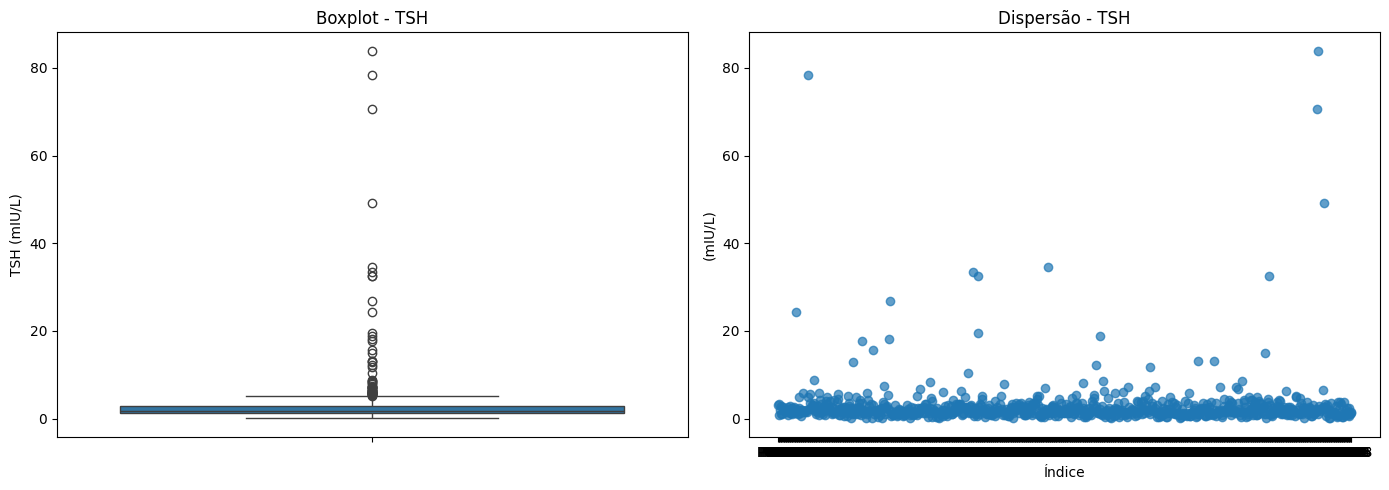

In [ ]:
# Tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot no primeiro subplot
sns.boxplot(y=df['TSH (mIU/L)'], ax=axes[0])
axes[0].set_title('Boxplot - TSH')

# Scatter plot no segundo subplot
axes[1].scatter(df.index, df['TSH (mIU/L)'], alpha=0.7)
axes[1].set_title('Dispersão - TSH')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('(mIU/L)')

# Layout ajustado
plt.tight_layout()
plt.show()


In [ ]:
df.loc[df['TSH (mIU/L)'] > 7, 'TSH (mIU/L)'] = 7
df['TSH (mIU/L)'].describe()

count    836.000000
mean       2.249075
std        1.570012
min        0.070000
25%        1.180000
50%        1.840000
75%        2.800000
max        7.000000
Name: TSH (mIU/L), dtype: float64

In [ ]:
m = df['TSH (mIU/L)'].mean()
df['TSH (mIU/L)'] = df['TSH (mIU/L)'].fillna(m)
df['TSH (mIU/L)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: TSH (mIU/L)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####Ureia

In [ ]:
df['Ureia (mg/dL)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Ureia (mg/dL)
Non-Null Count  Dtype 
--------------  ----- 
837 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Ureia (mg/dL)': {',': '.'}}, regex=True, inplace=True)
base_df['Ureia (mg/dL)'] = base_df['Ureia (mg/dL)'].astype("float64")
base_df['Ureia (mg/dL)'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Ureia (mg/dL)
Non-Null Count  Dtype  
--------------  -----  
838 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Ureia (mg/dL)': {',': '.'}}, regex=True, inplace=True)
df['Ureia (mg/dL)'] = df['Ureia (mg/dL)'].astype("float64")
df['Ureia (mg/dL)'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Ureia (mg/dL)
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Ureia (mg/dL)'].describe()

count    837.000000
mean       9.324158
std        4.449906
min        1.800000
25%        6.500000
50%        8.300000
75%       10.600000
max       37.270000
Name: Ureia (mg/dL), dtype: float64

####Índice cardiotorácico

In [ ]:
df['Índice cardiotorácico'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Índice cardiotorácico
Non-Null Count  Dtype 
--------------  ----- 
835 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [ ]:
base_df.replace({'Índice cardiotorácico': {',': '.'}}, regex=True, inplace=True)
base_df['Índice cardiotorácico'] = base_df['Índice cardiotorácico'].astype("float64")
base_df['Índice cardiotorácico'].info()

<class 'pandas.core.series.Series'>
Index: 838 entries, P0001 to P1083
Series name: Índice cardiotorácico
Non-Null Count  Dtype  
--------------  -----  
836 non-null    float64
dtypes: float64(1)
memory usage: 13.1+ KB


In [ ]:
df.replace({'Índice cardiotorácico': {',': '.'}}, regex=True, inplace=True)
df['Índice cardiotorácico'] = df['Índice cardiotorácico'].astype("float64")
df['Índice cardiotorácico'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Índice cardiotorácico
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Índice cardiotorácico'].describe()

count    835.000000
mean       0.553066
std        0.069756
min        0.400000
25%        0.500000
50%        0.550000
75%        0.600000
max        0.790000
Name: Índice cardiotorácico, dtype: float64

In [ ]:
df[df['Hemoglobina (g/L)'].isna()]['Causa da morte'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df[df['Índice cardiotorácico'].isna()]['Causa da morte'].value_counts()

Causa da morte
1    2
Name: count, dtype: int64

In [ ]:
m = df.loc[df['Causa da morte'].isin([1]), 'Índice cardiotorácico'].mean()
df['Índice cardiotorácico'] = df['Índice cardiotorácico'].fillna(m)
df['Índice cardiotorácico'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Índice cardiotorácico
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


####Dados Categóricos
Foram identificadas features que correspondem a atributos categóricos nominais, ou seja, aqueles em que não existe relação de ordem entre os valores — o valor 2, por exemplo, não implica superioridade em relação ao valor 1. Para esse tipo de variável, será aplicada a técnica de OneHotEncoding, que transforma cada categoria em uma nova variável binária.

#####Etiologia da IC - Diagnóstico
Os valores observados para esse atributo são:

1. Miocardiopatia dilatada idiopática
2. Miocardiopatia dilatada isquêmica
3. Miocardiopatia dilatada alcoólica
4. Miocardiopatia valvar
5. Miocardiopatia dilatada tóxica
6. Miocardiopatia dilatada pós-infarto
7. Miocardiopatia hipertrófica
8. Miocardiopatia hipertensiva
9. Outra



In [ ]:
df['Etiologia da IC - Diagnóstico'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Etiologia da IC - Diagnóstico
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Etiologia da IC - Diagnóstico'].value_counts()

Etiologia da IC - Diagnóstico
2    380
1    196
8    120
3     46
4     38
9     26
7     22
5      5
6      4
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Etiologia da IC - Diagnóstico'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Etiologia da IC - Diagnóstico']), columns = encoder.classes_)
columns = [
  'Miocardiopatia dilatada idiopática',
  'Miocardiopatia dilatada isquêmica',
  'Miocardiopatia dilatada alcoólica',
  'Miocardiopatia valvar',
  'Miocardiopatia dilatada tóxica',
  'Miocardiopatia dilatada pós-infarto',
  'Miocardiopatia hipertrófica',
  'Miocardiopatia hipertensiva',
  'Outra Miocardiopatia'
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Miocardiopatia dilatada idiopática   837 non-null    int64
 1   Miocardiopatia dilatada isquêmica    837 non-null    int64
 2   Miocardiopatia dilatada alcoólica    837 non-null    int64
 3   Miocardiopatia valvar                837 non-null    int64
 4   Miocardiopatia dilatada tóxica       837 non-null    int64
 5   Miocardiopatia dilatada pós-infarto  837 non-null    int64
 6   Miocardiopatia hipertrófica          837 non-null    int64
 7   Miocardiopatia hipertensiva          837 non-null    int64
 8   Outra Miocardiopatia                 837 non-null    int64
dtypes: int64(9)
memory usage: 97.7+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Etiologia da IC - Diagnóstico', axis = 'columns')

#####Dispositivo implantável prévio
Os valores observados para esse atributo são:

0. Não
1. Marca-passo I
2. Marca-passo II
3. Marca-passo III
4. TRC I (Terapia de Ressincronização Cardíaca)
5. CDI (Cardiodesfibrilador Implantável)
6. Dispositivo desconhecido
8. TRC II



In [ ]:
df['Dispositivo implantável prévio'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Dispositivo implantável prévio
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Dispositivo implantável prévio'].value_counts()

Dispositivo implantável prévio
0    734
3     28
4     25
1     20
2     12
5      8
8      6
6      4
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Dispositivo implantável prévio'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Dispositivo implantável prévio']), columns = encoder.classes_)
columns = [
  'Sem dispositivo implantável',
  'Marca-passo I',
  'Marca-passo II',
  'Marca-passo III',
  'TRC I (Terapia de Ressincronização Cardíaca)',
  'CDI (Cardiodesfibrilador Implantável)',
  'Dispositivo desconhecido',
  'TRC II'
]
df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Sem dispositivo implantável                   837 non-null    int64
 1   Marca-passo I                                 837 non-null    int64
 2   Marca-passo II                                837 non-null    int64
 3   Marca-passo III                               837 non-null    int64
 4   TRC I (Terapia de Ressincronização Cardíaca)  837 non-null    int64
 5   CDI (Cardiodesfibrilador Implantável)         837 non-null    int64
 6   Dispositivo desconhecido                      837 non-null    int64
 7   TRC II                                        837 non-null    int64
dtypes: int64(8)
memory usage: 91.1+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Dispositivo implantável prévio', axis = 'columns')

#####Revascularização prévia
Os valores observados para esse atributo são:

0. Não
1. Revascularização percutânea
2. Revascularização cirúrgica
3. Ambos


In [ ]:
df['Revascularização prévia'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Revascularização prévia
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Revascularização prévia'].value_counts()

Revascularização prévia
0    617
1    130
2     66
3     24
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Revascularização prévia'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Revascularização prévia']), columns = encoder.classes_)
df_encoded.loc[df_encoded[3] == 1, [1, 2]] = 1
df_encoded = df_encoded.drop(3, axis = 'columns')

columns = [
  'Sem revascularização prévia',
  'Revascularização percutânea',
  'Revascularização cirúrgica',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sem revascularização prévia  837 non-null    int64
 1   Revascularização percutânea  837 non-null    int64
 2   Revascularização cirúrgica   837 non-null    int64
dtypes: int64(3)
memory usage: 58.4+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Revascularização prévia', axis = 'columns')

#####Padrão de fluxo mitral
Os valores observados para esse atributo são:

0. Fluxo mitral Normal
1. Fluxo mitral Prejudicado
2. Fluxo mitral Pseudonormal
3. Fluxo mitral Restritivo
9. Fluxo mitral - Outros


In [ ]:
df['Padrão de fluxo mitral'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Padrão de fluxo mitral
Non-Null Count  Dtype  
--------------  -----  
829 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Padrão de fluxo mitral'].value_counts()

Padrão de fluxo mitral
1.0    366
9.0    178
2.0    149
0.0     80
3.0     56
Name: count, dtype: int64

In [ ]:
df['Padrão de fluxo mitral'] = df['Padrão de fluxo mitral'].fillna(df['Padrão de fluxo mitral'].mode()[0])
df['Padrão de fluxo mitral'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Padrão de fluxo mitral
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Padrão de fluxo mitral'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Padrão de fluxo mitral']), columns = encoder.classes_)
columns = [
  'Fluxo mitral Normal',
  'Fluxo mitral Prejudicado',
  'Fluxo mitral Pseudonormal',
  'Fluxo mitral Restritivo',
  'Fluxo mitral - Outros',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Fluxo mitral Normal        837 non-null    int64
 1   Fluxo mitral Prejudicado   837 non-null    int64
 2   Fluxo mitral Pseudonormal  837 non-null    int64
 3   Fluxo mitral Restritivo    837 non-null    int64
 4   Fluxo mitral - Outros      837 non-null    int64
dtypes: int64(5)
memory usage: 71.5+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Padrão de fluxo mitral', axis = 'columns')

#####Insuficiência da valva mitral
Os valores observados para esse atributo são:

0. Sem Insuficiência da valva mitral
1. Insuficiência da valva mitral I/IV
2. Insuficiência da valva mitral II/IV
3. Insuficiência da valva mitral III/IV
4. Insuficiência da valva mitral IV/IV


In [ ]:
df['Insuficiência da valva mitral'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Insuficiência da valva mitral
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Insuficiência da valva mitral'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Insuficiência da valva mitral']), columns = encoder.classes_)
columns = [
  'Sem Insuficiência da valva mitral',
  'Insuficiência da valva mitral I/IV',
  'Insuficiência da valva mitral II/IV',
  'Insuficiência da valva mitral III/IV',
  'Insuficiência da valva mitral IV/IV',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Sem Insuficiência da valva mitral     837 non-null    int64
 1   Insuficiência da valva mitral I/IV    837 non-null    int64
 2   Insuficiência da valva mitral II/IV   837 non-null    int64
 3   Insuficiência da valva mitral III/IV  837 non-null    int64
 4   Insuficiência da valva mitral IV/IV   837 non-null    int64
dtypes: int64(5)
memory usage: 71.5+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Insuficiência da valva mitral', axis = 'columns')

#####Distúrbio de condução intraventricular
Os valores observados para esse atributo são:

1. Bloqueio do ramo direito (BRD)
2. Bloqueio do ramo esquerdo (BRE)
3. Hemibloqueio anterosuperior (HBA)
4. Hemibloqueio posteroinferior (HBP)
5. BRD+HBA
6. BRD+HBP
7. Outro distúrbio de condução intraventricular


In [ ]:
df['Distúrbio de condução intraventricular'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Distúrbio de condução intraventricular
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Distúrbio de condução intraventricular'].value_counts()

Distúrbio de condução intraventricular
0    334
2    251
7    121
3     48
1     43
5     31
6      5
4      4
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Distúrbio de condução intraventricular'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Distúrbio de condução intraventricular']), columns = encoder.classes_)
df_encoded.loc[df_encoded[5] == 1, [1, 3]] = 1
df_encoded = df_encoded.drop(5, axis = 'columns')
df_encoded.loc[df_encoded[6] == 1, [1, 4]] = 1
df_encoded = df_encoded.drop(6, axis = 'columns')

columns = [
  'Sem Distúrbio de condução intraventricular',
  'Bloqueio do ramo direito (BRD)',
  'Bloqueio do ramo esquerdo (BRE)',
  'Hemibloqueio anterosuperior (HBA)',
  'Hemibloqueio posteroinferior (HBP)',
  'Outro distúrbio de condução intraventricular',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Sem Distúrbio de condução intraventricular    837 non-null    int64
 1   Bloqueio do ramo direito (BRD)                837 non-null    int64
 2   Bloqueio do ramo esquerdo (BRE)               837 non-null    int64
 3   Hemibloqueio anterosuperior (HBA)             837 non-null    int64
 4   Hemibloqueio posteroinferior (HBP)            837 non-null    int64
 5   Outro distúrbio de condução intraventricular  837 non-null    int64
dtypes: int64(6)
memory usage: 78.1+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Distúrbio de condução intraventricular', axis = 'columns')

#####Extrassístole ventricular
Os valores observados para esse atributo são:

0. Não
1. Monomórfico
2. Polimórfico
3. Casais


In [ ]:
df['Extrassístole ventricular'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Extrassístole ventricular
Non-Null Count  Dtype  
--------------  -----  
833 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Extrassístole ventricular'].value_counts()

Extrassístole ventricular
2.0    566
1.0    239
0.0     28
Name: count, dtype: int64

In [ ]:
 df.loc[(df['Causa da morte'].isin([1, 2])), 'Extrassístole ventricular'].value_counts()

Extrassístole ventricular
2.0    149
1.0     40
0.0      2
Name: count, dtype: int64

Como são poucos os casos, aos valores nulos, irei preencher com 2 (classe mais comum)

In [ ]:
m = df.loc[(df['Causa da morte'].isin([1, 2])), 'Extrassístole ventricular'].mode()[0]
df['Extrassístole ventricular'] = df['Extrassístole ventricular'].fillna(m)
df['Extrassístole ventricular'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Extrassístole ventricular
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Extrassístole ventricular'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Extrassístole ventricular']), columns = encoder.classes_)
columns = [
  'Extrassístole ventricular Não',
  'Extrassístole ventricular Monomórfico',
  'Extrassístole ventricular Polimórfico'
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Extrassístole ventricular Não          837 non-null    int64
 1   Extrassístole ventricular Monomórfico  837 non-null    int64
 2   Extrassístole ventricular Polimórfico  837 non-null    int64
dtypes: int64(3)
memory usage: 58.4+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Extrassístole ventricular', axis = 'columns')

#####Taquicardia ventricular
Os valores observados para esse atributo são:

0. Não
1. Taquicardia ventricular não sustentada (VT não sustentada)
2. Taquicardia ventricular sustentada (VT sustentada)
3. Torsades de Pointes

In [ ]:
df['Taquicardia ventricular'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Taquicardia ventricular
Non-Null Count  Dtype  
--------------  -----  
828 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Taquicardia ventricular'].value_counts()

Taquicardia ventricular
0.0    523
1.0    303
3.0      1
2.0      1
Name: count, dtype: int64

In [ ]:
base_df.loc[(base_df['Taquicardia ventricular'].isna())]['Causa da morte'].value_counts()

Causa da morte
0    7
3    2
6    1
Name: count, dtype: int64

In [ ]:
df.loc[(df['Causa da morte'].isin([1, 2])), 'Causa da morte'].info()

<class 'pandas.core.series.Series'>
Index: 194 entries, P0008 to P1023
Series name: Causa da morte
Non-Null Count  Dtype
--------------  -----
194 non-null    int64
dtypes: int64(1)
memory usage: 3.0+ KB


In [ ]:
df.loc[(df['Causa da morte'].isin([1,2])), 'Taquicardia ventricular'].value_counts()

Taquicardia ventricular
1.0    97
0.0    93
3.0     1
Name: count, dtype: int64

In [ ]:
m = df.loc[(df['Causa da morte'].isin([1,2])), 'Taquicardia ventricular'].mode()[0]
df['Taquicardia ventricular'] = df['Taquicardia ventricular'].fillna(m)
df['Taquicardia ventricular'].value_counts()

Taquicardia ventricular
0.0    523
1.0    312
3.0      1
2.0      1
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Taquicardia ventricular'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Taquicardia ventricular']), columns = encoder.classes_)
columns = [
  'Sem Taquicardia ventricular',
  'Taquicardia ventricular não sustentada (VT não sustentada)',
  'Taquicardia ventricular sustentada (VT sustentada)',
  'Taquicardia ventricular Torsades de Pointes'
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   Sem Taquicardia ventricular                                 837 non-null    int64
 1   Taquicardia ventricular não sustentada (VT não sustentada)  837 non-null    int64
 2   Taquicardia ventricular sustentada (VT sustentada)          837 non-null    int64
 3   Taquicardia ventricular Torsades de Pointes                 837 non-null    int64
dtypes: int64(4)
memory usage: 65.0+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Taquicardia ventricular', axis = 'columns')

#####Taquiarritmia supraventricular paroxística
Os valores observados para esse atributo são:

0. Não
1. Taquicardia supraventricular paroxística (TPSV)
2. Fibrilação atrial paroxística
3. Flutter atrial paroxístico
4. Outros
9. FA crônica (fibrilação atrial crônica)


In [ ]:
df['Taquiarritmia supraventricular paroxística'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Taquiarritmia supraventricular paroxística
Non-Null Count  Dtype  
--------------  -----  
832 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
df['Taquiarritmia supraventricular paroxística'].value_counts()

Taquiarritmia supraventricular paroxística
0.0    423
9.0    224
1.0    180
2.0      4
3.0      1
Name: count, dtype: int64

In [ ]:
df.loc[(df['Causa da morte'].isin([1,2])), 'Taquiarritmia supraventricular paroxística'].value_counts()

Taquiarritmia supraventricular paroxística
0.0    85
9.0    70
1.0    36
2.0     2
3.0     1
Name: count, dtype: int64

In [ ]:
m = df.loc[(df['Causa da morte'].isin([1,2])), 'Taquiarritmia supraventricular paroxística'].mode()[0]
df['Taquiarritmia supraventricular paroxística'] = df['Taquiarritmia supraventricular paroxística'].fillna(m)
df['Taquiarritmia supraventricular paroxística'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Taquiarritmia supraventricular paroxística
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 45.4+ KB


In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Taquiarritmia supraventricular paroxística'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Taquiarritmia supraventricular paroxística']), columns = encoder.classes_)
columns = [
  'Sem Taquiarritmia supraventricular paroxística',
  'Taquicardia supraventricular paroxística (TPSV)',
  'Fibrilação atrial paroxística',
  'Flutter atrial paroxístico',
  'FA crônica (fibrilação atrial crônica)',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Sem Taquiarritmia supraventricular paroxística   837 non-null    int64
 1   Taquicardia supraventricular paroxística (TPSV)  837 non-null    int64
 2   Fibrilação atrial paroxística                    837 non-null    int64
 3   Flutter atrial paroxístico                       837 non-null    int64
 4   FA crônica (fibrilação atrial crônica)           837 non-null    int64
dtypes: int64(5)
memory usage: 71.5+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Taquiarritmia supraventricular paroxística', axis = 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Columns: 112 entries, Causa da morte to FA crônica (fibrilação atrial crônica)
dtypes: float64(25), int64(87)
memory usage: 771.2+ KB


#####Ritmo do ECG
Os valores observados para esse atributo são:

0. Sinusal
1. Fibrilação atrial permanente
2. Flutter atrial
3. Marca-passo

In [ ]:
df['Ritmo do ECG'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Ritmo do ECG
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Ritmo do ECG'].value_counts()

Ritmo do ECG
0    607
1    150
3     74
2      6
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Ritmo do ECG'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Ritmo do ECG']), columns = encoder.classes_)
columns = [
  'Ritmo do ECG Sinusal',
  'Ritmo do ECG - Fibrilação atrial permanente',
  'Ritmo do ECG - Flutter atrial',
  'Ritmo do ECG - Marca-passo',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Ritmo do ECG Sinusal                         837 non-null    int64
 1   Ritmo do ECG - Fibrilação atrial permanente  837 non-null    int64
 2   Ritmo do ECG - Flutter atrial                837 non-null    int64
 3   Ritmo do ECG - Marca-passo                   837 non-null    int64
dtypes: int64(4)
memory usage: 65.0+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Ritmo do ECG', axis = 'columns')

#####Ritmo do Holter
O documento auxiliar `subject-info_codes.csv` não contempla todas as classes presentes no atributo Ritmo do Holter. Dessa forma, optou-se por remover essa variável da base de dados, a fim de preservar a integridade e a consistência da análise.

In [ ]:
df['Ritmo do Holter'].value_counts()

Ritmo do Holter
0.0    603
1.0    145
3.0     83
4.0      4
2.0      2
Name: count, dtype: int64

In [ ]:
df = df.drop('Ritmo do Holter', axis = 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Columns: 114 entries, Causa da morte to Ritmo do ECG - Marca-passo
dtypes: float64(24), int64(90)
memory usage: 784.3+ KB


#####Síncope
Os valores observados para esse atributo são:

0. Sem síncope
1. Síncope mas não documentado/estudado
2. Síncope, documentado e estudado


In [ ]:
df['Síncope'].info()

<class 'pandas.core.series.Series'>
Index: 837 entries, P0001 to P1073
Series name: Síncope
Non-Null Count  Dtype
--------------  -----
837 non-null    int64
dtypes: int64(1)
memory usage: 45.4+ KB


In [ ]:
df['Síncope'].value_counts()

Síncope
0    719
2     78
1     40
Name: count, dtype: int64

In [ ]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(df['Síncope'].values)

df_encoded = pd.DataFrame(encoder.transform(df['Síncope']), columns = encoder.classes_)
columns = [
  'Sem síncope',
  'Síncope mas não documentado/estudado',
  'Síncope, documentado e estudado',
]

df_encoded.columns = columns
df_encoded.index = df.index
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Sem síncope                           837 non-null    int64
 1   Síncope mas não documentado/estudado  837 non-null    int64
 2   Síncope, documentado e estudado       837 non-null    int64
dtypes: int64(3)
memory usage: 58.4+ KB


In [ ]:
df = pd.concat([df, df_encoded], axis='columns')
base_df = pd.concat([base_df, df_encoded], axis='columns')
df = df.drop('Síncope', axis = 'columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, P0001 to P1073
Columns: 116 entries, Causa da morte to Síncope, documentado e estudado
dtypes: float64(24), int64(92)
memory usage: 797.4+ KB


####Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df['Causa da morte'].value_counts()

Causa da morte
0    643
2    106
1     88
Name: count, dtype: int64

In [ ]:
X = df.drop(columns=['Causa da morte'])
Y = df['Causa da morte']

In [ ]:
Y.value_counts()

Causa da morte
0    643
2    106
1     88
Name: count, dtype: int64

In [ ]:
# Definindo proporção: manter a maior classe com aproximadamente 2x minoritárias
rus_bin = RandomUnderSampler(sampling_strategy={0: 400, 1: 88, 2: 106}, random_state=42)
X, Y = rus_bin.fit_resample(X, Y)

In [ ]:
Y.value_counts()

Causa da morte
0    400
2    106
1     88
Name: count, dtype: int64

####Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
bin_features = [col for col in X.columns if set(X[col].dropna().unique()).issubset({0, 1})]
cont_features = [col for col in X.columns if col not in bin_features]

print("Binárias:", bin_features)
print("Não-binárias:", cont_features)

Binárias: ['Gênero (masculino=1)', 'Diabetes (sim=1)', 'Histórico de dislipidemia (sim=1)', 'Doença vascular periférica (sim=1)', 'Histórico de hipertensão (sim=1)', 'Infarto do miocárdio prévio (sim=1)', 'Sinais de hipertensão venosa pulmonar (sim=1)', 'Contractilidade do ventrículo direito (alterada=1)', 'Ondas Q (necrose - sim=1)', 'QRS > 120 ms – QRS > 120 ms', 'Hipertrofia ventricular esquerda (sim=1)', 'Taquicardia ventricular não sustentada (CH>10)', 'Bloqueador dos canais de cálcio (sim=1)', 'Medicamento para diabetes (sim=1)', 'Amiodarona (sim=1)', 'Bloqueador do receptor da angiotensina II (sim=1)', 'Anticoagulantes/antitrombóticos (sim=1)', 'Betabloqueadores (sim=1)', 'Digoxina (sim=1)', 'Diuréticos de alça (sim=1)', 'Espironolactona (sim=1)', 'Estatinas (sim=1)', 'Hidralazina (sim=1)', 'Inibidor da ECA (sim=1)', 'Nitrovasodilatador (sim=1)', 'Miocardiopatia dilatada idiopática', 'Miocardiopatia dilatada isquêmica', 'Miocardiopatia dilatada alcoólica', 'Miocardiopatia valvar

In [ ]:
# Separar colunas
X_col_bin = X[bin_features]
X_cont = X[cont_features]

# Normalizar contínuas
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

# Concatenar
X_scaled_array = np.concatenate([X_col_bin, X_cont_scaled], axis=1)

# Reconstruindo um DataFrame pandas
X = pd.DataFrame(
    X_scaled_array,
    columns=list(X_col_bin.columns) + list(X_cont.columns),
    index=X.index
)
X[cont_features].describe()

Idade     Peso (kg)   Altura (cm)  \
count  5.940000e+02  5.940000e+02  5.940000e+02   
mean   2.392400e-16  4.306320e-16 -1.297877e-15   
std    1.000843e+00  1.000843e+00  1.000843e+00   
min   -3.241655e+00 -2.416684e+00 -3.194266e+00   
25%   -6.068123e-01 -6.797875e-01 -6.080350e-01   
50%    1.836406e-01 -5.450464e-02  6.663397e-02   
75%    7.106092e-01  6.402541e-01  7.131917e-01   
max    2.115859e+00  3.627717e+00  2.877754e+00   

       Índice de Massa Corporal (Kg/m²)   Classe NYHA  \
count                      5.940000e+02  5.940000e+02   
mean                       1.136390e-15  4.784800e-16   
std                        1.000843e+00  1.000843e+00   
min                       -2.494796e+00 -5.656854e-01   
25%                       -7.236261e-01 -5.656854e-01   
50%                       -7.344963e-02 -5.656854e-01   
75%                        5.543069e-01 -5.656854e-01   
max                        3.648250e+00  1.767767e+00   

       Pressão arterial diastólica (mmHg)  Pressão arterial sistólica (mmHg)  \
count                        5.940000e+02                       5.940000e+02   
mean                         3.887650e-17                       5.382900e-17   
std                          1.000843e+00                       1.000843e+00   
min                         -2.933209e+00                      -2.206234e+00   
25%                         -4.813252e-01                      -7.504432e-01   
50%                         -3.061907e-01                      -7.107398e-02   
75%                          5.694822e-01                       7.053480e-01   
max                          3.196501e+00                       2.646403e+00   

       Tabagismo diário (cigarros/dia)  Albumina (g/L)  ALT ou TGP (UI/L)  \
count                     5.940000e+02    5.940000e+02       5.940000e+02   
mean                      3.140025e-17   -7.924824e-16      -2.392400e-17   
std                       1.000843e+00    1.000843e+00       1.000843e+00   
min                      -1.008563e+00   -3.190322e+00      -1.257362e+00   
25%                      -1.008563e+00   -5.581658e-01      -6.500932e-01   
50%                       1.710893e-01    6.595367e-02      -2.452475e-01   
75%                       7.609156e-01    6.086663e-01       3.620212e-01   
max                       2.530395e+00    2.966753e+00       3.735736e+00   

       ...  Espessura do septo (mm)  \
count  ...             5.940000e+02   
mean   ...            -5.323090e-16   
std    ...             1.000843e+00   
min    ...            -2.209605e+00   
25%    ...            -6.198799e-01   
50%    ...            -2.224488e-01   
75%    ...             5.724135e-01   
max    ...             2.360854e+00   

       Diâmetro diastólico final do ventrículo esquerdo (mm)  \
count                                       5.940000e+02       
mean                                       -8.253779e-16       
std                                         1.000843e+00       
min                                        -3.006222e+00       
25%                                        -6.076670e-01       
50%                                        -8.028124e-03       
75%                                         5.916107e-01       
max                                         3.389925e+00       

       Duração do QRS (ms)  Intervalo QT (ms)  QT corrigido  RR médio (ms)  \
count         5.940000e+02       5.940000e+02  5.940000e+02   5.940000e+02   
mean         -1.674680e-16       1.360677e-16 -1.016770e-16   6.579099e-17   
std           1.000843e+00       1.000843e+00  1.000843e+00   1.000843e+00   
min          -1.616048e+00      -2.762090e+00 -2.880230e+00  -2.401865e+00   
25%          -8.325480e-01      -6.828041e-01 -7.476205e-01  -6.956133e-01   
50%          -1.651222e-01      -5.901813e-02 -8.152982e-02  -1.326078e-01   
75%           7.344518e-01       5.647678e-01  7.021063e-01   6.889205e-01   
max           2.910840e+00       3.205462e+00  2.784339e+00   3.561397e+

##Mineração de dados

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class MortalityNeuralNetwork(nn.Module):
    def __init__(self):
        super(MortalityNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_features_95, 16)
        self.norm1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 8)
        self.norm2 = nn.BatchNorm1d(8)
        self.fc3 = nn.Linear(8, 2)
        self.norm3 = nn.BatchNorm1d(2)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = F.relu(self.norm1(self.fc1(x)))
        x = self.dropout(x)

        x = F.relu(self.norm2(self.fc2(x)))
        x = self.dropout(x)

        x = F.relu(self.norm3(self.fc3(x)))
        return x

In [ ]:
class MortalityTypeNeuralNetwork(nn.Module):
    def __init__(self):
        super(MortalityTypeNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_features_95, 8)
        self.norm1 = nn.BatchNorm1d(8)
        self.fc2 = nn.Linear(8, 2)
        self.norm2 = nn.BatchNorm1d(2)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.norm1(self.fc1(x)))
        x = self.dropout(x)

        x = F.relu(self.norm2(self.fc2(x)))
        return x

In [ ]:
def iterative_feature_selection_xgb(
    x_train, y_train_bin,
    cutoff=0.95, min_features=15, max_features=18,
    max_iter=10, top_n=50, verbose=True
):
    """
    Processo iterativo de seleção de features com XGBoost.
    - Plota todas as curvas de importância acumulada em uma única figura.
    - Mostra a evolução das top N features ao longo das iterações.
    - Exibe a importância final apenas das features selecionadas.
    """
    iteration = 1
    x_current = x_train.copy()
    prev_n_features = x_current.shape[1]

    # Armazenar histórico
    curves = []
    summary = []
    importance_history = {}

    while True:
        scale_pos_weight = (y_train_bin == 0).sum() / (y_train_bin == 1).sum()
        xgb = XGBClassifier(
            n_estimators=200,
            scale_pos_weight=scale_pos_weight,
            eval_metric="logloss",
            random_state=42,
            n_jobs=-1,
            verbosity=0
        )
        xgb.fit(x_current, y_train_bin)

        importances_xgb = pd.Series(xgb.feature_importances_, index=x_current.columns).sort_values(ascending=False)
        importances_xgb_norm = importances_xgb / importances_xgb.sum()
        importances_xgb_cum = importances_xgb_norm.cumsum()
        df_import = pd.DataFrame({
            'Importância': importances_xgb,
            'Importância (%)': (importances_xgb_norm * 100).round(2),
            'Acumulado (%)': (importances_xgb_cum * 100).round(2)
        })

        # Guarda curva e histórico
        curves.append(importances_xgb_cum.values)
        importance_history[f'Iteração {iteration}'] = importances_xgb

        n_features_95 = (importances_xgb_cum <= cutoff).sum()
        n_removed = prev_n_features - n_features_95
        summary.append((iteration, prev_n_features, n_features_95, n_removed))

        # === Critérios de parada ===
        if min_features <= n_features_95 <= max_features:
            selected_features = importances_xgb.index[:n_features_95]
            break

        if n_features_95 <= min_features:
            n_features_95 = min_features
            selected_features = importances_xgb.index[:min_features]
            break

        if n_removed <= 1:
            selected_features = importances_xgb.index[:n_features_95]
            break

        if iteration >= max_iter:
            n_features_95 = min_features
            selected_features = importances_xgb.index[:min_features]
            break

        # Atualiza conjunto
        selected_features = importances_xgb.index[:n_features_95]
        x_current = x_current[selected_features]
        prev_n_features = len(selected_features)
        iteration += 1

    # === PLOT 1: Timeline das curvas acumuladas ===
    plt.figure(figsize=(8, 5))
    for i, curve in enumerate(curves, start=1):
        plt.plot(curve, label=f"Iteração {i}", alpha=0.8)
    plt.xlabel('Número de features')
    plt.ylabel('Importância acumulada')
    plt.title('Evolução da Curva de Importância Acumulada - XGBoost')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # === PLOT 2: Timeline das Top N features ===
    df_importances = pd.DataFrame(importance_history).fillna(0)
    top_features = df_importances.mean(axis=1).sort_values(ascending=False).head(top_n).index
    df_top = df_importances.loc[top_features]

    plt.figure(figsize=(14, 10))
    sns.heatmap(df_top, cmap='viridis', annot=False, cbar_kws={'label': 'Importância'})
    plt.title(f'Evolução das Top {top_n} Features - XGBoost (Timeline)')
    plt.xlabel('Iteração')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # === PLOT 3: Importância final das features selecionadas ===
    plt.figure(figsize=(12, 8))
    (
        df_import.loc[selected_features, 'Importância']
        .sort_values(ascending=False)
        .plot(kind='bar', color='steelblue')
    )
    plt.title('Importância das Features Selecionadas - XGBoost (Final)')
    plt.ylabel('Importância')
    plt.xlabel('Feature')
    plt.xticks(rotation=75, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # === Resumo final ===
    summary_df = pd.DataFrame(summary, columns=['Iteração', 'Features iniciais', 'Features (95%)', 'Removidas'])
    if verbose:
        print("\nResumo do processo:")
        print(summary_df.to_string(index=False))
        print(f"\nFeatures selecionadas ({len(selected_features)}):")
        print(list(selected_features))

    return selected_features, n_features_95

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=30, device="cpu"):
    history = {"train_loss": [], "val_loss": [], "val_acc": []}

    for epoch in range(num_epochs):
        # ---- TREINO ----
        model.train()
        running_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)

        # ---- VALIDAÇÃO ----
        model.eval()
        val_loss = 0.0
        correct, total = 0, 0
        all_preds, all_labels = [], []

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

                preds = torch.argmax(outputs, dim=1)
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)

                all_preds.append(preds.cpu())
                all_labels.append(y_batch.cpu())

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = correct / total

        # Atualiza scheduler
        scheduler.step(epoch_val_acc)

        # Histórico
        history["train_loss"].append(epoch_train_loss)
        history["val_loss"].append(epoch_val_loss)
        history["val_acc"].append(epoch_val_acc)

        if epoch % 25 == 0:
          print(f"Epoch {epoch+1}/{num_epochs} "
                f"Train Loss: {epoch_train_loss:.4f} "
                f"Val Loss: {epoch_val_loss:.4f} "
                f"Val Acc: {epoch_val_acc:.4f}")

    # Retorna modelo treinado + histórico + preds finais
    y_true = torch.cat(all_labels).numpy()
    y_pred = torch.cat(all_preds).numpy()
    return model, history, y_true, y_pred


In [ ]:
# Gráfico de Loss e Acurácia
def plot_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(epochs, history["train_loss"], label="Perda do Treino")
    plt.plot(epochs, history["val_loss"], label="Perda do Teste")
    plt.xlabel("Épocas")
    plt.ylabel("Perda")
    plt.title("Perda do Treino vs Perda do Teste")
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, history["val_acc"], label="Acurácia da Base de Teste", color="green")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.title("Acurácia da Base de Teste")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


###Treinamento e Avaliação

In [ ]:
seed = 1902
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


====================== Fold 1/5 ======================


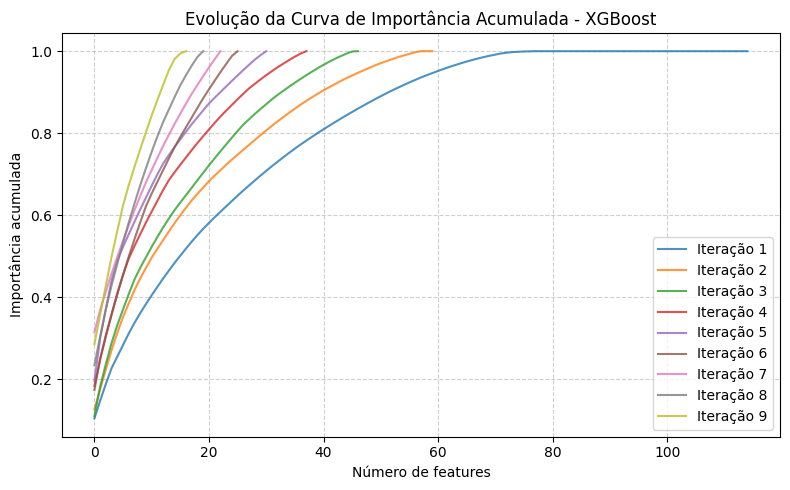

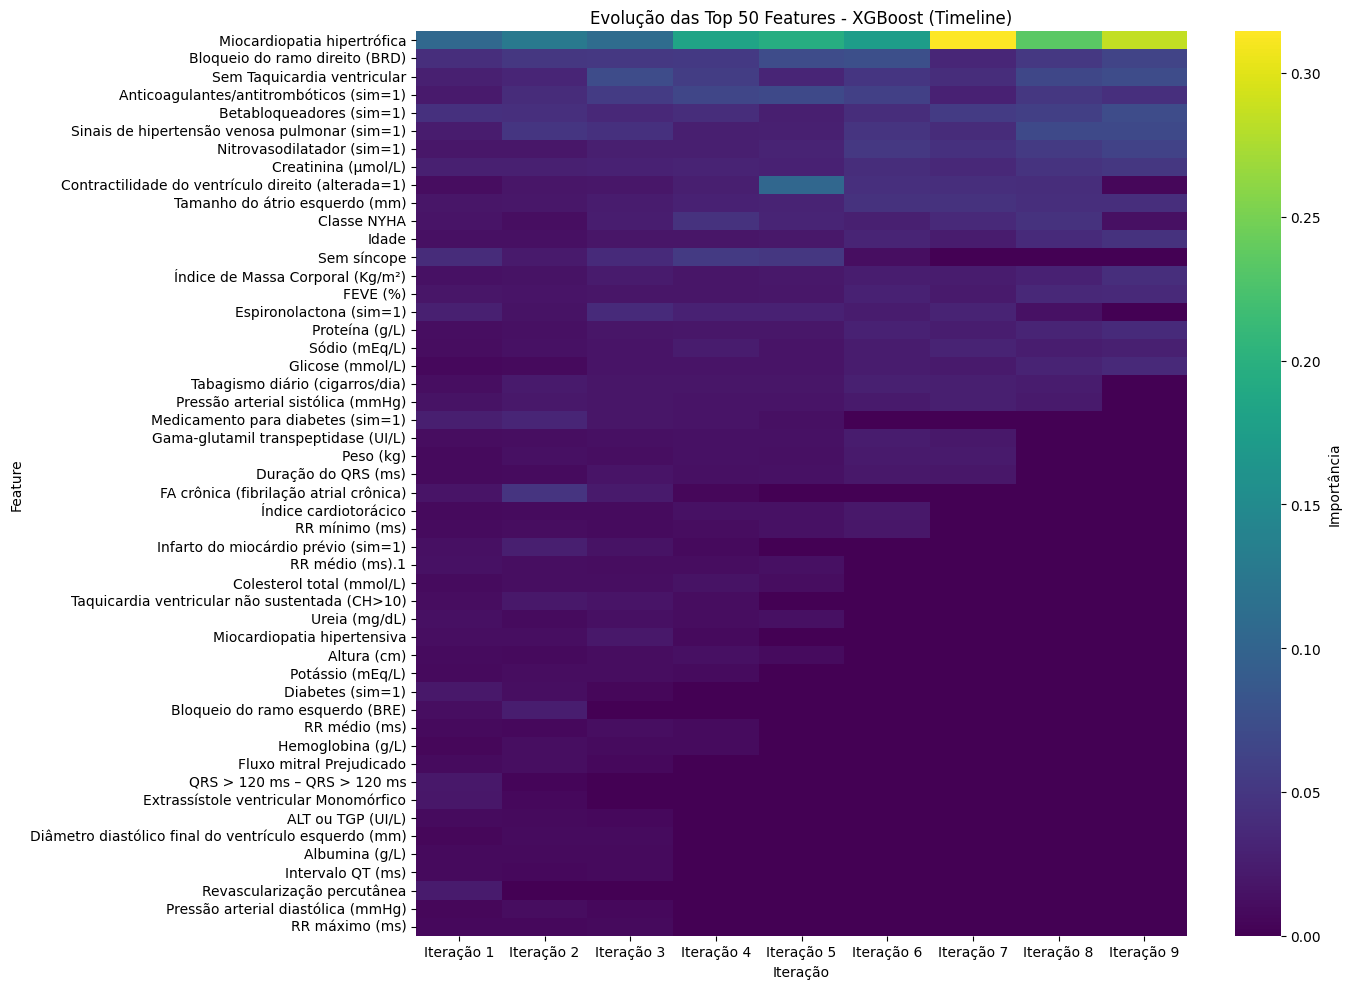

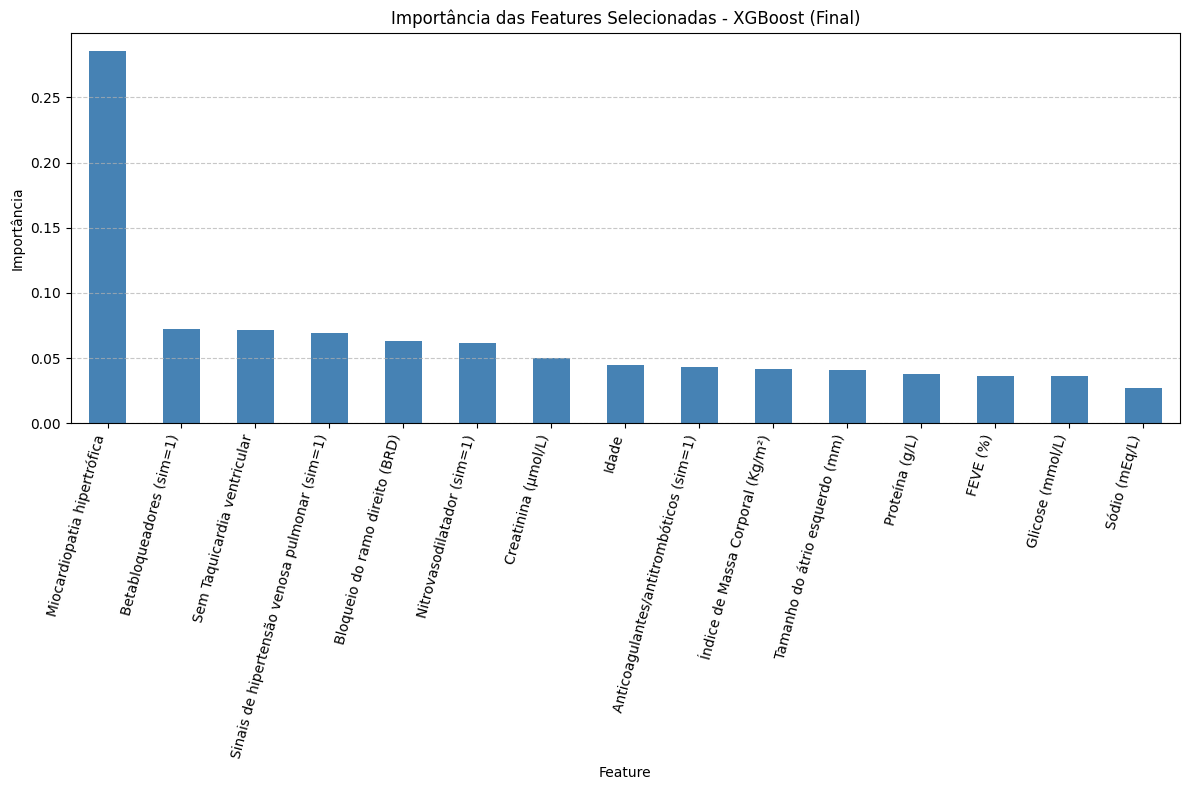


Resumo do processo:
 Iteração  Features iniciais  Features (95%)  Removidas
        1                115              60         55
        2                 60              47         13
        3                 47              38          9
        4                 38              31          7
        5                 31              26          5
        6                 26              23          3
        7                 23              20          3
        8                 20              17          3
        9                 17              13          4

Features selecionadas (15):
['Miocardiopatia hipertrófica', 'Betabloqueadores (sim=1)', 'Sem Taquicardia ventricular', 'Sinais de hipertensão venosa pulmonar (sim=1)', 'Bloqueio do ramo direito (BRD)', 'Nitrovasodilatador (sim=1)', 'Creatinina (µmol/L)', 'Idade', 'Anticoagulantes/antitrombóticos (sim=1)', 'Índice de Massa Corporal (Kg/m²)', 'Tamanho do átrio esquerdo (mm)', 'Proteína (g/L)', 'FEVE (%)', 'Glicose (m

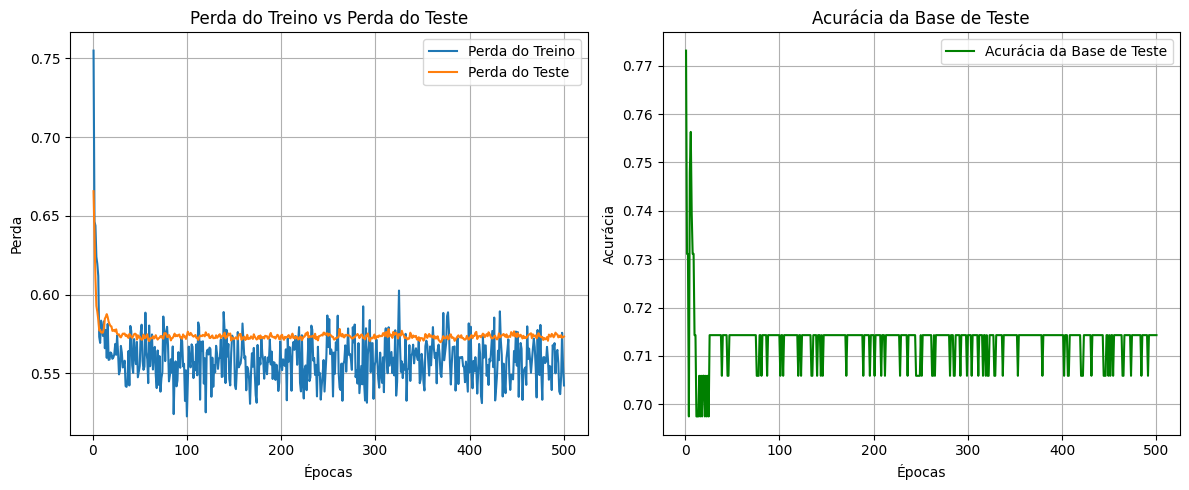


🔹 Resultados (Fold 1) - Classificador de Óbito:
              precision    recall  f1-score   support

   Não Óbito     0.8382    0.7125    0.7703        80
       Óbito     0.5490    0.7179    0.6222        39

    accuracy                         0.7143       119
   macro avg     0.6936    0.7152    0.6962       119
weighted avg     0.7435    0.7143    0.7218       119

Epoch 1/500 Train Loss: 0.7482 Val Loss: 0.6866 Val Acc: 0.5385
Epoch 26/500 Train Loss: 0.5604 Val Loss: 0.6912 Val Acc: 0.6410
Epoch 51/500 Train Loss: 0.5251 Val Loss: 0.7180 Val Acc: 0.5385
Epoch 76/500 Train Loss: 0.5077 Val Loss: 0.7571 Val Acc: 0.5641
Epoch 101/500 Train Loss: 0.4782 Val Loss: 0.7783 Val Acc: 0.6154
Epoch 126/500 Train Loss: 0.5287 Val Loss: 0.7824 Val Acc: 0.6154
Epoch 151/500 Train Loss: 0.5332 Val Loss: 0.7954 Val Acc: 0.5897
Epoch 176/500 Train Loss: 0.4626 Val Loss: 0.7973 Val Acc: 0.6154
Epoch 201/500 Train Loss: 0.4730 Val Loss: 0.7944 Val Acc: 0.6154
Epoch 226/500 Train Loss: 0.5113 Va

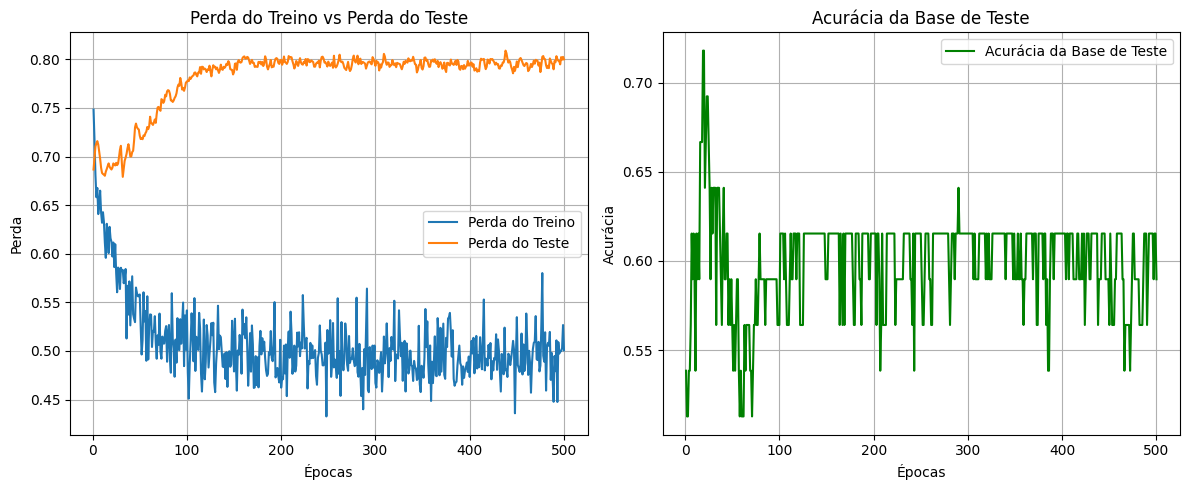


🔹 Resultados (Fold 1) - Classificador Tipo de Óbito:
                            precision    recall  f1-score   support

Falência da Bomba Cardíaca     0.6190    0.6190    0.6190        21
                       MSC     0.5556    0.5556    0.5556        18

                  accuracy                         0.5897        39
                 macro avg     0.5873    0.5873    0.5873        39
              weighted avg     0.5897    0.5897    0.5897        39



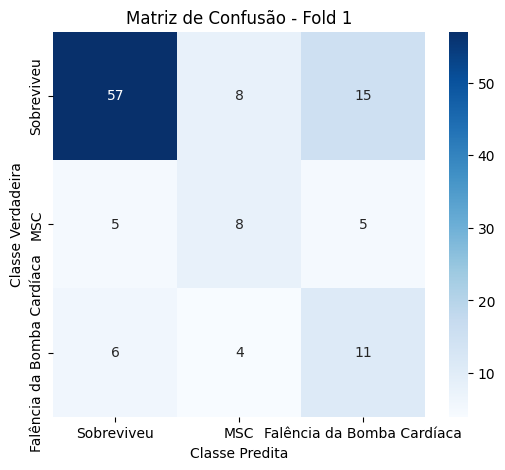


🔹 Resultados (Fold 1):
                            precision    recall  f1-score   support

                Sobreviveu     0.8382    0.7125    0.7703        80
                       MSC     0.4000    0.4444    0.4211        18
Falência da Bomba Cardíaca     0.3548    0.5238    0.4231        21

                  accuracy                         0.6387       119
                 macro avg     0.5310    0.5603    0.5381       119
              weighted avg     0.6866    0.6387    0.6562       119


====================== Fold 2/5 ======================


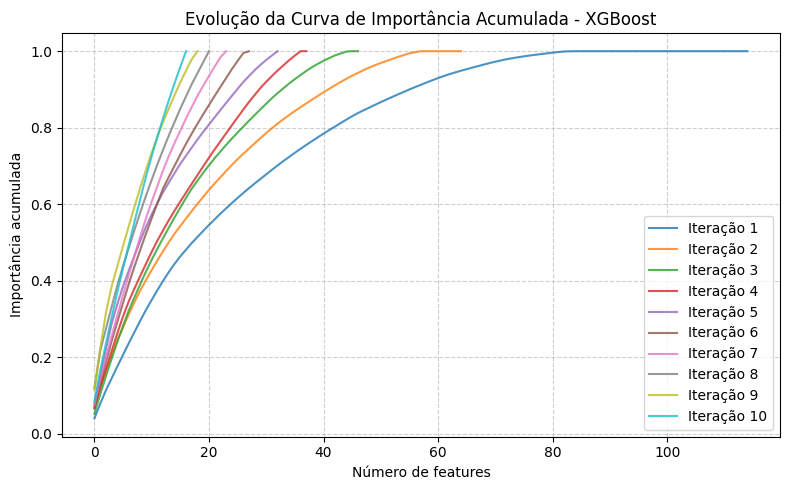

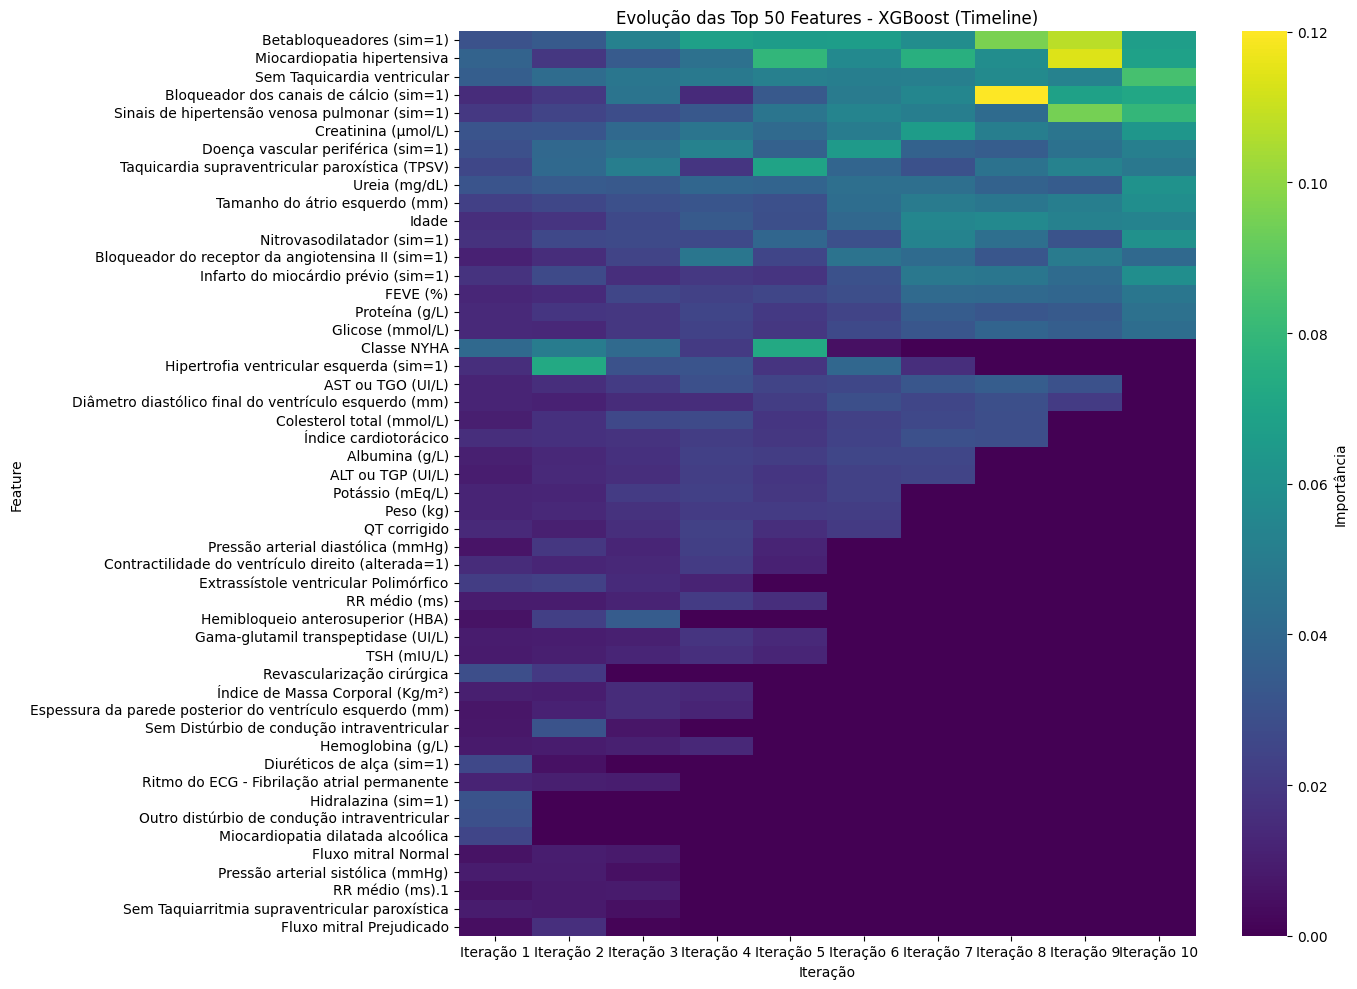

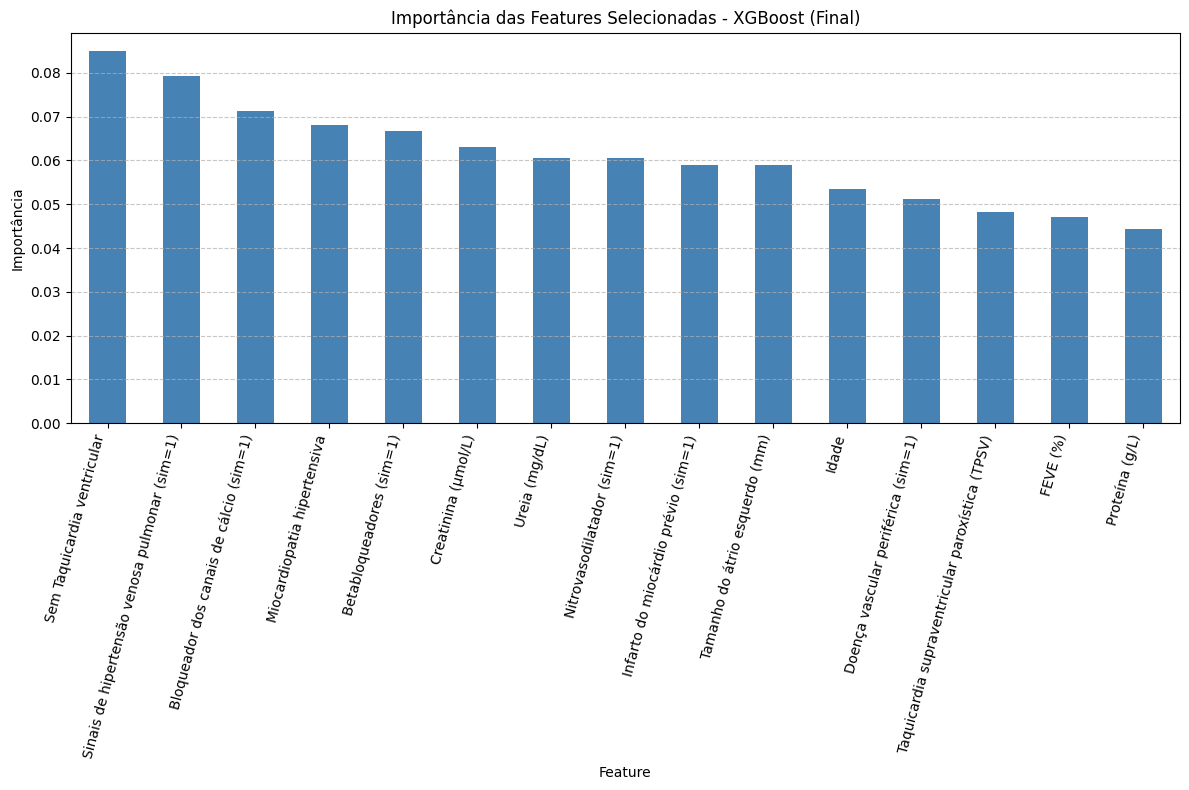


Resumo do processo:
 Iteração  Features iniciais  Features (95%)  Removidas
        1                115              65         50
        2                 65              47         18
        3                 47              38          9
        4                 38              33          5
        5                 33              28          5
        6                 28              24          4
        7                 24              21          3
        8                 21              19          2
        9                 19              17          2
       10                 17              15          2

Features selecionadas (15):
['Sem Taquicardia ventricular', 'Sinais de hipertensão venosa pulmonar (sim=1)', 'Bloqueador dos canais de cálcio (sim=1)', 'Miocardiopatia hipertensiva', 'Betabloqueadores (sim=1)', 'Creatinina (µmol/L)', 'Ureia (mg/dL)', 'Nitrovasodilatador (sim=1)', 'Infarto do miocárdio prévio (sim=1)', 'Tamanho do átrio esquerdo (mm)', 'Idade',

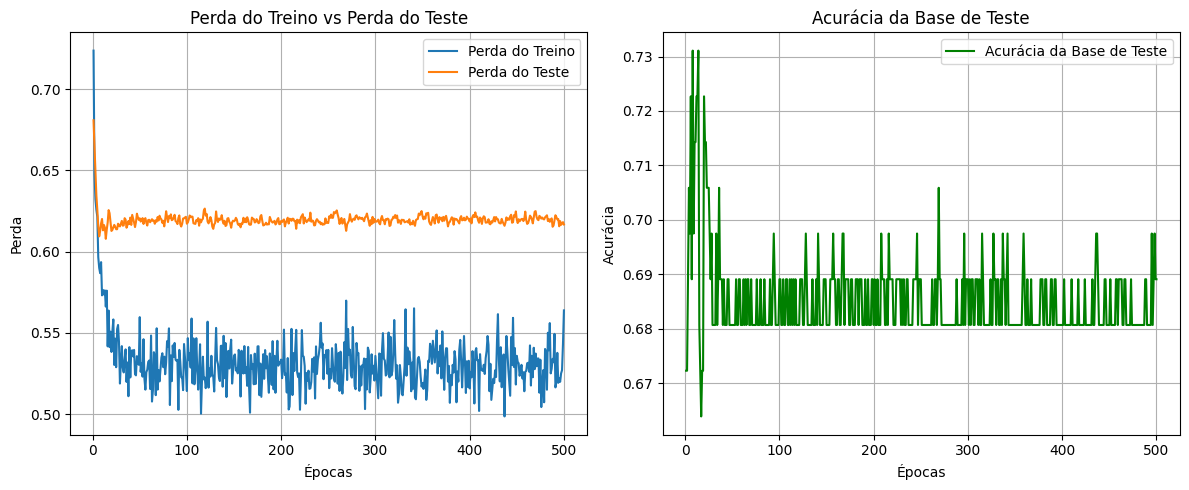


🔹 Resultados (Fold 2) - Classificador de Óbito:
              precision    recall  f1-score   support

   Não Óbito     0.7867    0.7375    0.7613        80
       Óbito     0.5227    0.5897    0.5542        39

    accuracy                         0.6891       119
   macro avg     0.6547    0.6636    0.6578       119
weighted avg     0.7002    0.6891    0.6934       119

Epoch 1/500 Train Loss: 0.6851 Val Loss: 0.6964 Val Acc: 0.5897
Epoch 26/500 Train Loss: 0.5582 Val Loss: 0.7589 Val Acc: 0.4872
Epoch 51/500 Train Loss: 0.5458 Val Loss: 0.7983 Val Acc: 0.5128
Epoch 76/500 Train Loss: 0.5095 Val Loss: 0.8141 Val Acc: 0.5128
Epoch 101/500 Train Loss: 0.4987 Val Loss: 0.8007 Val Acc: 0.4872
Epoch 126/500 Train Loss: 0.4337 Val Loss: 0.8103 Val Acc: 0.5385
Epoch 151/500 Train Loss: 0.4691 Val Loss: 0.8144 Val Acc: 0.5385
Epoch 176/500 Train Loss: 0.4506 Val Loss: 0.8191 Val Acc: 0.5385
Epoch 201/500 Train Loss: 0.4345 Val Loss: 0.8095 Val Acc: 0.4872
Epoch 226/500 Train Loss: 0.4956 Va

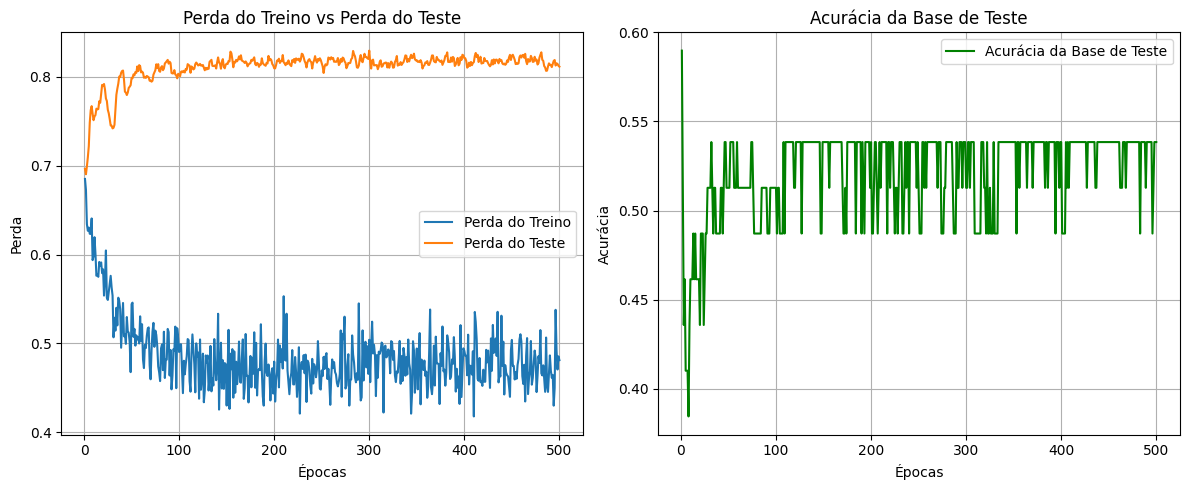


🔹 Resultados (Fold 2) - Classificador Tipo de Óbito:
                            precision    recall  f1-score   support

Falência da Bomba Cardíaca     0.6364    0.3333    0.4375        21
                       MSC     0.5000    0.7778    0.6087        18

                  accuracy                         0.5385        39
                 macro avg     0.5682    0.5556    0.5231        39
              weighted avg     0.5734    0.5385    0.5165        39



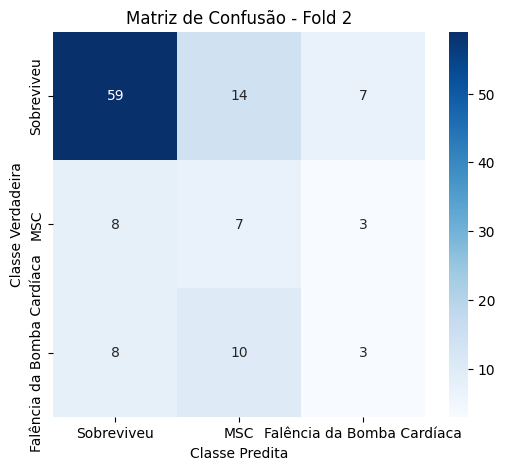


🔹 Resultados (Fold 2):
                            precision    recall  f1-score   support

                Sobreviveu     0.7867    0.7375    0.7613        80
                       MSC     0.2258    0.3889    0.2857        18
Falência da Bomba Cardíaca     0.2308    0.1429    0.1765        21

                  accuracy                         0.5798       119
                 macro avg     0.4144    0.4231    0.4078       119
              weighted avg     0.6037    0.5798    0.5862       119


====================== Fold 3/5 ======================


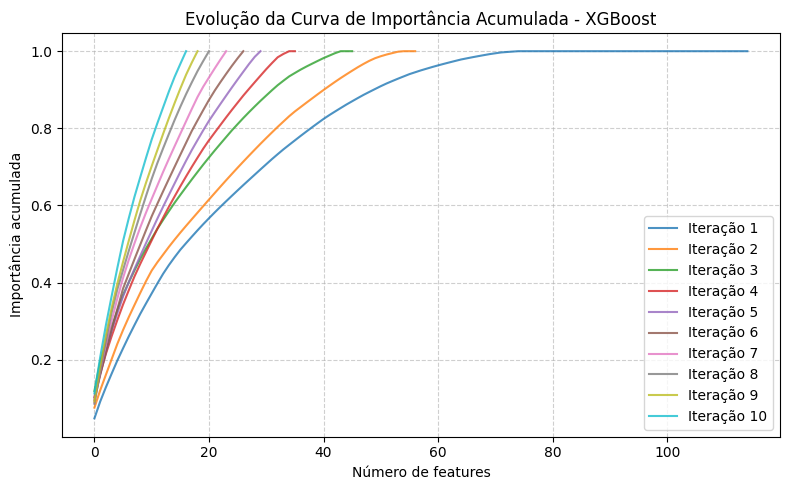

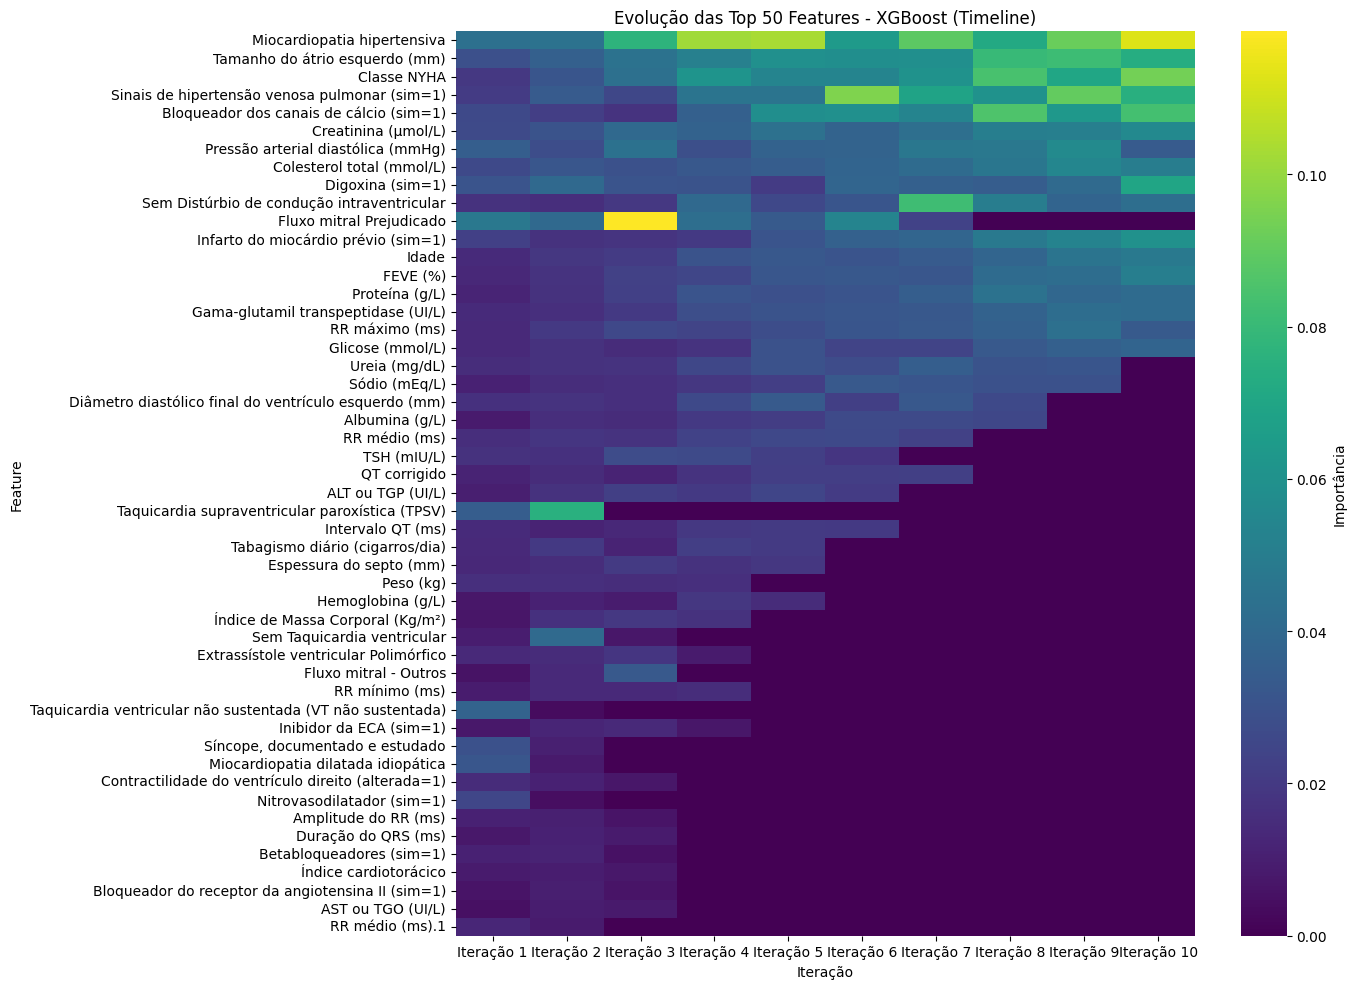

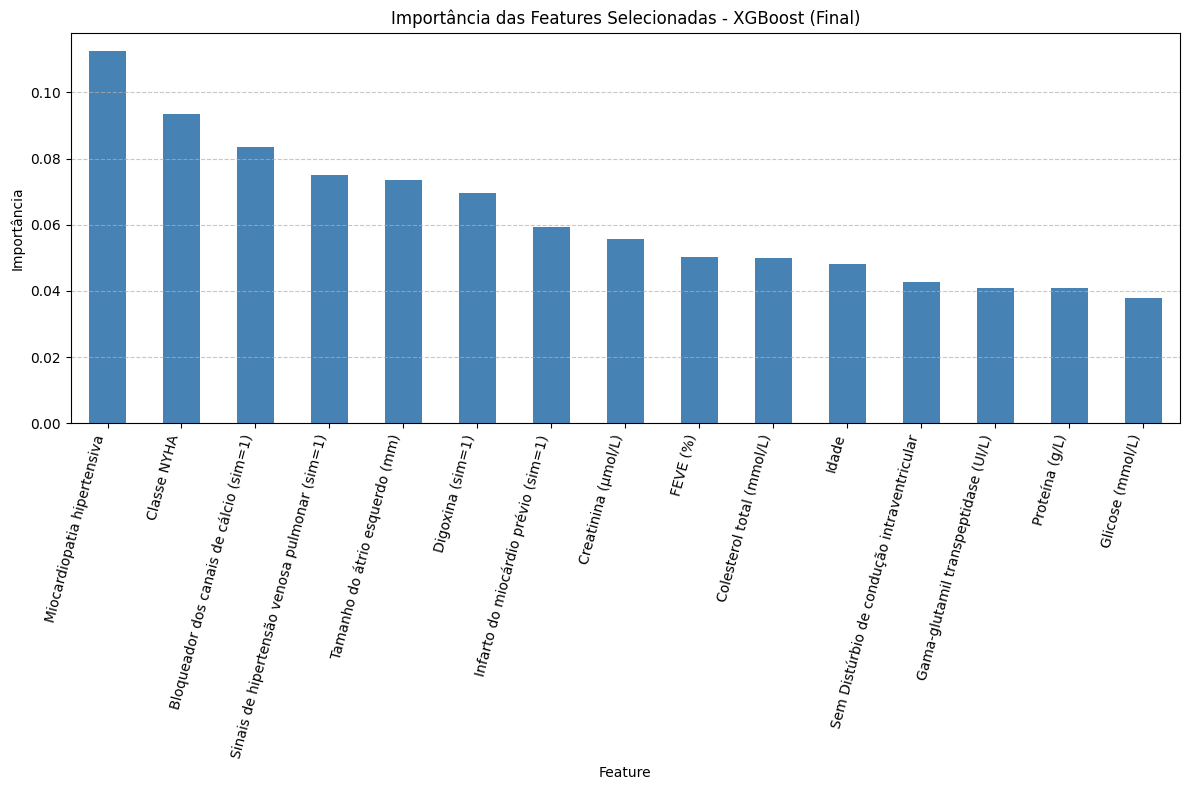


Resumo do processo:
 Iteração  Features iniciais  Features (95%)  Removidas
        1                115              57         58
        2                 57              46         11
        3                 46              36         10
        4                 36              30          6
        5                 30              27          3
        6                 27              24          3
        7                 24              21          3
        8                 21              19          2
        9                 19              17          2
       10                 17              15          2

Features selecionadas (15):
['Miocardiopatia hipertensiva', 'Classe NYHA', 'Bloqueador dos canais de cálcio (sim=1)', 'Sinais de hipertensão venosa pulmonar (sim=1)', 'Tamanho do átrio esquerdo (mm)', 'Digoxina (sim=1)', 'Infarto do miocárdio prévio (sim=1)', 'Creatinina (µmol/L)', 'FEVE (%)', 'Colesterol total (mmol/L)', 'Idade', 'Sem Distúrbio de condução in

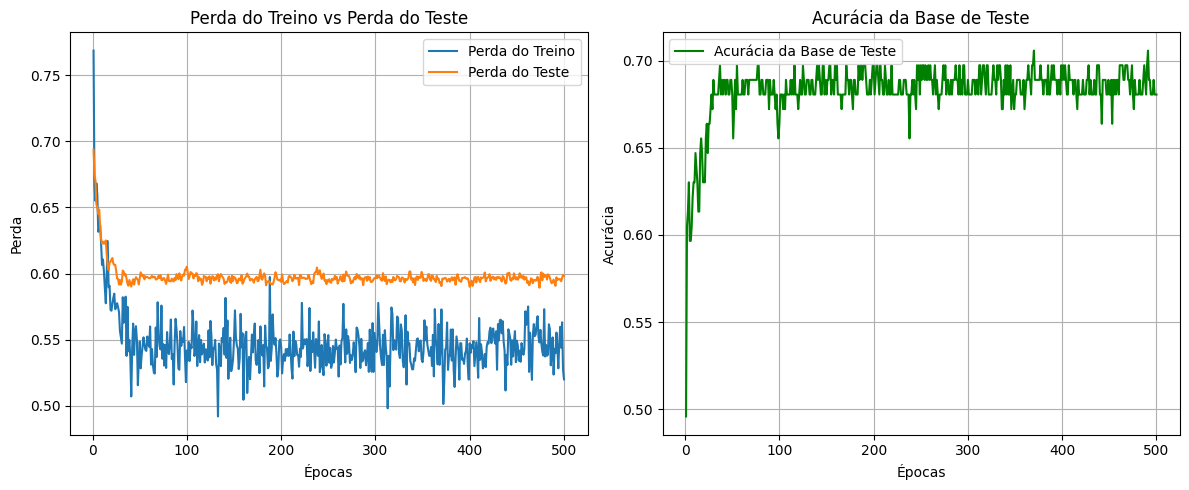


🔹 Resultados (Fold 3) - Classificador de Óbito:
              precision    recall  f1-score   support

   Não Óbito     0.8387    0.6500    0.7324        80
       Óbito     0.5088    0.7436    0.6042        39

    accuracy                         0.6807       119
   macro avg     0.6737    0.6968    0.6683       119
weighted avg     0.7306    0.6807    0.6904       119

Epoch 1/500 Train Loss: 0.7696 Val Loss: 0.7154 Val Acc: 0.4615
Epoch 26/500 Train Loss: 0.5124 Val Loss: 0.8302 Val Acc: 0.4359
Epoch 51/500 Train Loss: 0.4535 Val Loss: 0.9112 Val Acc: 0.4359
Epoch 76/500 Train Loss: 0.4035 Val Loss: 0.9536 Val Acc: 0.4615
Epoch 101/500 Train Loss: 0.4287 Val Loss: 0.9416 Val Acc: 0.4615
Epoch 126/500 Train Loss: 0.4419 Val Loss: 0.9318 Val Acc: 0.4615
Epoch 151/500 Train Loss: 0.4230 Val Loss: 0.9221 Val Acc: 0.4615
Epoch 176/500 Train Loss: 0.3955 Val Loss: 0.9273 Val Acc: 0.4615
Epoch 201/500 Train Loss: 0.4300 Val Loss: 0.9411 Val Acc: 0.4615
Epoch 226/500 Train Loss: 0.4220 Va

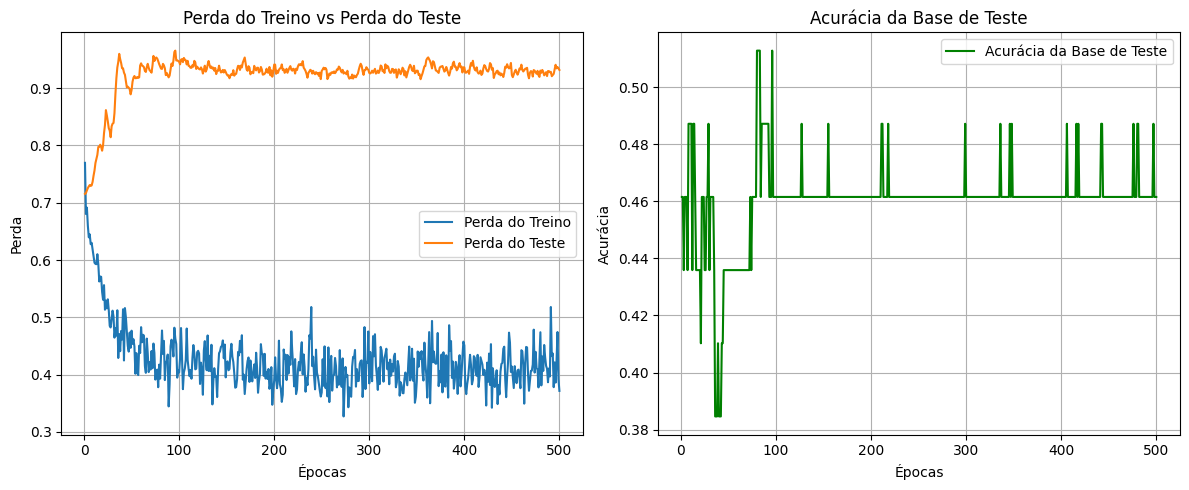


🔹 Resultados (Fold 3) - Classificador Tipo de Óbito:
                            precision    recall  f1-score   support

Falência da Bomba Cardíaca     0.5000    0.4762    0.4878        21
                       MSC     0.4211    0.4444    0.4324        18

                  accuracy                         0.4615        39
                 macro avg     0.4605    0.4603    0.4601        39
              weighted avg     0.4636    0.4615    0.4622        39



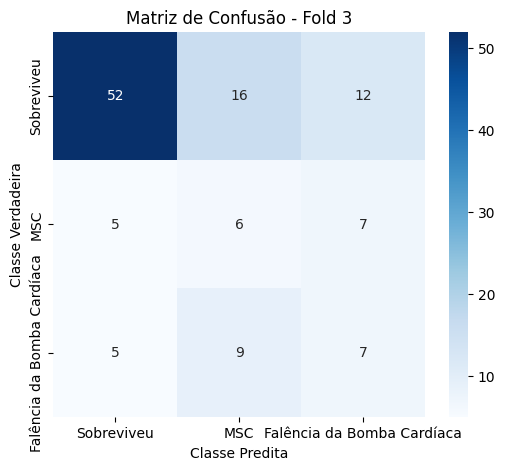


🔹 Resultados (Fold 3):
                            precision    recall  f1-score   support

                Sobreviveu     0.8387    0.6500    0.7324        80
                       MSC     0.1935    0.3333    0.2449        18
Falência da Bomba Cardíaca     0.2692    0.3333    0.2979        21

                  accuracy                         0.5462       119
                 macro avg     0.4338    0.4389    0.4251       119
              weighted avg     0.6406    0.5462    0.5820       119


====================== Fold 4/5 ======================


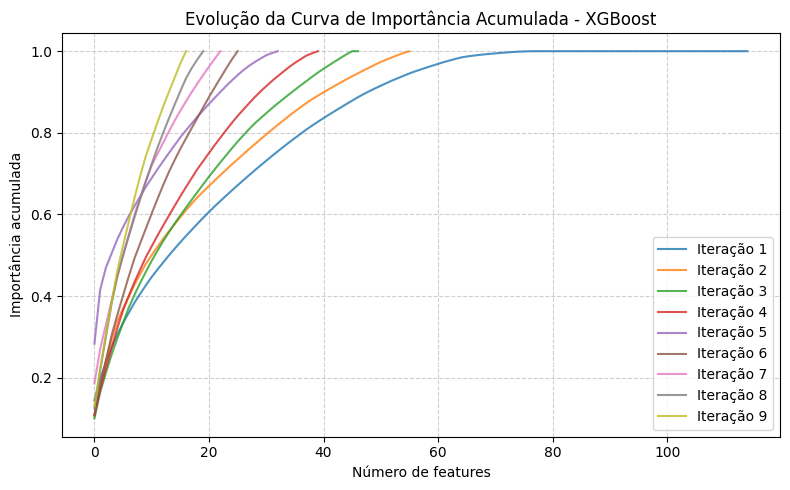

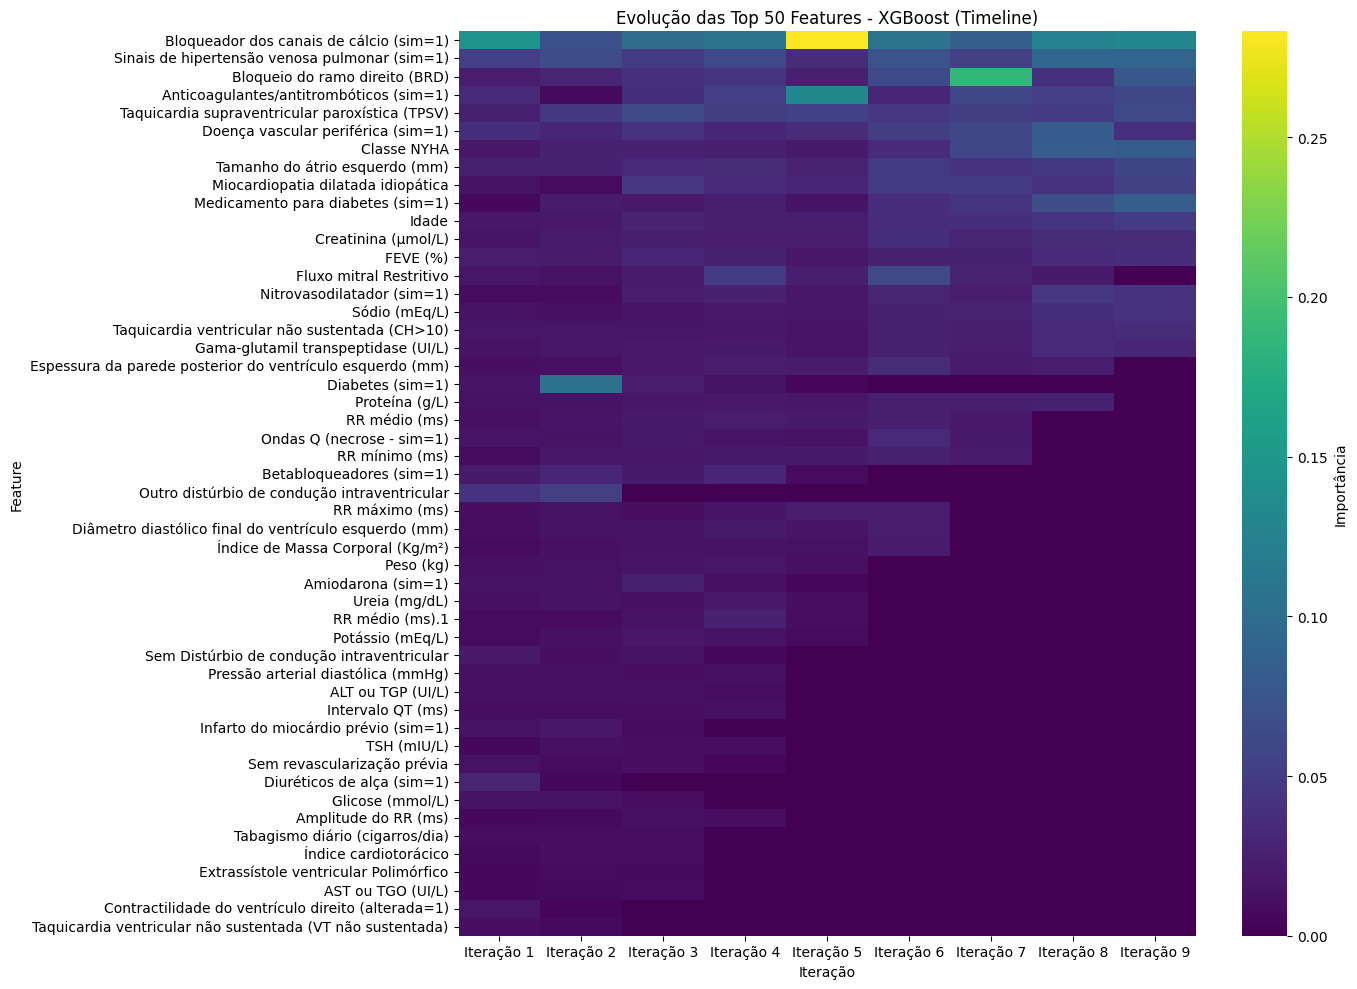

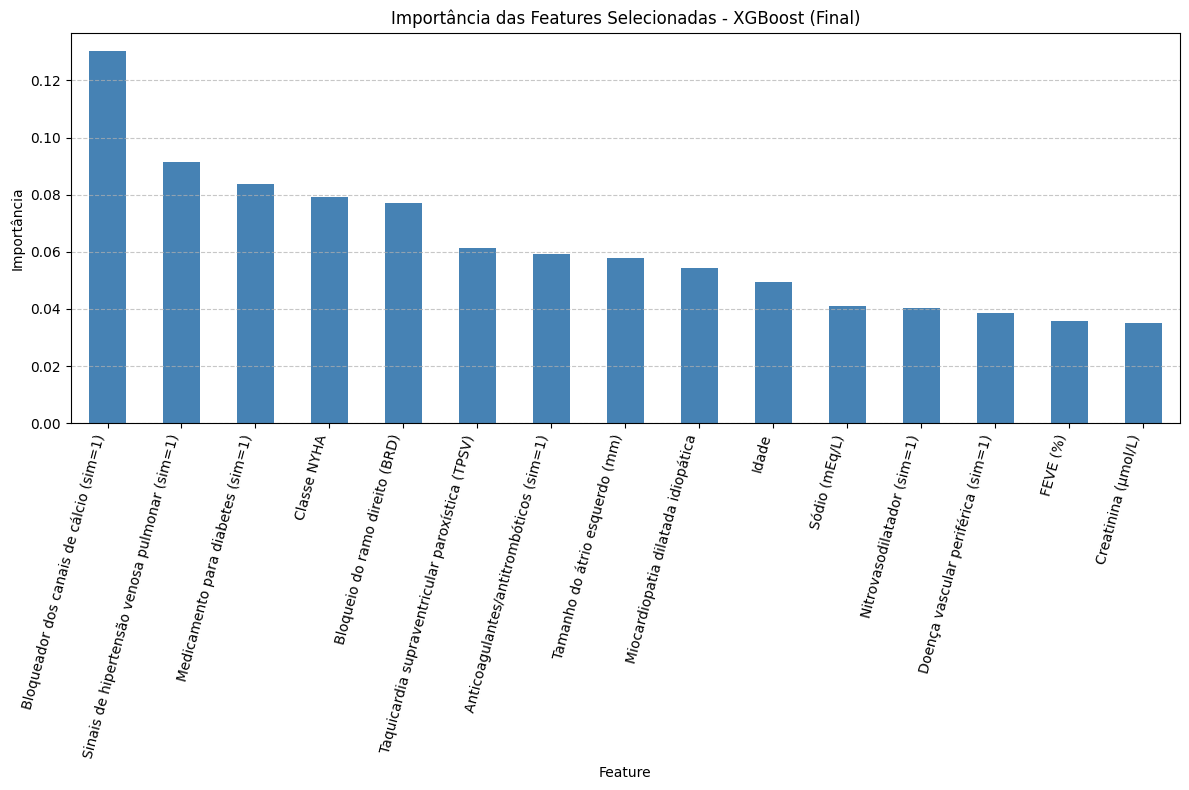


Resumo do processo:
 Iteração  Features iniciais  Features (95%)  Removidas
        1                115              56         59
        2                 56              47          9
        3                 47              40          7
        4                 40              33          7
        5                 33              26          7
        6                 26              23          3
        7                 23              20          3
        8                 20              17          3
        9                 17              15          2

Features selecionadas (15):
['Bloqueador dos canais de cálcio (sim=1)', 'Sinais de hipertensão venosa pulmonar (sim=1)', 'Medicamento para diabetes (sim=1)', 'Classe NYHA', 'Bloqueio do ramo direito (BRD)', 'Taquicardia supraventricular paroxística (TPSV)', 'Anticoagulantes/antitrombóticos (sim=1)', 'Tamanho do átrio esquerdo (mm)', 'Miocardiopatia dilatada idiopática', 'Idade', 'Sódio (mEq/L)', 'Nitrovasodilatador

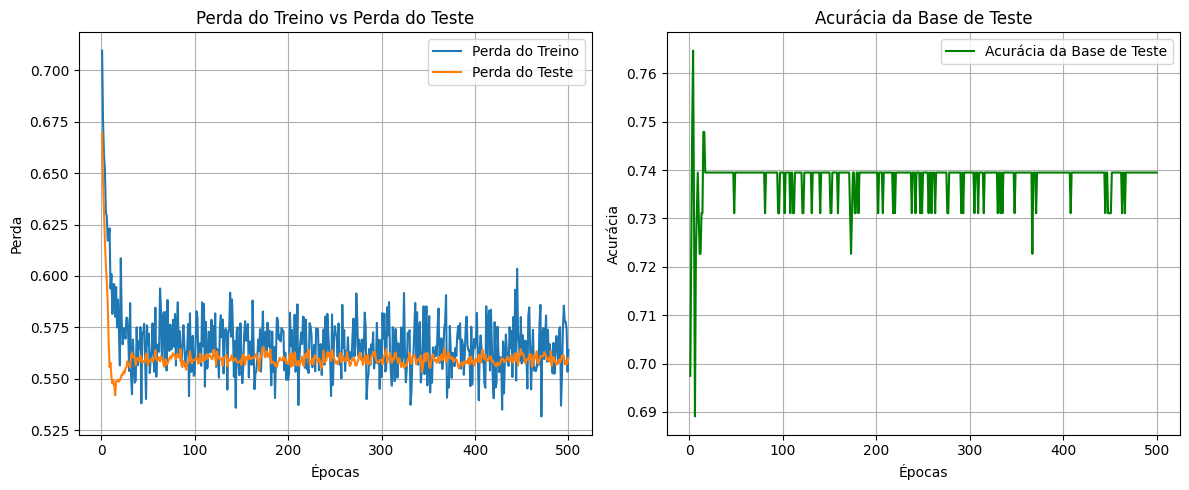


🔹 Resultados (Fold 4) - Classificador de Óbito:
              precision    recall  f1-score   support

   Não Óbito     0.8657    0.7250    0.7891        80
       Óbito     0.5769    0.7692    0.6593        39

    accuracy                         0.7395       119
   macro avg     0.7213    0.7471    0.7242       119
weighted avg     0.7710    0.7395    0.7466       119

Epoch 1/500 Train Loss: 0.7222 Val Loss: 0.7048 Val Acc: 0.5128
Epoch 26/500 Train Loss: 0.5547 Val Loss: 0.8507 Val Acc: 0.5128
Epoch 51/500 Train Loss: 0.4962 Val Loss: 0.8156 Val Acc: 0.5641
Epoch 76/500 Train Loss: 0.4787 Val Loss: 0.8334 Val Acc: 0.5385
Epoch 101/500 Train Loss: 0.4416 Val Loss: 0.8245 Val Acc: 0.5897
Epoch 126/500 Train Loss: 0.4383 Val Loss: 0.8476 Val Acc: 0.5385
Epoch 151/500 Train Loss: 0.4253 Val Loss: 0.8351 Val Acc: 0.5641
Epoch 176/500 Train Loss: 0.4588 Val Loss: 0.8378 Val Acc: 0.5641
Epoch 201/500 Train Loss: 0.4531 Val Loss: 0.8260 Val Acc: 0.5641
Epoch 226/500 Train Loss: 0.4345 Va

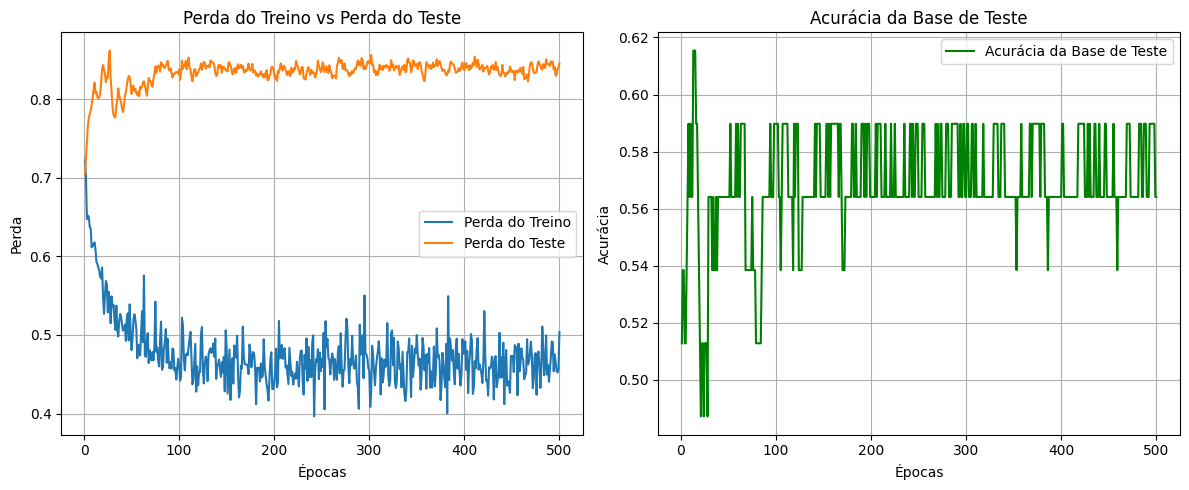


🔹 Resultados (Fold 4) - Classificador Tipo de Óbito:
                            precision    recall  f1-score   support

Falência da Bomba Cardíaca     0.6190    0.5909    0.6047        22
                       MSC     0.5000    0.5294    0.5143        17

                  accuracy                         0.5641        39
                 macro avg     0.5595    0.5602    0.5595        39
              weighted avg     0.5672    0.5641    0.5653        39



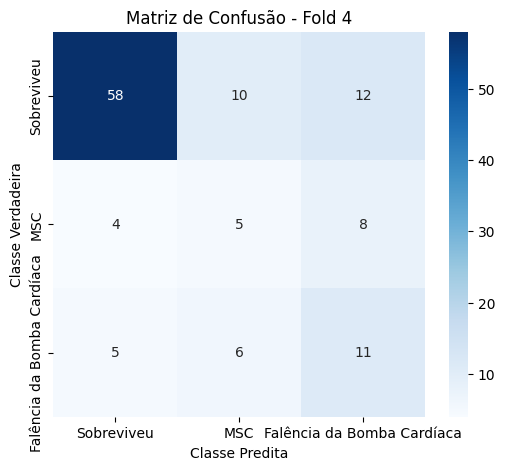


🔹 Resultados (Fold 4):
                            precision    recall  f1-score   support

                Sobreviveu     0.8657    0.7250    0.7891        80
                       MSC     0.2381    0.2941    0.2632        17
Falência da Bomba Cardíaca     0.3548    0.5000    0.4151        22

                  accuracy                         0.6218       119
                 macro avg     0.4862    0.5064    0.4891       119
              weighted avg     0.6816    0.6218    0.6448       119


====================== Fold 5/5 ======================


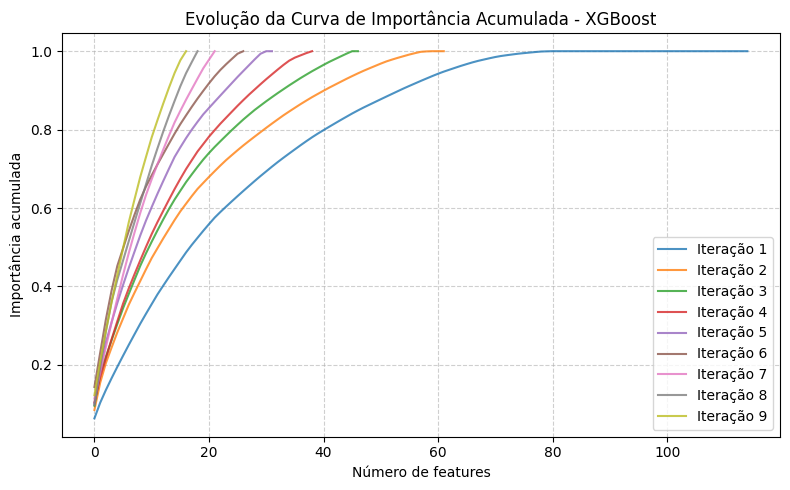

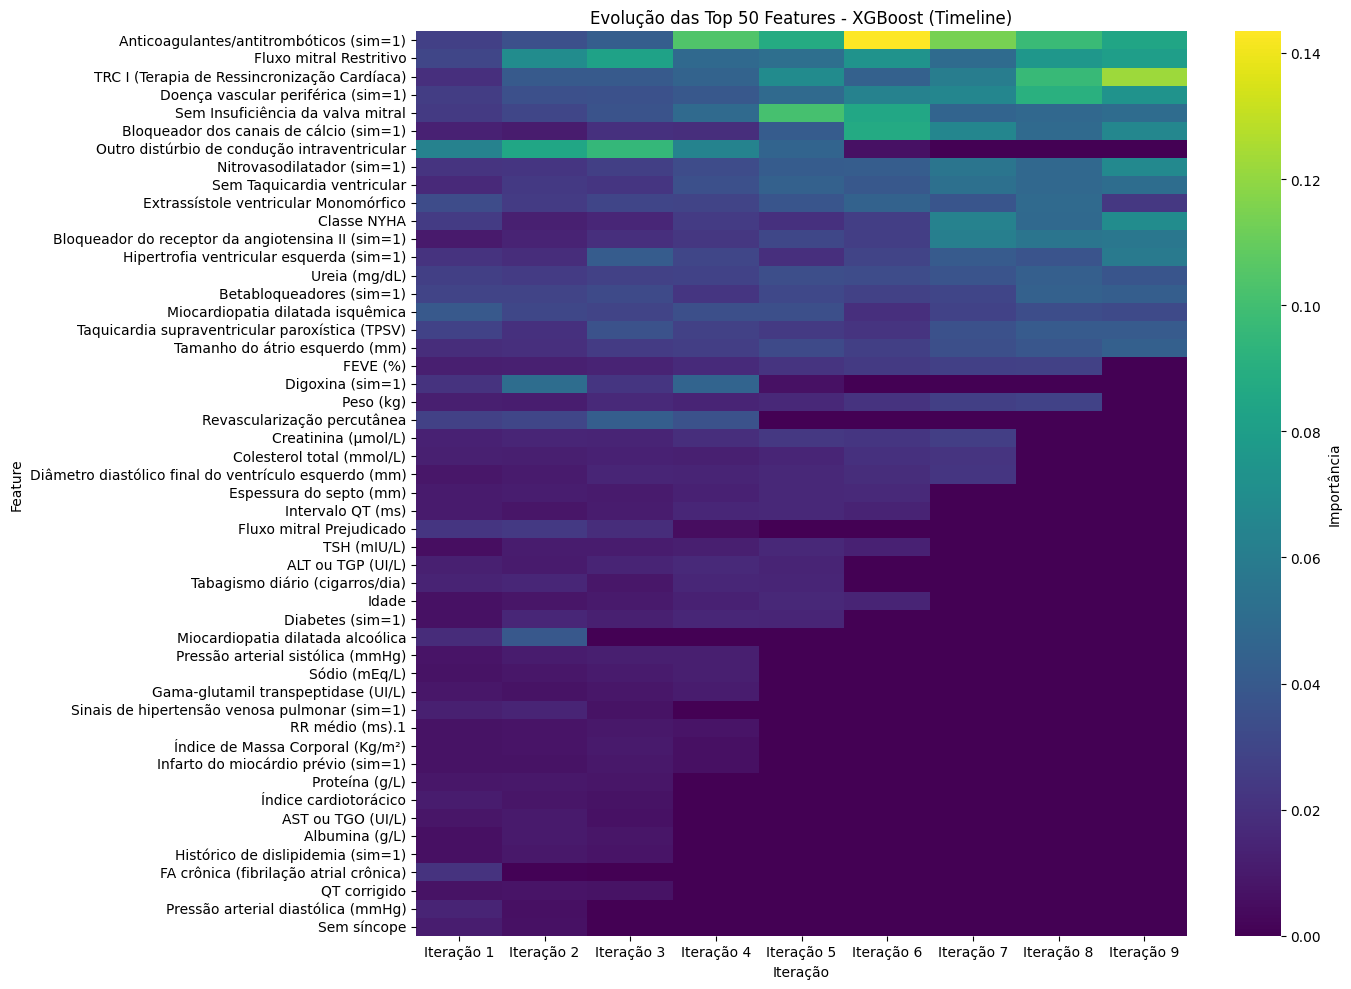

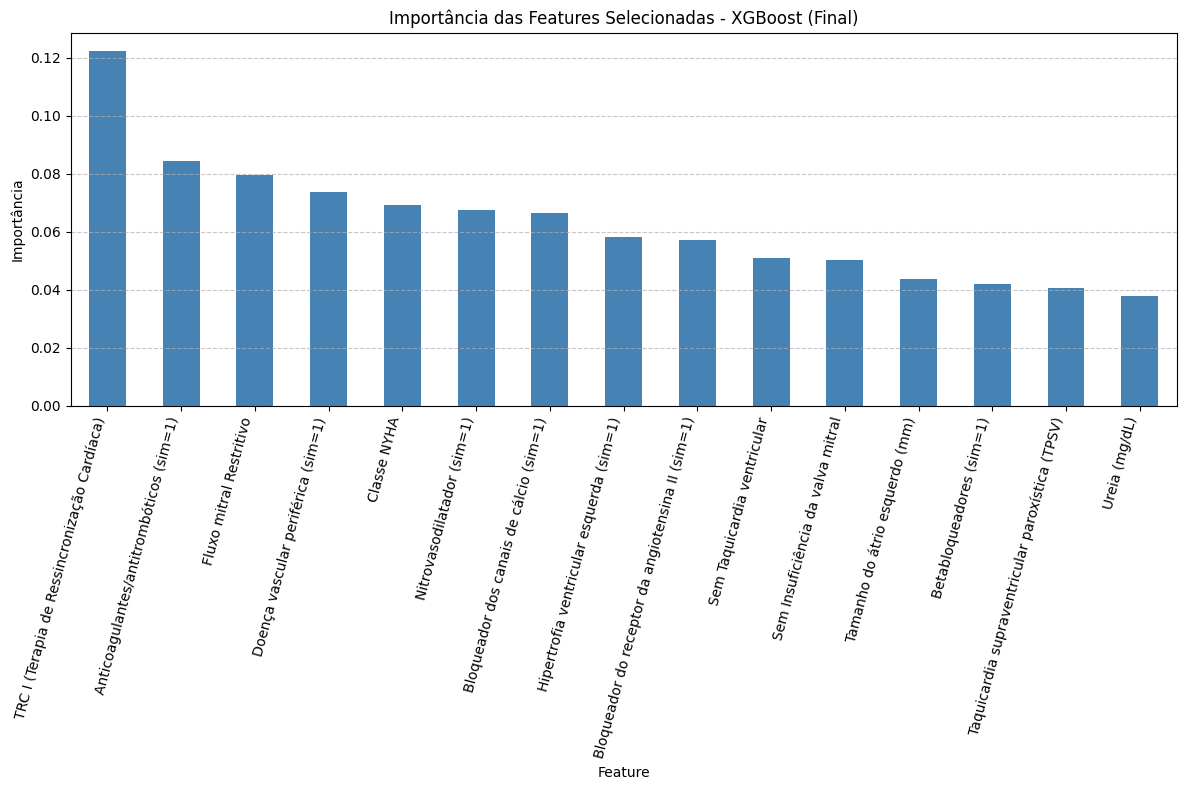


Resumo do processo:
 Iteração  Features iniciais  Features (95%)  Removidas
        1                115              62         53
        2                 62              47         15
        3                 47              39          8
        4                 39              32          7
        5                 32              27          5
        6                 27              22          5
        7                 22              19          3
        8                 19              17          2
        9                 17              15          2

Features selecionadas (15):
['TRC I (Terapia de Ressincronização Cardíaca)', 'Anticoagulantes/antitrombóticos (sim=1)', 'Fluxo mitral Restritivo', 'Doença vascular periférica (sim=1)', 'Classe NYHA', 'Nitrovasodilatador (sim=1)', 'Bloqueador dos canais de cálcio (sim=1)', 'Hipertrofia ventricular esquerda (sim=1)', 'Bloqueador do receptor da angiotensina II (sim=1)', 'Sem Taquicardia ventricular', 'Sem Insuficiênci

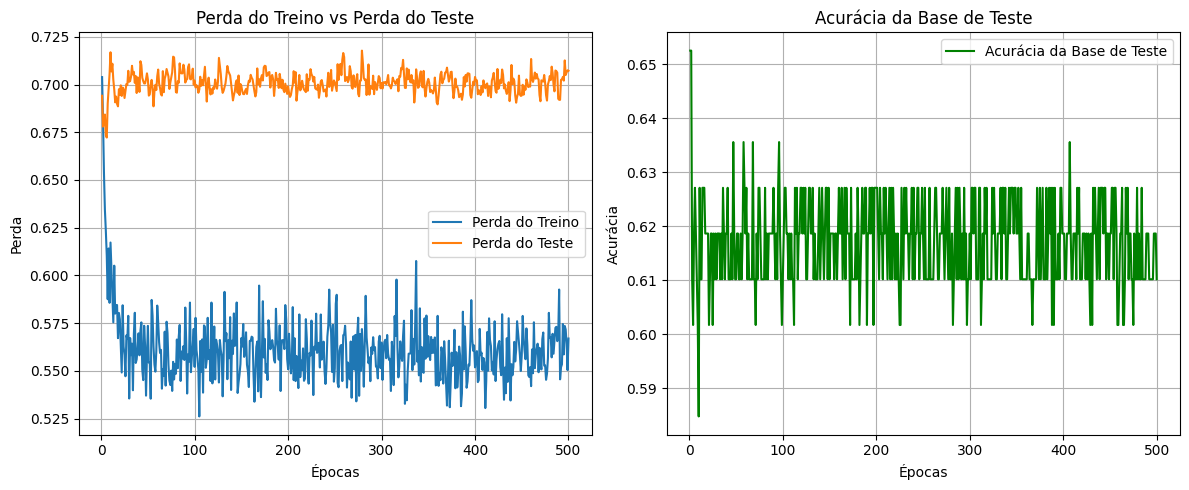


🔹 Resultados (Fold 5) - Classificador de Óbito:
              precision    recall  f1-score   support

   Não Óbito     0.7576    0.6250    0.6849        80
       Óbito     0.4231    0.5789    0.4889        38

    accuracy                         0.6102       118
   macro avg     0.5903    0.6020    0.5869       118
weighted avg     0.6499    0.6102    0.6218       118

Epoch 1/500 Train Loss: 0.7684 Val Loss: 0.6873 Val Acc: 0.5000
Epoch 26/500 Train Loss: 0.5782 Val Loss: 0.6991 Val Acc: 0.5526
Epoch 51/500 Train Loss: 0.5308 Val Loss: 0.7185 Val Acc: 0.5789
Epoch 76/500 Train Loss: 0.5433 Val Loss: 0.7528 Val Acc: 0.6053
Epoch 101/500 Train Loss: 0.5450 Val Loss: 0.7758 Val Acc: 0.6053
Epoch 126/500 Train Loss: 0.5022 Val Loss: 0.7790 Val Acc: 0.6053
Epoch 151/500 Train Loss: 0.4770 Val Loss: 0.7707 Val Acc: 0.6053
Epoch 176/500 Train Loss: 0.5156 Val Loss: 0.7735 Val Acc: 0.6053
Epoch 201/500 Train Loss: 0.4617 Val Loss: 0.7700 Val Acc: 0.6053
Epoch 226/500 Train Loss: 0.4833 Va

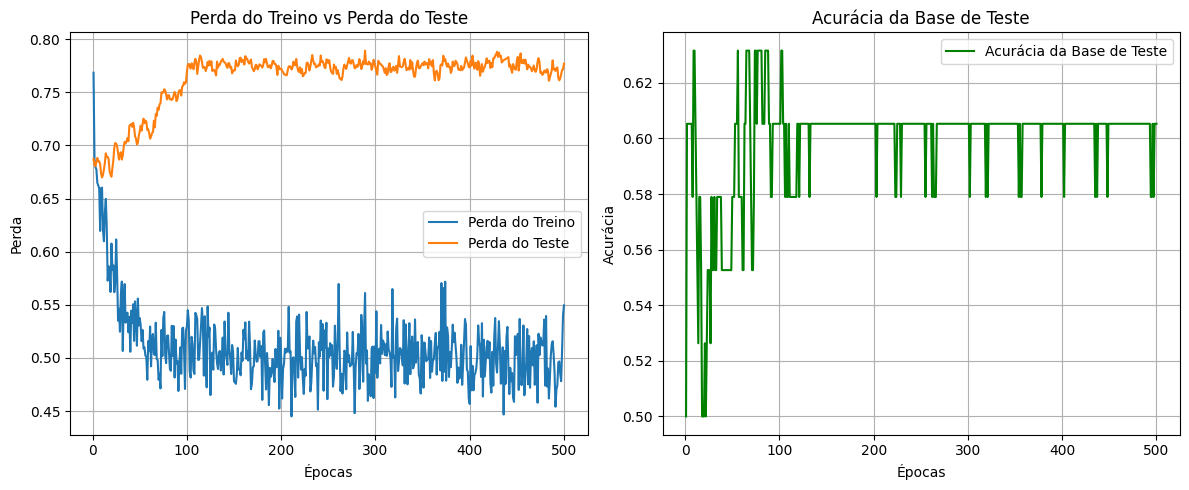


🔹 Resultados (Fold 5) - Classificador Tipo de Óbito:
                            precision    recall  f1-score   support

Falência da Bomba Cardíaca     0.6364    0.6667    0.6512        21
                       MSC     0.5625    0.5294    0.5455        17

                  accuracy                         0.6053        38
                 macro avg     0.5994    0.5980    0.5983        38
              weighted avg     0.6033    0.6053    0.6039        38



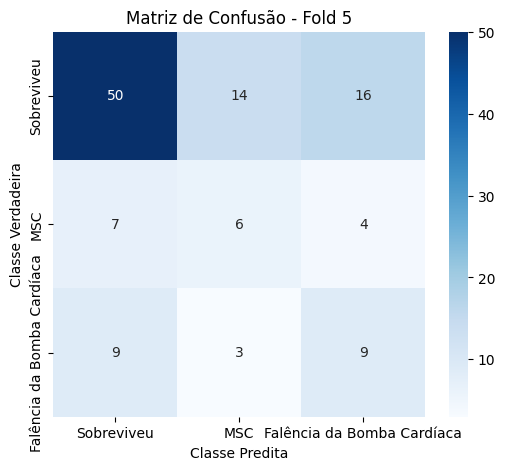


🔹 Resultados (Fold 5):
                            precision    recall  f1-score   support

                Sobreviveu     0.7576    0.6250    0.6849        80
                       MSC     0.2609    0.3529    0.3000        17
Falência da Bomba Cardíaca     0.3103    0.4286    0.3600        21

                  accuracy                         0.5508       118
                 macro avg     0.4429    0.4688    0.4483       118
              weighted avg     0.6064    0.5508    0.5716       118



In [ ]:
# Número de folds
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

# Nomes das classes
class_names_bin = ['Não Óbito', 'Óbito']
class_names_tipo = ['Falência da Bomba Cardíaca', 'MSC']
class_names_final = ['Sobreviveu', 'MSC', 'Falência da Bomba Cardíaca']


# Armazenar os relatórios (como dicionários) de cada classificador
all_reports_list_bin = []
all_reports_list_tipo = []
all_reports_list_final = []

for train_idx, val_idx in skf.split(X, Y):
    print(f"\n====================== Fold {fold}/{n_splits} ======================")

    # --- Separação dos dados ---
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = Y.iloc[train_idx], Y.iloc[val_idx]

    # Binário (óbito / não óbito)
    y_train_bin = y_train.replace(2, 1)
    y_val_bin = y_val.replace(2, 1)

    # --- Seleção de features (XGBoost) ---
    selected_features, n_features_95 = iterative_feature_selection_xgb(
        x_train, y_train_bin,
        cutoff=0.95,
        min_features=15,
        max_features=15,
        max_iter=20,
        top_n=50
    )

    x_train_sel = x_train[selected_features]
    x_val_sel = x_val[selected_features]

    # --- Classificador binário de óbito ---
    X_train_t = torch.tensor(x_train_sel.values, dtype=torch.float32)
    y_train_t = torch.tensor(y_train_bin.values, dtype=torch.long)
    X_val_t = torch.tensor(x_val_sel.values, dtype=torch.float32)
    y_val_t = torch.tensor(y_val_bin.values, dtype=torch.long)

    train_ds = TensorDataset(X_train_t, y_train_t)
    val_ds = TensorDataset(X_val_t, y_val_t)

    train_loader = DataLoader(train_ds, batch_size=48, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=48, shuffle=False)

    counts = np.bincount(y_val_bin)
    total = sum(counts)
    weights = [total / c for c in counts]
    weights = torch.tensor(weights, dtype=torch.float32)
    weights = weights / weights.sum() * len(weights)

    mortality_model = MortalityNeuralNetwork().to(device)
    criterion = nn.CrossEntropyLoss(weight=weights).to(device)
    optimizer = torch.optim.AdamW(mortality_model.parameters(), lr=0.012, weight_decay=1e-3)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)

    mortality_model, history, y_true_bin, y_pred_bin = train_model(
        mortality_model, train_loader, val_loader,
        criterion, optimizer, scheduler,
        num_epochs=500,
        device=device
    )

    print(f"\n🔹 Resultados (Fold {fold}) - Curvas:")
    plot_history(history)

    print(f"\n🔹 Resultados (Fold {fold}) - Classificador de Óbito:")
    print(classification_report(y_true_bin, y_pred_bin, target_names=class_names_bin, digits=4))

    report_bin_dict = classification_report(
        y_true_bin,
        y_pred_bin,
        target_names=class_names_bin,
        digits=4,
        output_dict=True
    )
    all_reports_list_bin.append(report_bin_dict)

    # --- Classificador de tipo de óbito ---
    # Filtra apenas amostras com óbito (classes 1 e 2)
    df_train_aux = pd.concat([x_train_sel, y_train], axis=1)
    df_train_aux = df_train_aux[df_train_aux["Causa da morte"] != 0].reset_index(drop=True)
    df_val_aux = pd.concat([x_val_sel, y_val], axis=1)
    df_val_aux = df_val_aux[df_val_aux["Causa da morte"] != 0].reset_index(drop=True)

    x_train_tipo = df_train_aux.drop(columns=['Causa da morte'])
    y_train_tipo = df_train_aux['Causa da morte'].replace(2, 0)
    x_val_tipo = df_val_aux.drop(columns=['Causa da morte'])
    y_val_tipo = df_val_aux['Causa da morte'].replace(2, 0)

    X_train_t = torch.tensor(x_train_tipo.values, dtype=torch.float32)
    y_train_t = torch.tensor(y_train_tipo.values, dtype=torch.long)
    X_val_t = torch.tensor(x_val_tipo.values, dtype=torch.float32)
    y_val_t = torch.tensor(y_val_tipo.values, dtype=torch.long)

    train_ds = TensorDataset(X_train_t, y_train_t)
    val_ds = TensorDataset(X_val_t, y_val_t)
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

    counts = np.bincount(y_val_tipo)
    total = sum(counts)
    weights = [total / c for c in counts]
    weights = torch.tensor(weights, dtype=torch.float32)
    weights = weights / weights.sum() * len(weights)

    mortality_type_model = MortalityTypeNeuralNetwork().to(device)
    criterion = nn.CrossEntropyLoss(weight=weights).to(device)
    optimizer = torch.optim.AdamW(mortality_type_model.parameters(), lr=0.012, weight_decay=1e-3)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.6, patience=14)

    mortality_type_model, history, y_true_tipo, y_pred_tipo = train_model(
        mortality_type_model, train_loader, val_loader,
        criterion, optimizer, scheduler,
        num_epochs=500,
        device=device
    )

    print(f"\n🔹 Resultados (Fold {fold}) - Curvas:")
    plot_history(history)

    print(f"\n🔹 Resultados (Fold {fold}) - Classificador Tipo de Óbito:")
    print(classification_report(y_true_tipo, y_pred_tipo, target_names=class_names_tipo, digits=4))

    report_tipo_dict = classification_report(
        y_true_tipo,
        y_pred_tipo,
        target_names=class_names_tipo,
        digits=4,
        output_dict=True
    )
    all_reports_list_tipo.append(report_tipo_dict)

    # --- Avaliação combinada ---
    mortality_model.eval()
    mortality_type_model.eval()
    X_val_tensor = torch.tensor(x_val_sel.values, dtype=torch.float32)

    with torch.no_grad():
        outputs_bin = mortality_model(X_val_tensor)
        y_pred_bin_final = torch.argmax(outputs_bin, dim=1).cpu().numpy()

    mask_obito = y_pred_bin_final == 1
    X_val_obitos_tensor = X_val_tensor[mask_obito]

    with torch.no_grad():
        outputs_tipo = mortality_type_model(X_val_obitos_tensor)
        y_pred_tipo_final = torch.argmax(outputs_tipo, dim=1).cpu().numpy()

    # Monta vetor final (3 classes)
    y_pred_final = np.zeros_like(y_pred_bin_final)
    y_pred_final[mask_obito] = np.where(y_pred_tipo_final == 1, 1, 2)

    cm = confusion_matrix(y_val, y_pred_final)
    class_names = ['Sobreviveu', 'MSC', 'Falência da Bomba Cardíaca']
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.ylabel("Classe Verdadeira")
    plt.xlabel("Classe Predita")
    plt.show()

    print(f"\n🔹 Resultados (Fold {fold}):")
    print(classification_report(y_val, y_pred_final, target_names=class_names_final, digits=4))

    report_dict_final = classification_report(
        y_val,
        y_pred_final,
        target_names=class_names_final,
        digits=4,
        output_dict=True
    )
    all_reports_list_final.append(report_dict_final)

    fold += 1


In [ ]:
def print_average_report(reports_list, class_names_report, title):
    print(f"\n{'-'*85}")
    print(f"--- {title} ---")
    print(f"{'-'*85}")

    # Nomes das métricas de resumo
    summary_metrics = ['macro avg', 'weighted avg']
    col_width = 18 # Largura da coluna

    # Cabeçalho
    print(f"{'':<30} {'precision':^{col_width}} {'recall':^{col_width}} {'f1-score':^{col_width}} {'support':^{col_width}}")
    print("-" * (30 + (col_width * 4) + 3))

    # --- Métricas por classe ---
    for class_name in class_names_report:
        # Precision
        prec_list = [r[class_name]['precision'] for r in reports_list]
        precision_mean = np.mean(prec_list)
        precision_std = np.std(prec_list)
        prec_str = f"{precision_mean:.4f} ± {precision_std:.4f}"

        # Recall
        rec_list = [r[class_name]['recall'] for r in reports_list]
        recall_mean = np.mean(rec_list)
        recall_std = np.std(rec_list)
        rec_str = f"{recall_mean:.4f} ± {recall_std:.4f}"

        # F1-Score
        f1_list = [r[class_name]['f1-score'] for r in reports_list]
        f1_mean = np.mean(f1_list)
        f1_std = np.std(f1_list)
        f1_str = f"{f1_mean:.4f} ± {f1_std:.4f}"

        # Support
        sup_list = [r[class_name]['support'] for r in reports_list]
        support_mean = np.mean(sup_list)
        support_std = np.std(sup_list)
        sup_str = f"{support_mean:.1f} ± {support_std:.1f}"

        print(f"{class_name:<30} {prec_str:>{col_width}} {rec_str:>{col_width}} {f1_str:>{col_width}} {sup_str:>{col_width}}")

    print("-" * (30 + (col_width * 4) + 3))

    # --- Acurácia ---
    acc_list = [r['accuracy'] for r in reports_list]
    accuracy_mean = np.mean(acc_list)
    accuracy_std = np.std(acc_list)
    acc_str = f"{accuracy_mean:.4f} ± {accuracy_std:.4f}"

    # O suporte total é a soma dos suportes de cada fold
    total_support = np.sum([r['macro avg']['support'] for r in reports_list])
    total_support_str = f"{total_support:.0f}"

    print(f"{'accuracy':<30} {'':>{col_width}} {'':>{col_width}} {acc_str:>{col_width}} {total_support_str:>{col_width}}")

    # --- Médias (macro e weighted) ---
    for metric in summary_metrics:
        prec_list = [r[metric]['precision'] for r in reports_list]
        precision_mean = np.mean(prec_list)
        precision_std = np.std(prec_list)
        prec_str = f"{precision_mean:.4f} ± {precision_std:.4f}"

        rec_list = [r[metric]['recall'] for r in reports_list]
        recall_mean = np.mean(rec_list)
        recall_std = np.std(rec_list)
        rec_str = f"{recall_mean:.4f} ± {recall_std:.4f}"

        f1_list = [r[metric]['f1-score'] for r in reports_list]
        f1_mean = np.mean(f1_list)
        f1_std = np.std(f1_list)
        f1_str = f"{f1_mean:.4f} ± {f1_std:.4f}"

        print(f"{metric:<30} {prec_str:>{col_width}} {rec_str:>{col_width}} {f1_str:>{col_width}} {total_support_str:>{col_width}}")
    print("\n")

In [ ]:
print("\n==================================================================================")
print("          RESULTADOS MÉDIOS TOTAIS (Média ± Desvio Padrão dos 5 Folds)")
print("==================================================================================")

# 1. Classificador Binário
print_average_report(
    reports_list = all_reports_list_bin,
    class_names_report = class_names_bin,
    title = "Classificador 1: Óbito Binário (Não Óbito vs. Óbito)"
)

# 2. Classificador Tipo de Óbito
print_average_report(
    reports_list = all_reports_list_tipo,
    class_names_report = class_names_tipo,
    title = "Classificador 2: Tipo de Óbito (Falência vs. MSC)"
)

# 3. Classificador Final Combinado
print_average_report(
    reports_list = all_reports_list_final,
    class_names_report = class_names_final,
    title = "Classificador Final: Combinado 3 Classes"
)


          RESULTADOS MÉDIOS TOTAIS (Média ± Desvio Padrão dos 5 Folds)

-------------------------------------------------------------------------------------
--- Classificador 1: Óbito Binário (Não Óbito vs. Óbito) ---
-------------------------------------------------------------------------------------
                                   precision            recall            f1-score           support      
---------------------------------------------------------------------------------------------------------
Não Óbito                         0.8174 ± 0.0393    0.6900 ± 0.0443    0.7476 ± 0.0363         80.0 ± 0.0
Óbito                             0.5161 ± 0.0520    0.6799 ± 0.0798    0.5858 ± 0.0591         38.8 ± 0.4
---------------------------------------------------------------------------------------------------------
accuracy                                                                0.6867 ± 0.0435                594
macro avg                         0.6667 ± 0.0441    0